In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import seaborn as sns 
import math as m

In [2]:
df = pd.read_csv('BankChurners.csv')

## Removing Columns Irrelevant to the Project

While examing the dataset in Kaggle and reviewing the documented information, it was decided that a few columns would be initially removed. Two columns were placed at the end of the dataset were recommended to be deleted by the creator. After trying to identify the columns, the conclusion was drawn that the columns were not worth keeping. Another column we dropped from the table was the client number. Because the column is a unique identifier to the customer and has no perceived statistical value based on our opinions, it was removed.

In [3]:
new_df = df.drop(['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],axis=1)

To get a broad perspective on the data, we decided to use the .info() method to provide us with the null count, and data type of each column.

In [4]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

The next step in interpreting our table was to look at the variable we were trying to predict. The attrition_flag columns identifies whether the customer is still with the company. Since this is a binary target, we interpreted the data as such: zero if the customer exists with the company, one otherwise.

In [5]:
new_df['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [6]:
new_df['binary_attrition'] = [0 if x == "Existing Customer" else 1 for x in new_df['Attrition_Flag']]
# ^^Using a list comprehension to assign a 1 or 0

In [7]:
print(f"""Comparing the value counts of the original attrition to the converted attrition:\n\n 
Original - {new_df['Attrition_Flag'].value_counts().values} \n\n New - {new_df['binary_attrition'].value_counts().values}""") 
#verifying the counts are the same

Comparing the value counts of the original attrition to the converted attrition:

 
Original - [8500 1627] 

 New - [8500 1627]


Now that we have the new version of our target column, we can drop the original.

In [8]:
bin_df = new_df.drop(['Attrition_Flag'], axis = 1)
bin_df.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,binary_attrition
0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0
1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0
2,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0
3,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0
4,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0


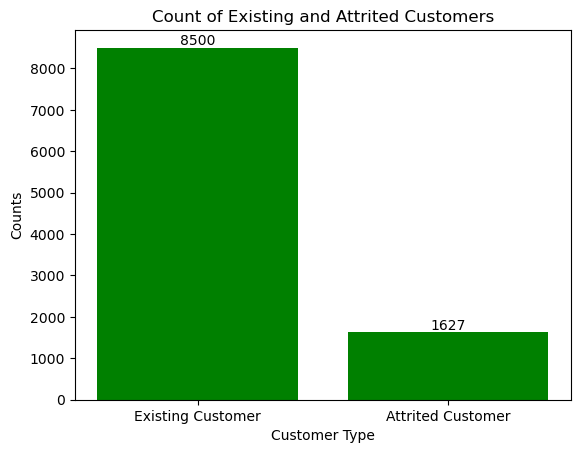

In [9]:
fig, ax = plt.subplots()
bars = ax.bar(new_df['Attrition_Flag'].value_counts().index,new_df['Attrition_Flag'].value_counts().values, color = 'green')
ax.bar_label(bars)
plt.xlabel('Customer Type')
plt.ylabel('Counts')
plt.title('Count of Existing and Attrited Customers')
plt.show()

From transforming the data, we noticed that the target variable is extremely off-balance. Because of this aspect the nature of how we analyze the result changes. We can either subset the data into approximately equal proportions, or we can use precision, recall, and the F1 score as metrics. The next portion of the pre-work takes a look at some of the predictors in the table.

## Credit Card Predictors and their Details

#### Customer Age

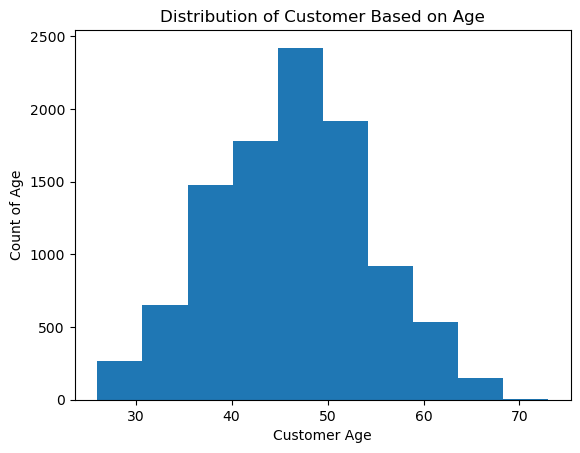

In [10]:
plt.hist(bin_df['Customer_Age'])
plt.xlabel('Customer Age')
plt.ylabel('Count of Age')
plt.title('Distribution of Customer Based on Age')
plt.show()

In [11]:
print(f"Breakdown of statistics for age: \n\n {bin_df['Customer_Age'].describe()}")

Breakdown of statistics for age: 

 count    10127.000000
mean        46.325960
std          8.016814
min         26.000000
25%         41.000000
50%         46.000000
75%         52.000000
max         73.000000
Name: Customer_Age, dtype: float64


<b> Interpretation: </b> Based on the histogram, it is reasonable to assume that the customer age is normally distributed

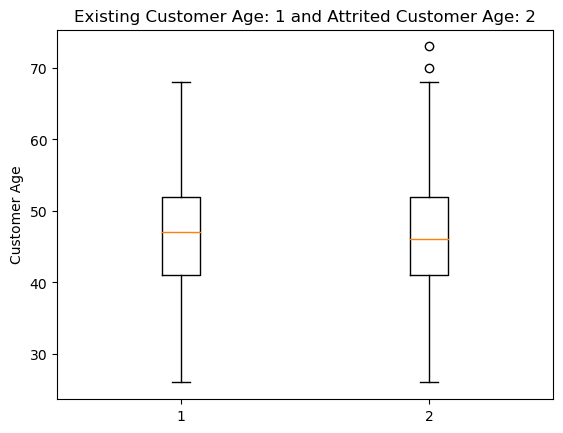

In [12]:
fig, ax = plt.subplots()
ax.boxplot([bin_df['Customer_Age'][bin_df['binary_attrition'] == 1],bin_df['Customer_Age'][bin_df['binary_attrition'] == 0]])
ax.set_title("Existing Customer Age: 1 and Attrited Customer Age: 2")
ax.set_ylabel("Customer Age")
plt.show()

#### Customer Gender

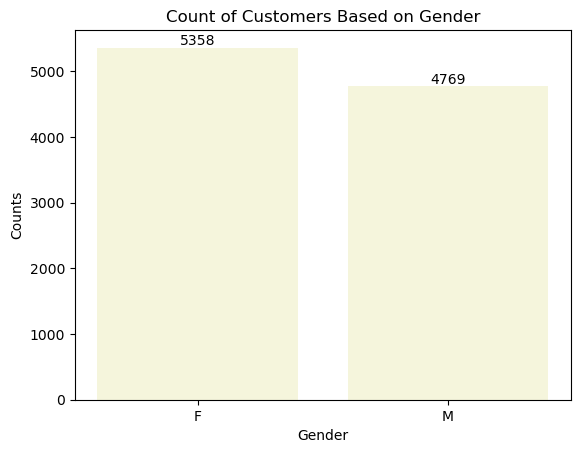

In [13]:
fig, ax = plt.subplots()
bars = ax.bar(bin_df['Gender'].value_counts().index,bin_df['Gender'].value_counts().values, color = 'beige')
ax.bar_label(bars)
plt.xlabel('Gender')
plt.ylabel('Counts')
plt.title('Count of Customers Based on Gender')
plt.show()

<b> Interpretation: </b> The counts between males and females appear balanced.

In order to use customer gender in our model, a few changes must be made. Firstly, the gender column must be split into an integer column using 1s and 0s. We split this columns into 1s and 0s knowing that neither being male or female is superior to the other. The new binary gender column is not ranked. We are reclasifying the column because the machine learning algorithms we are using cannot interpret string data.

In [14]:
bin_df['Gender_New'] = [0 if x == "M" else 1 for x in bin_df['Gender']]
new_bin_df = bin_df.drop(['Gender'], axis = 1)

In [15]:
new_bin_df.head()

,Customer_Age,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,binary_attrition,Gender_New
0,45,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0,0
1,49,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0,1
2,51,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0,0
3,40,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0,1
4,40,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0,0


We use the same attrition function to split the binary data into two columns dedicated to whether the customer is femals or male.

#### Customer Dependent Count

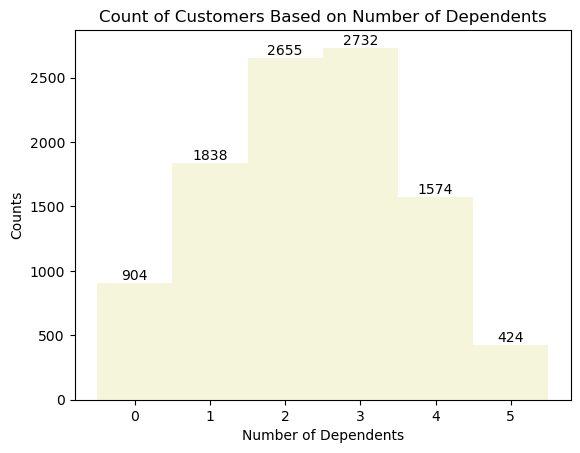

In [16]:
fig, ax = plt.subplots()
bars = ax.bar(new_bin_df['Dependent_count'].value_counts().index,new_bin_df['Dependent_count'].value_counts().values, color = 'beige', width=1.0)
ax.bar_label(bars)
plt.xlabel('Number of Dependents')
plt.ylabel('Counts')
plt.title('Count of Customers Based on Number of Dependents')
plt.show()

<b> Interpretation: </b> The number of dependents between 2-3 occur the most in the dataset.

#### Customer Education Level

While examing the predictor, a issue arose. This column contained an "Unknown" value. This is most likely a placeholder for customerd that did not have that particular information recorded.

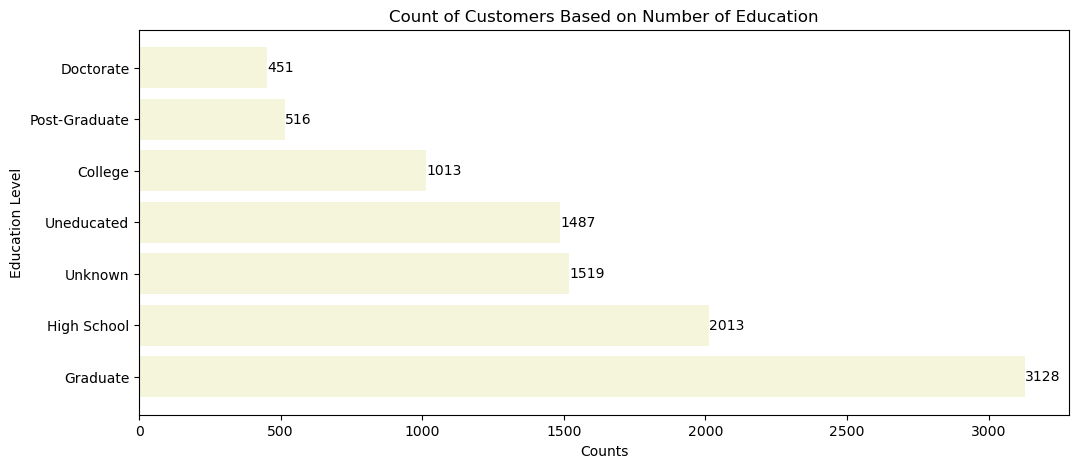

In [17]:
fig, ax = plt.subplots(figsize = (12,5))
bars = ax.barh(new_bin_df['Education_Level'].value_counts().index,new_bin_df['Education_Level'].value_counts().values, color = 'beige')
ax.bar_label(bars)
plt.xlabel('Counts')
plt.ylabel('Education Level')
plt.title('Count of Customers Based on Number of Education')
plt.show()

The unknown value makes up a significant portion of the data. If the observation was small enough, we could consider deleting all rows with that value. Instead we use the mode to impute the "Unknown" rows and replace it with the most common education level.

In [18]:
for index, i in new_bin_df['Education_Level'].items():
    if i == "Unknown":
        new_bin_df['Education_Level'][index] = "Graduate"
new_bin_df['Education_Level'].value_counts()

C:\Users\octav\AppData\Local\Temp\ipykernel_19616\575657811.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_bin_df['Education_Level'][index] = "Graduate"


Graduate         4647
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

Now that the unknowns observations have been delt with, the next step with the education column can be undertaken. Based on group consensus, the education column will be ranked. The data in the columnn is ordinal and should be appropriately tranformed.

In [19]:
education_rankings = {'College': 2, 'Doctorate': 5, 'Graduate': 3, 'High School': 1, 'Post-Graduate': 4, 'Uneducated': 0}
array = []
for ind, i in new_bin_df['Education_Level'].items():
    for index,val in education_rankings.items():
        if index == i:
            array.append(val)
new_bin_df['ranked_education'] = array

In [20]:
new_bin_df['ranked_education'].value_counts()

3    4647
1    2013
0    1487
2    1013
4     516
5     451
Name: ranked_education, dtype: int64

#### Customer Marital Status, Income Category, and Card Category

Marital status is divided into three categories: divorced, single and married. Income category is divided into five categories that end with customers making over 120K. Card category has four options: blue, silver, gold, and platinum. Married, less than 40k, and blue are all the top characteristics of the customers.

The same process that education went through will be replicated for these three columns. So, columns with an unknown value will be imputed with the most commomn value, and a new column will be created for rankings. Card category does not contain an unknown observation and does not have to be imputed.

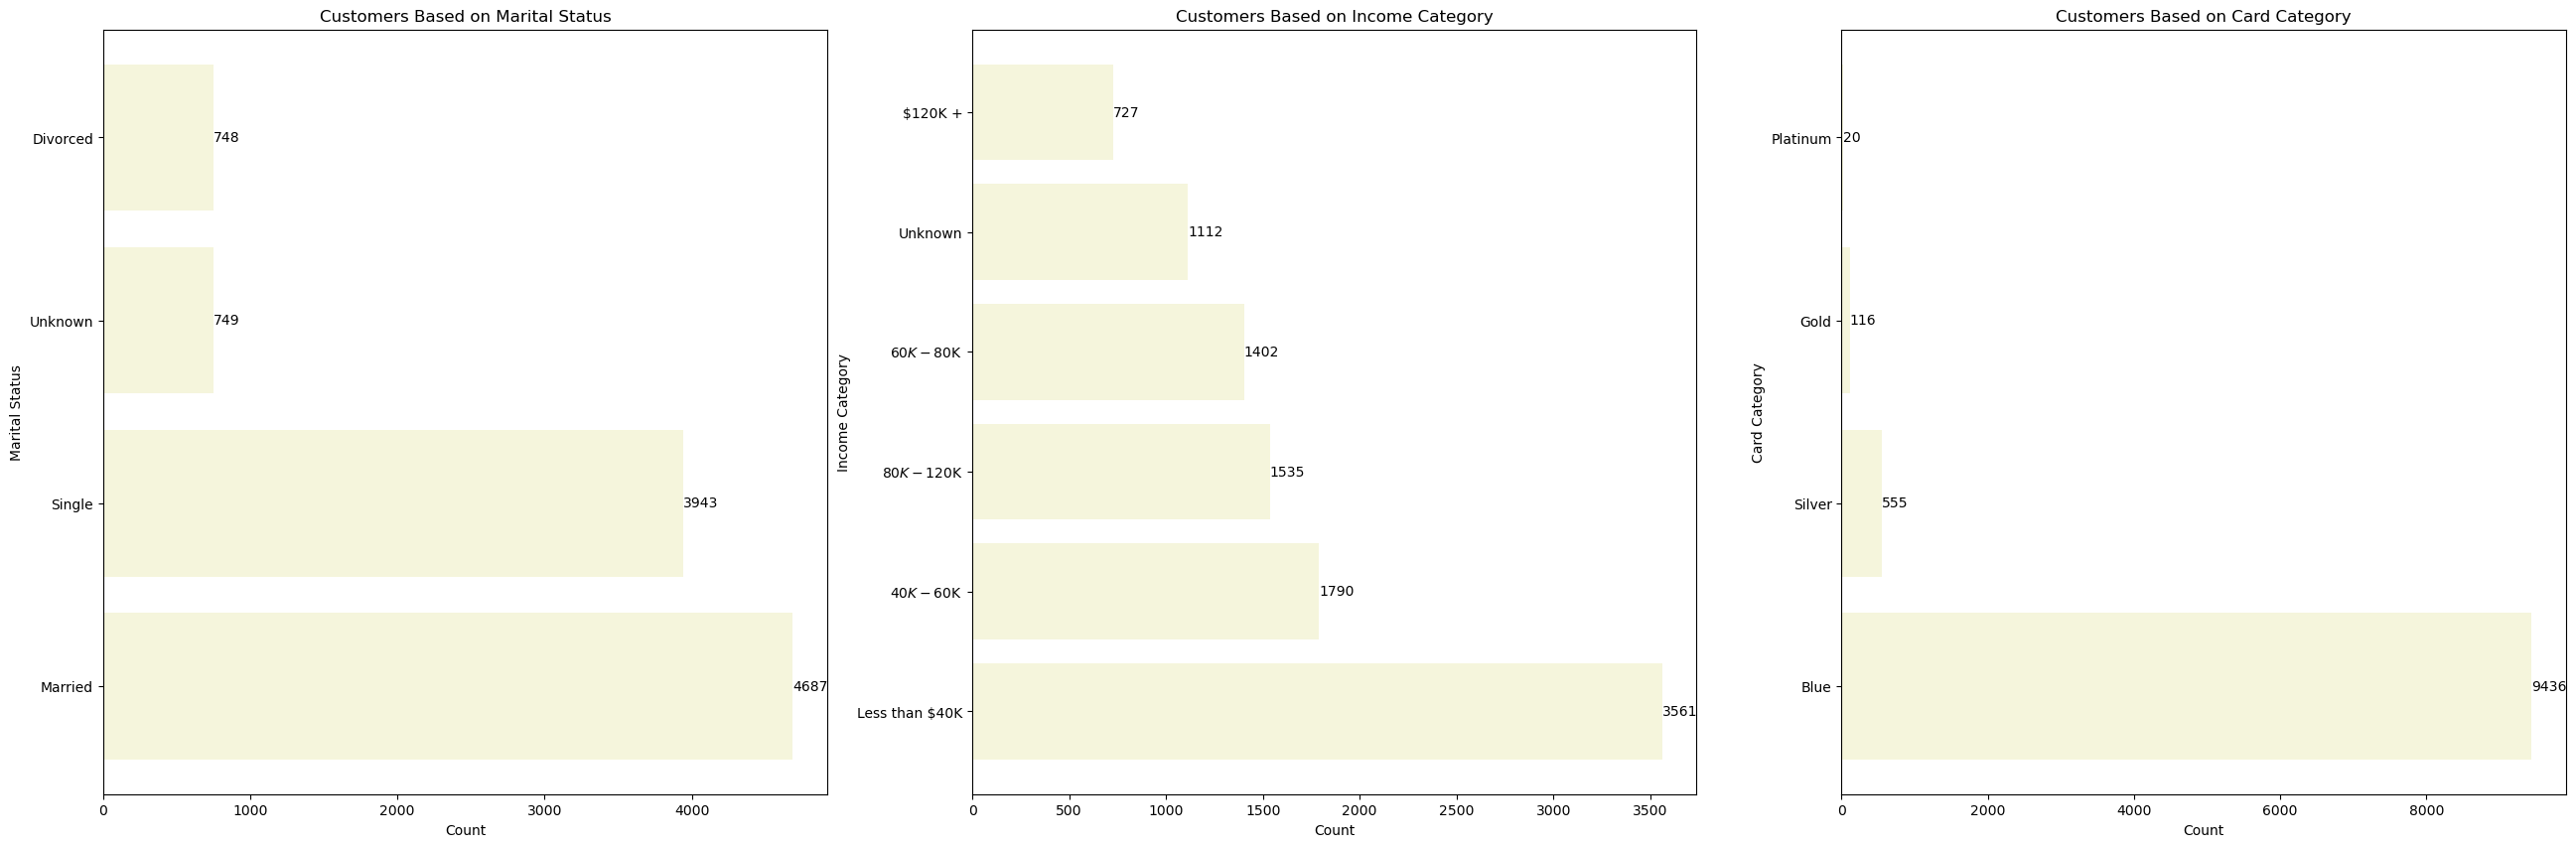

In [21]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize = (32,10))
bars = ax1.barh(new_bin_df['Marital_Status'].value_counts().index,new_bin_df['Marital_Status'].value_counts().values, color = 'beige')
ax1.bar_label(bars)
bars = ax2.barh(new_bin_df['Income_Category'].value_counts().index,new_bin_df['Income_Category'].value_counts().values, color = 'beige')
ax2.bar_label(bars)
bars = ax3.barh(new_bin_df['Card_Category'].value_counts().index,new_bin_df['Card_Category'].value_counts().values, color = 'beige')
ax3.bar_label(bars)
ax1.set_xlabel("Count")
ax2.set_xlabel("Count")
ax3.set_xlabel("Count")
ax1.set_ylabel("Marital Status")
ax2.set_ylabel("Income Category")
ax3.set_ylabel("Card Category")
ax1.set_title("Customers Based on Marital Status")
ax2.set_title("Customers Based on Income Category")
ax3.set_title("Customers Based on Card Category")
plt.show()

<b>Why we give marital status rank?</b>
<br> The ranking of marriage was based on an understanding that a person that has been married is more capable to handle responsibility. People who are divorced have had the experience of handling responsibility. Single customers are the lowest because they have yet to be married, which is viewed as a major commitment.</br>

In [22]:
for index, i in new_bin_df['Marital_Status'].items():
    if i == "Unknown":
        new_bin_df['Marital_Status'][index] = "Married"
for index, i in new_bin_df['Income_Category'].items():
    if i == "Unknown":
        new_bin_df['Income_Category'][index] = "Less than $40K"

C:\Users\octav\AppData\Local\Temp\ipykernel_19616\308420836.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_bin_df['Marital_Status'][index] = "Married"
C:\Users\octav\AppData\Local\Temp\ipykernel_19616\308420836.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_bin_df['Income_Category'][index] = "Less than $40K"


In [23]:
marital_rankings = {'Divorced': 1, 'Married': 2, 'Single': 0}
income_rankings = {'$120K +': 4, '$40K - $60K': 1, '$60K - $80K': 2, '$80K - $120K': 3, 'Less than $40K': 0}
card_rankings = {'Blue': 0, 'Gold': 2, 'Platinum': 3, 'Silver': 1}
array = []
#for ind, i in new_bin_df['Marital_Status'].items():
#    for index,val in marital_rankings.items():
#        if index == i:
#            array.append(val)
#new_bin_df['ranked_marital'] = array
array = []
for ind, i in new_bin_df['Income_Category'].items():
    for index,val in income_rankings.items():
        if index == i:
            array.append(val)
new_bin_df['ranked_income'] = array
array = []
for ind, i in new_bin_df['Card_Category'].items():
    for index,val in card_rankings.items():
        if index == i:
            array.append(val)
new_bin_df['ranked_card'] = array

new_bin_df = pd.get_dummies(data= new_bin_df, columns = ['Marital_Status'])


In [24]:
'''
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize = (32,10))
#bars = ax1.barh(new_bin_df['ranked_marital'].value_counts().index,new_bin_df['ranked_marital'].value_counts().values, color = 'beige')
#ax1.bar_label(bars)
bars = ax2.barh(new_bin_df['ranked_income'].value_counts().index,new_bin_df['ranked_income'].value_counts().values, color = 'beige')
ax2.bar_label(bars)
bars = ax3.barh(new_bin_df['ranked_card'].value_counts().index,new_bin_df['ranked_card'].value_counts().values, color = 'beige')
ax3.bar_label(bars)
ax1.set_xlabel("Count")
ax2.set_xlabel("Count")
ax3.set_xlabel("Count")
ax1.set_ylabel("Marital Status")
ax2.set_ylabel("Income Category")
ax3.set_ylabel("Card Category")
ax1.set_title("Customers Based on Marital Status")
ax2.set_title("Customers Based on Income Category")
ax3.set_title("Customers Based on Card Category")
plt.show()
'''

'\nfig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize = (32,10))\n#bars = ax1.barh(new_bin_df[\'ranked_marital\'].value_counts().index,new_bin_df[\'ranked_marital\'].value_counts().values, color = \'beige\')\n#ax1.bar_label(bars)\nbars = ax2.barh(new_bin_df[\'ranked_income\'].value_counts().index,new_bin_df[\'ranked_income\'].value_counts().values, color = \'beige\')\nax2.bar_label(bars)\nbars = ax3.barh(new_bin_df[\'ranked_card\'].value_counts().index,new_bin_df[\'ranked_card\'].value_counts().values, color = \'beige\')\nax3.bar_label(bars)\nax1.set_xlabel("Count")\nax2.set_xlabel("Count")\nax3.set_xlabel("Count")\nax1.set_ylabel("Marital Status")\nax2.set_ylabel("Income Category")\nax3.set_ylabel("Card Category")\nax1.set_title("Customers Based on Marital Status")\nax2.set_title("Customers Based on Income Category")\nax3.set_title("Customers Based on Card Category")\nplt.show()\n'

#### Customer Subscription Time with Bank in Months

This column represents the period of time the customer has spent with the bank.

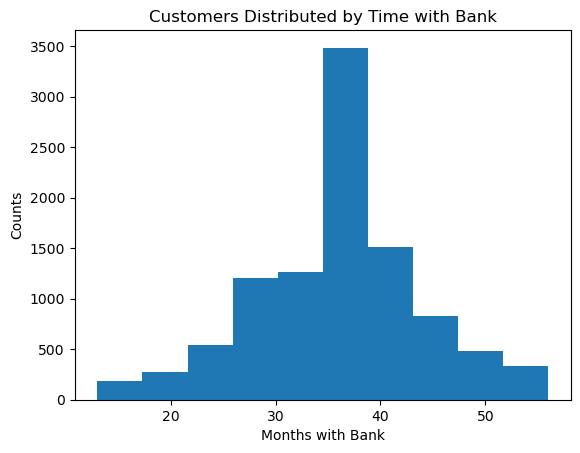

In [25]:
plt.hist(new_bin_df['Months_on_book'])
plt.xlabel("Months with Bank")
plt.ylabel("Counts")
plt.title("Customers Distributed by Time with Bank")
plt.show()

In [26]:
print(f"Breakdown of statistics for time with bank: \n\n {new_bin_df['Months_on_book'].describe()}")

Breakdown of statistics for time with bank: 

 count    10127.000000
mean        35.928409
std          7.986416
min         13.000000
25%         31.000000
50%         36.000000
75%         40.000000
max         56.000000
Name: Months_on_book, dtype: float64


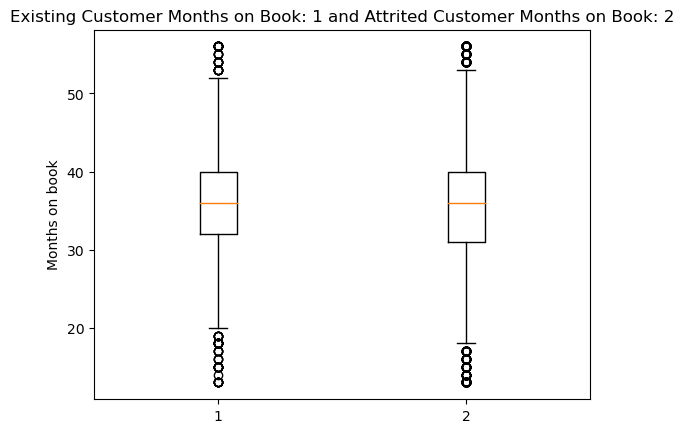

In [27]:
fig, ax = plt.subplots()
ax.boxplot([bin_df['Months_on_book'][bin_df['binary_attrition'] == 1],bin_df['Months_on_book'][bin_df['binary_attrition'] == 0]])
ax.set_title("Existing Customer Months on Book: 1 and Attrited Customer Months on Book: 2")
ax.set_ylabel('Months on book')
plt.show()

#### Customer Relationship Count

The customer relationship measure contains observations based on the number of services a single customer uses. An example might be number of cards.

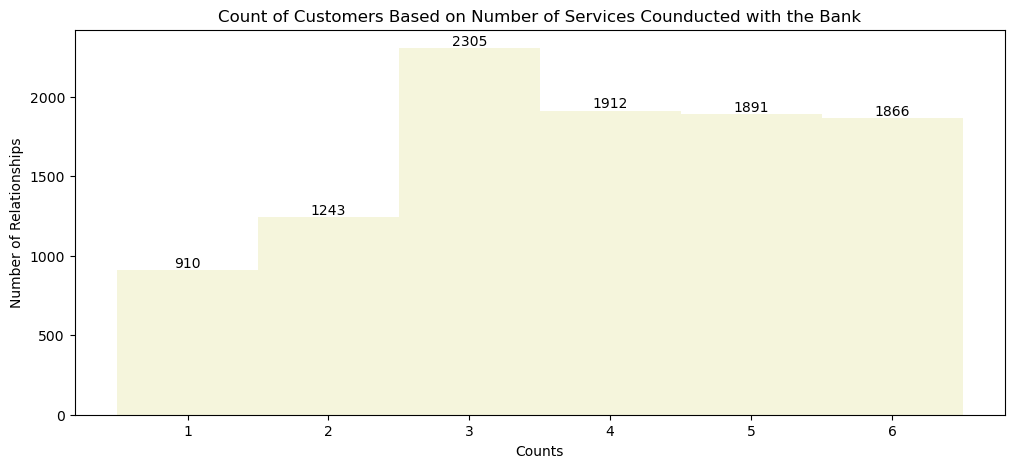

In [28]:
fig, ax = plt.subplots(figsize = (12,5))
bars = ax.bar(new_bin_df['Total_Relationship_Count'].value_counts().index,new_bin_df['Total_Relationship_Count'].value_counts().values, color = 'beige',  width=1.0)
ax.bar_label(bars)
plt.xlabel('Counts')
plt.ylabel('Number of Relationships')
plt.title('Count of Customers Based on Number of Services Counducted with the Bank')
plt.show()

#### Customer Inactivity in the Past 12 Months

This column tracks the inactivity of customers. The measure is in months.

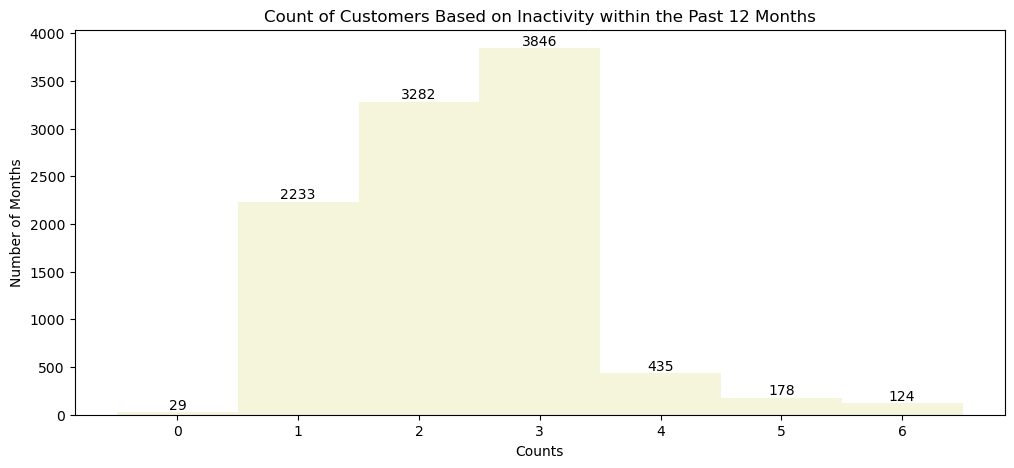

In [29]:
fig, ax = plt.subplots(figsize = (12,5))
bars = ax.bar(new_bin_df['Months_Inactive_12_mon'].value_counts().index,new_bin_df['Months_Inactive_12_mon'].value_counts().values, color = 'beige', width=1.0)
ax.bar_label(bars)
plt.xlabel('Counts')
plt.ylabel('Number of Months')
plt.title('Count of Customers Based on Inactivity within the Past 12 Months')
plt.show()

Based on what we known of the data, most customers are currently still with the bank. So, it can be expected that most customers will not have a lot of inactivity. We can test this idea of making a side-by-side visualization of bar graphs.

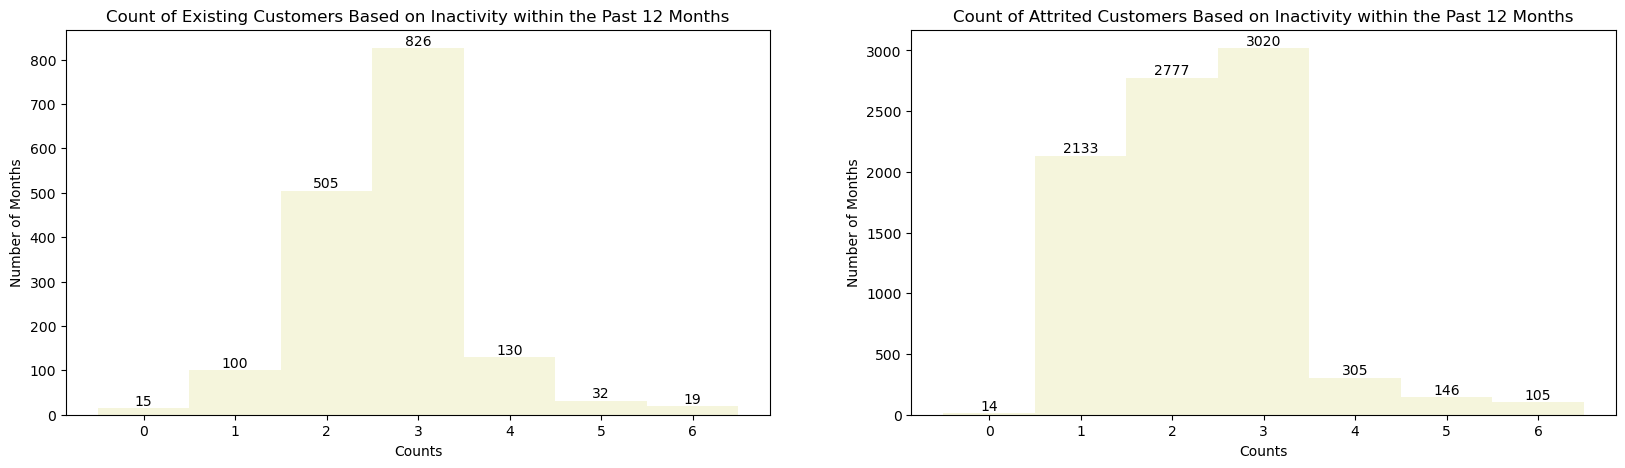

In [30]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (20,5))
bars = ax1.bar(new_bin_df['Months_Inactive_12_mon'][new_bin_df['binary_attrition'] == 1].value_counts().index,new_bin_df['Months_Inactive_12_mon'][new_bin_df['binary_attrition'] == 1].value_counts().values, color = 'beige', width=1.0)
ax1.bar_label(bars)
bars = ax2.bar(new_bin_df['Months_Inactive_12_mon'][new_bin_df['binary_attrition'] == 0].value_counts().index,new_bin_df['Months_Inactive_12_mon'][new_bin_df['binary_attrition'] == 0].value_counts().values, color = 'beige', width=1.0)
ax2.bar_label(bars)
ax1.set_xlabel('Counts')
ax1.set_ylabel('Number of Months')
ax1.set_title('Count of Existing Customers Based on Inactivity within the Past 12 Months')
ax2.set_xlabel('Counts')
ax2.set_ylabel('Number of Months')
ax2.set_title('Count of Attrited Customers Based on Inactivity within the Past 12 Months')
plt.show()

<b> Interpretation: </b> Suprisingly, customer inactivity does not change based on membership with the company. A reason might be because data collection was only taken at a specific pariod of time. Customers that are no longer with the company have not had enough time to build up inactivity.

#### Customer Contacts within the Last 12 Months

This column, and a few others that will be highlighted later, does not efficiently describe its data in the Kaggle repository.

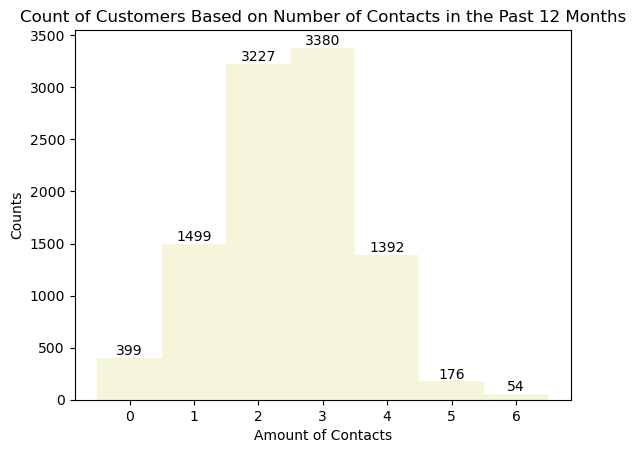

In [31]:
fig, ax = plt.subplots()
bars = ax.bar(new_bin_df['Contacts_Count_12_mon'].value_counts().index,new_bin_df['Contacts_Count_12_mon'].value_counts().values, color = 'beige', width=1.0)
ax.bar_label(bars)
plt.xlabel('Amount of Contacts')
plt.ylabel('Counts')
plt.title('Count of Customers Based on Number of Contacts in the Past 12 Months')
plt.show()

Deciding whether this column will remain in the table will be decided later in the analysis.

#### Customer Credit Limit

The credit limit of the customer is the amount of money the user has to spend per month.

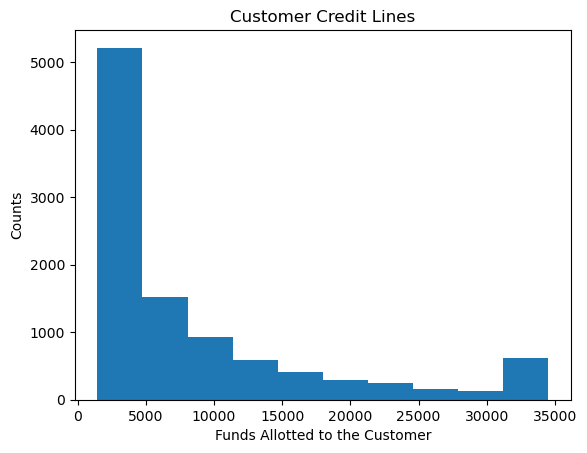

In [32]:
plt.hist(new_bin_df['Credit_Limit'])
plt.xlabel("Funds Allotted to the Customer")
plt.ylabel("Counts")
plt.title("Customer Credit Lines")
plt.show()

In [33]:
print(f"Breakdown of statistics for credit limit: \n\n {new_bin_df['Credit_Limit'].describe()}")

Breakdown of statistics for credit limit: 

 count    10127.000000
mean      8631.953698
std       9088.776650
min       1438.300000
25%       2555.000000
50%       4549.000000
75%      11067.500000
max      34516.000000
Name: Credit_Limit, dtype: float64


The distribution of the data is not surprising. Many customers do not have the qualifications to receive a high number of credit. This explains the large counts of customers near the lowest credit limits. A case can be made to rank the data similar to the income column.

#### Customer Revolving Balance

This column concerns the amount of money customers maintain in their accounts. If the cusomer has a balance over zero, they will be paying additional interest on that amount in their next payment.

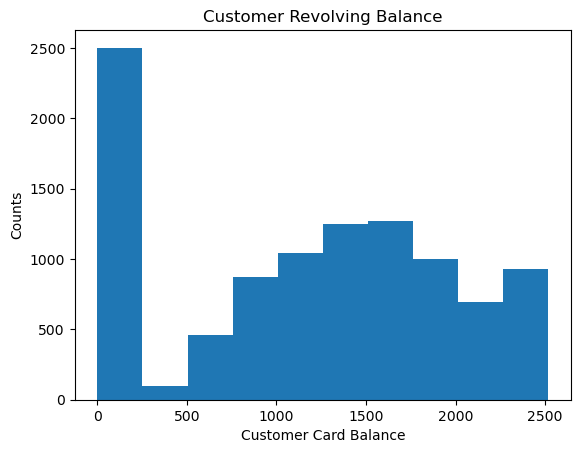

In [34]:
plt.hist(new_bin_df['Total_Revolving_Bal'])
plt.xlabel("Customer Card Balance")
plt.ylabel("Counts")
plt.title("Customer Revolving Balance")
plt.show()

In [35]:
print(f"Breakdown of statistics for revolving balance: \n\n {new_bin_df['Total_Revolving_Bal'].describe()}")

Breakdown of statistics for revolving balance: 

 count    10127.000000
mean      1162.814061
std        814.987335
min          0.000000
25%        359.000000
50%       1276.000000
75%       1784.000000
max       2517.000000
Name: Total_Revolving_Bal, dtype: float64


<b> Interpretation: </b> Unfortunately, it appears that most customers are not paying off their credit card balances. Those customers will be paying interest on their accounts. A question now might be what the difference is between existing and non-existing customers.

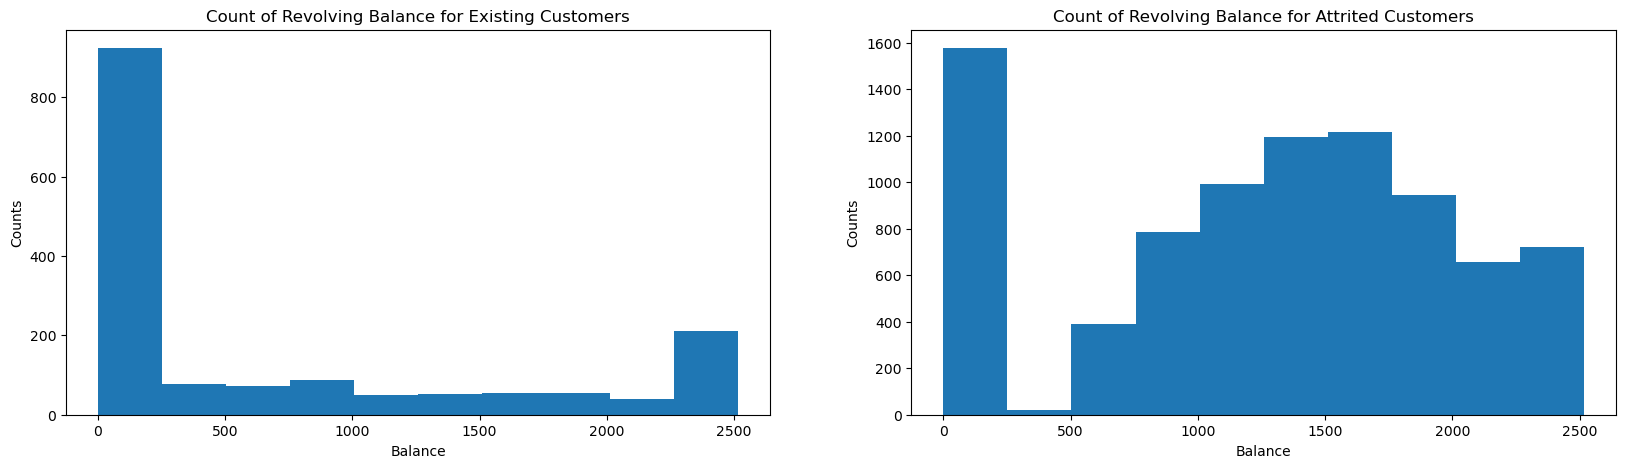

In [36]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (20,5))
ax1.hist(new_bin_df['Total_Revolving_Bal'][new_bin_df['binary_attrition'] == 1])
ax2.hist(new_bin_df['Total_Revolving_Bal'][new_bin_df['binary_attrition'] == 0])
ax1.set_ylabel('Counts')
ax1.set_xlabel('Balance')
ax1.set_title('Count of Revolving Balance for Existing Customers')
ax2.set_ylabel('Counts')
ax2.set_xlabel('Balance')
ax2.set_title('Count of Revolving Balance for Attrited Customers')
plt.show()

It appears that most customers no longer with the bank have paid off their balance. However, many customers appear to still have balance. Depending on the current policies, banks may never get paid by the customer. Active customers have a wider range in balance.

#### Customer Average open to buy

According to Google: "Open to Buy means maximum amount that Cardholder is permitted to spend using Credit Card from time to time which equals the Limit minus the Outstanding Balance."

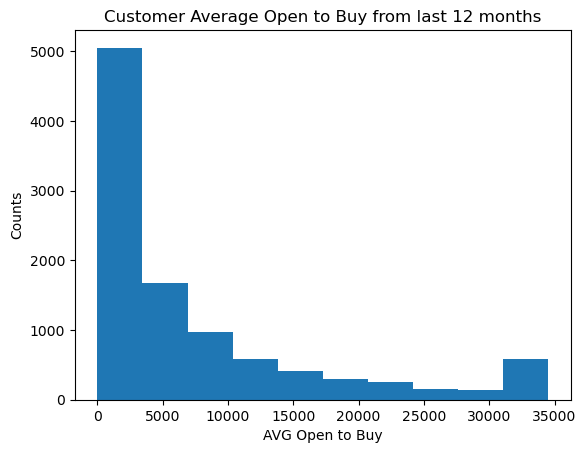

In [37]:
plt.hist(new_bin_df['Avg_Open_To_Buy'])
plt.xlabel("AVG Open to Buy")
plt.ylabel("Counts")
plt.title("Customer Average Open to Buy from last 12 months")
plt.show()

In [38]:
print(f"Breakdown of statistics for open to buy: \n\n {new_bin_df['Avg_Open_To_Buy'].describe()}")

Breakdown of statistics for open to buy: 

 count    10127.000000
mean      7469.139637
std       9090.685324
min          3.000000
25%       1324.500000
50%       3474.000000
75%       9859.000000
max      34516.000000
Name: Avg_Open_To_Buy, dtype: float64


<b> Interpretation: </b> It appears that many customers are spending their entire credit limit on average. There is one customer that is not spending any money on their account. This is found by comparing the max credit limit with this metric.

#### Customer Total Amount of Change (Quarter 4 Over Quarter 1)

This is another column with limited citations.

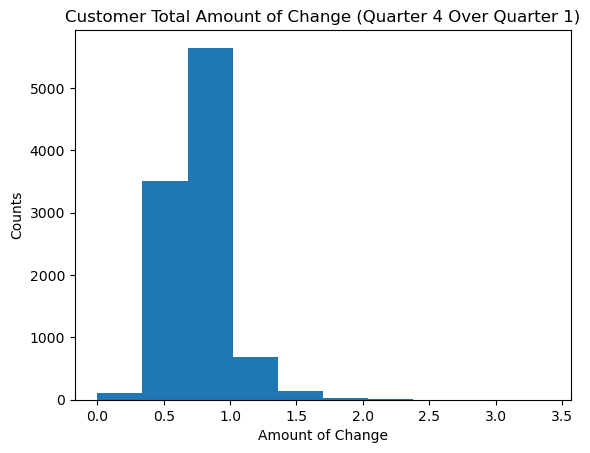

In [39]:
plt.hist(new_bin_df['Total_Amt_Chng_Q4_Q1'])
plt.xlabel("Amount of Change")
plt.ylabel("Counts")
plt.title("Customer Total Amount of Change (Quarter 4 Over Quarter 1)")
plt.show()

In [40]:
print(f"Breakdown of statistics for amount change: \n\n {new_bin_df['Total_Amt_Chng_Q4_Q1'].describe()}")

Breakdown of statistics for amount change: 

 count    10127.000000
mean         0.759941
std          0.219207
min          0.000000
25%          0.631000
50%          0.736000
75%          0.859000
max          3.397000
Name: Total_Amt_Chng_Q4_Q1, dtype: float64


#### Customer Transaction Amount with Card

This column notes the monetary value of transactions made by the customer over the last 12 months.

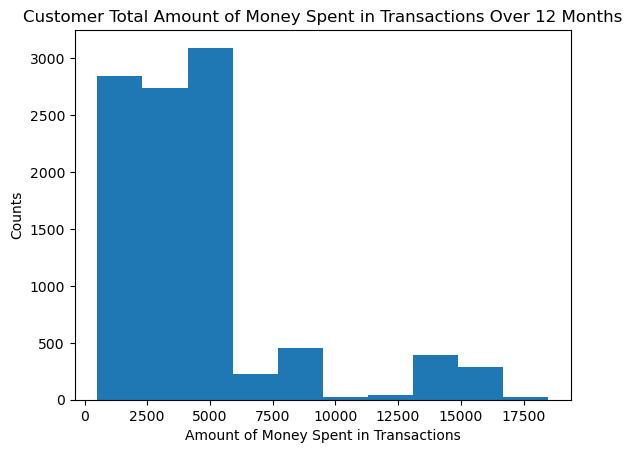

In [41]:
plt.hist(new_bin_df['Total_Trans_Amt'])
plt.xlabel("Amount of Money Spent in Transactions")
plt.ylabel("Counts")
plt.title("Customer Total Amount of Money Spent in Transactions Over 12 Months")
plt.show()

In [42]:
print(f"Breakdown of statistics for transaction Amounts: \n\n {new_bin_df['Total_Trans_Amt'].describe()}")

Breakdown of statistics for transaction Amounts: 

 count    10127.000000
mean      4404.086304
std       3397.129254
min        510.000000
25%       2155.500000
50%       3899.000000
75%       4741.000000
max      18484.000000
Name: Total_Trans_Amt, dtype: float64


<b> Interpretation: </b> Customers appear to be making small transactions with their card that accumulate over a year. The largest amount is only 18 thousand. That amount is only about half of the largest credit limit!

#### Customer Total Count of Transactions

This column tracks the number of transactions made over the last 12 months.

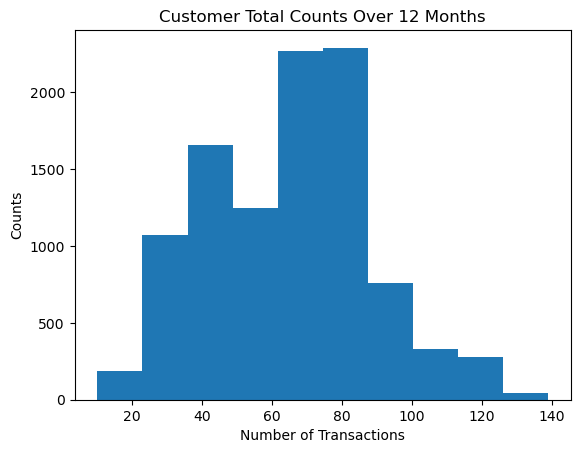

In [43]:
plt.hist(new_bin_df['Total_Trans_Ct'])
plt.xlabel("Number of Transactions")
plt.ylabel("Counts")
plt.title("Customer Total Counts Over 12 Months")
plt.show()

In [44]:
print(f"Breakdown of statistics for transaction counts: \n\n {new_bin_df['Total_Trans_Ct'].describe()}")

Breakdown of statistics for transaction counts: 

 count    10127.000000
mean        64.858695
std         23.472570
min         10.000000
25%         45.000000
50%         67.000000
75%         81.000000
max        139.000000
Name: Total_Trans_Ct, dtype: float64


Even though many customers have low credit limits, they are still conducting many transactions. Credit cards can be used to make quick purchases when cash is not on hand.

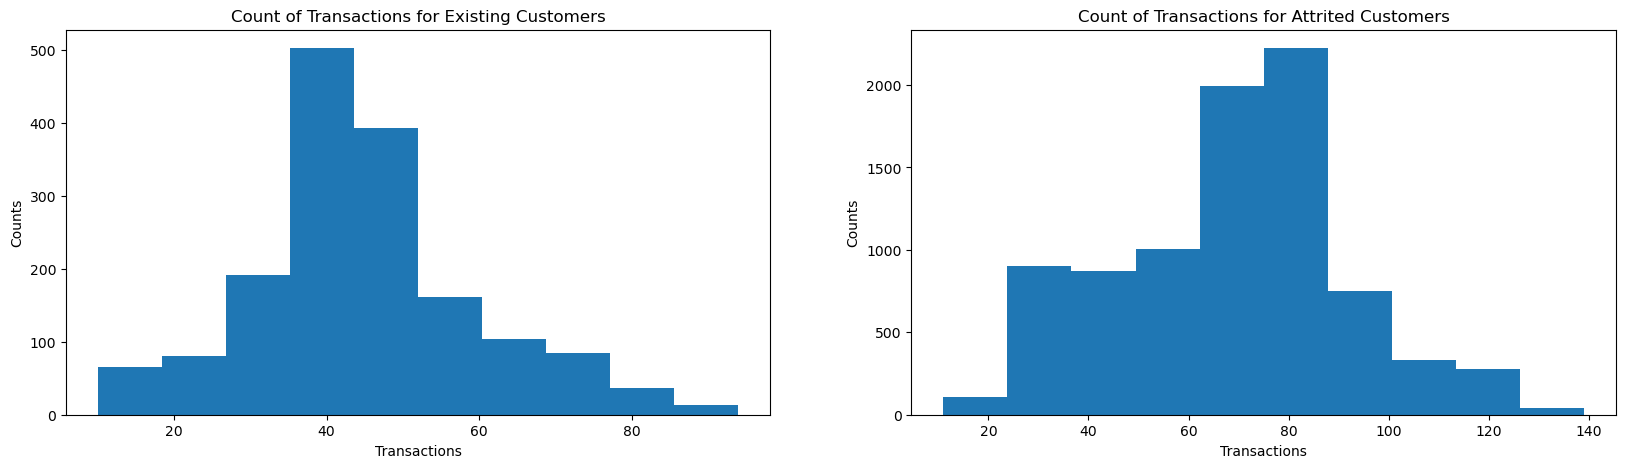

In [45]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (20,5))
ax1.hist(new_bin_df['Total_Trans_Ct'][new_bin_df['binary_attrition'] == 1])
ax2.hist(new_bin_df['Total_Trans_Ct'][new_bin_df['binary_attrition'] == 0])
ax1.set_ylabel('Counts')
ax1.set_xlabel('Transactions')
ax1.set_title('Count of Transactions for Existing Customers')
ax2.set_ylabel('Counts')
ax2.set_xlabel('Transactions')
ax2.set_title('Count of Transactions for Attrited Customers')
plt.show()

<b> Interpretation: </b> The attrited customers have less overall transactions; however, if they stopped using the card, they won't be posting their regular transactions for the months they left.

#### Customer Change in Transaction Count (Q4 Over Q1)

This column compares the amount of transactions made by customers in the fourth quarter based on the first quarter.

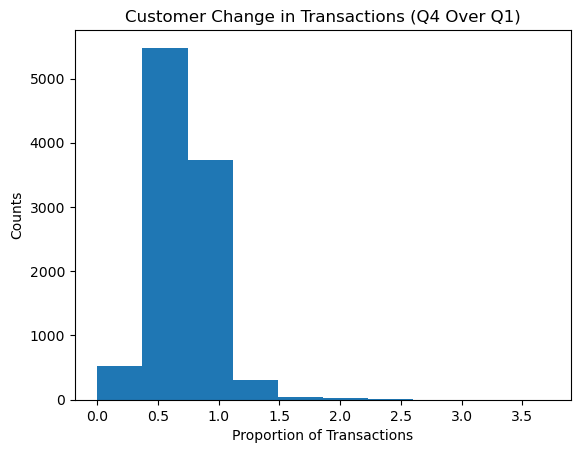

In [46]:
plt.hist(new_bin_df['Total_Ct_Chng_Q4_Q1'])
plt.xlabel("Proportion of Transactions")
plt.ylabel("Counts")
plt.title("Customer Change in Transactions (Q4 Over Q1)")
plt.show()

In [47]:
print(f"Breakdown of statistics for transaction change: \n\n {new_bin_df['Total_Ct_Chng_Q4_Q1'].describe()}")

Breakdown of statistics for transaction change: 

 count    10127.000000
mean         0.712222
std          0.238086
min          0.000000
25%          0.582000
50%          0.702000
75%          0.818000
max          3.714000
Name: Total_Ct_Chng_Q4_Q1, dtype: float64


<b> Interpretation: </b> Customers appear to be using the card less towards the end of the year than in the beginning.

#### Customer Card Utilization 

This column is a pre-designed metric that determines the average utilization of the card per customer.

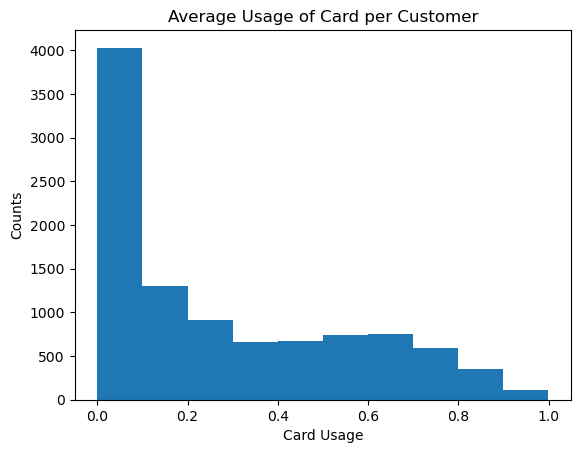

In [48]:
plt.hist(new_bin_df['Avg_Utilization_Ratio'])
plt.xlabel("Card Usage")
plt.ylabel("Counts")
plt.title("Average Usage of Card per Customer")
plt.show()

In [49]:
print(f"Breakdown of statistics for card usage: \n\n {new_bin_df['Avg_Utilization_Ratio'].describe()}")

Breakdown of statistics for card usage: 

 count    10127.000000
mean         0.274894
std          0.275691
min          0.000000
25%          0.023000
50%          0.176000
75%          0.503000
max          0.999000
Name: Avg_Utilization_Ratio, dtype: float64


<b> Interpretation: </b> A large portion of card holders a rated as not using their card frequently.

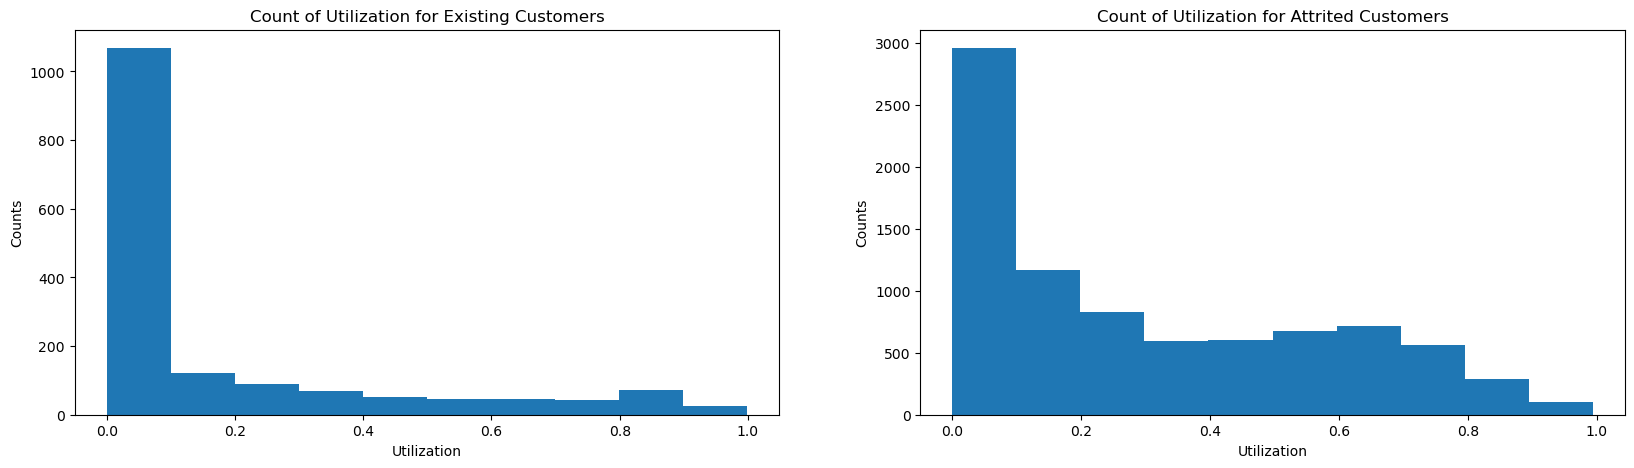

In [50]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (20,5))
ax1.hist(new_bin_df['Avg_Utilization_Ratio'][new_bin_df['binary_attrition'] == 1])
ax2.hist(new_bin_df['Avg_Utilization_Ratio'][new_bin_df['binary_attrition'] == 0])
ax1.set_ylabel('Counts')
ax1.set_xlabel('Utilization')
ax1.set_title('Count of Utilization for Existing Customers')
ax2.set_ylabel('Counts')
ax2.set_xlabel('Utilization')
ax2.set_title('Count of Utilization for Attrited Customers')
plt.show()

Both distributions look similar to one another.

## Cleaning Up the Data Frame

This will be a small portion that double checks the data frame and removes any columns that are no longer needed. Section will also display column information.

In [51]:
new_bin_df.head()

,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,binary_attrition,Gender_New,ranked_education,ranked_income,ranked_card,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single
0,45,3,High School,$60K - $80K,Blue,39,5,1,3,12691.0,...,1.625,0.061,0,0,1,2,0,0,1,0
1,49,5,Graduate,Less than $40K,Blue,44,6,1,2,8256.0,...,3.714,0.105,0,1,3,0,0,0,0,1
2,51,3,Graduate,$80K - $120K,Blue,36,4,1,0,3418.0,...,2.333,0.000,0,0,3,3,0,0,1,0
3,40,4,High School,Less than $40K,Blue,34,3,4,1,3313.0,...,2.333,0.760,0,1,1,0,0,0,1,0
4,40,3,Uneducated,$60K - $80K,Blue,21,5,1,0,4716.0,...,2.500,0.000,0,0,0,2,0,0,1,0


In [52]:
new_bin_df.columns

Index(['Customer_Age', 'Dependent_count', 'Education_Level', 'Income_Category',
       'Card_Category', 'Months_on_book', 'Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
       'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
       'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
       'Avg_Utilization_Ratio', 'binary_attrition', 'Gender_New',
       'ranked_education', 'ranked_income', 'ranked_card',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single'],
      dtype='object')

In [53]:
clean_df = new_bin_df.drop(['Education_Level','Income_Category','Card_Category'], axis = 1)

In [54]:
clean_df.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,binary_attrition,Gender_New,ranked_education,ranked_income,ranked_card,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,...,1.625,0.061,0,0,1,2,0,0,1,0
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,...,3.714,0.105,0,1,3,0,0,0,0,1
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,...,2.333,0.000,0,0,3,3,0,0,1,0
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,...,2.333,0.760,0,1,1,0,0,0,1,0
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,...,2.500,0.000,0,0,0,2,0,0,1,0


In [55]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              10127 non-null  int64  
 1   Dependent_count           10127 non-null  int64  
 2   Months_on_book            10127 non-null  int64  
 3   Total_Relationship_Count  10127 non-null  int64  
 4   Months_Inactive_12_mon    10127 non-null  int64  
 5   Contacts_Count_12_mon     10127 non-null  int64  
 6   Credit_Limit              10127 non-null  float64
 7   Total_Revolving_Bal       10127 non-null  int64  
 8   Avg_Open_To_Buy           10127 non-null  float64
 9   Total_Amt_Chng_Q4_Q1      10127 non-null  float64
 10  Total_Trans_Amt           10127 non-null  int64  
 11  Total_Trans_Ct            10127 non-null  int64  
 12  Total_Ct_Chng_Q4_Q1       10127 non-null  float64
 13  Avg_Utilization_Ratio     10127 non-null  float64
 14  binary

## Correlations Between Variables

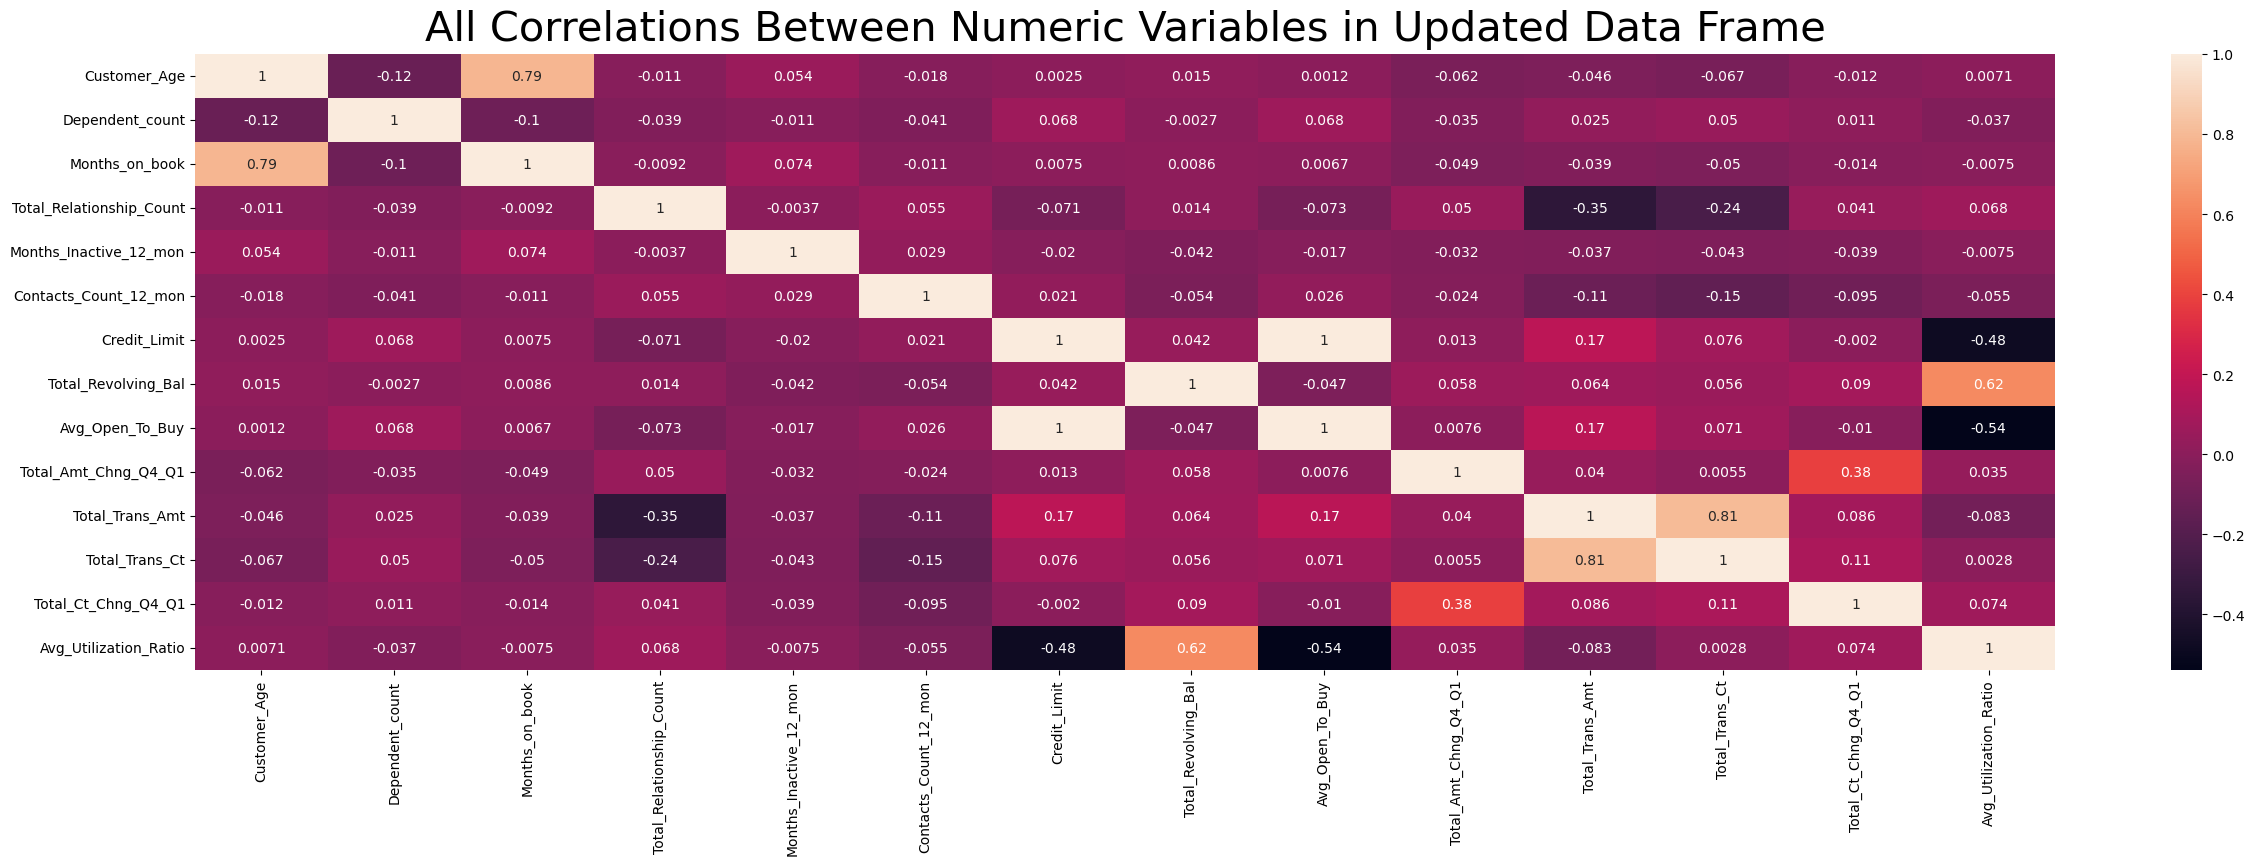

In [56]:
num_df = clean_df.drop(['binary_attrition','Gender_New','ranked_education', 'Marital_Status_Divorced', 'Marital_Status_Married', 'Marital_Status_Single', 'ranked_income', 'ranked_card']
                       , axis = 1)
heat = num_df.corr()
plt.figure(figsize=[30,8])
plt.title("All Correlations Between Numeric Variables in Updated Data Frame", size=30, pad=10)
sns.heatmap(heat, annot=True)
plt.show()

<b> Analysis: </b> There are a few relationships that are worth noting:

<b> Months with the company and customer age has a strong correlation. </b>
 <br>&emsp; &#8226; This relation could imply that the older you are, the more likely you want to settle with a bank rather than keep looking.</br>

<b> Revolving balance and utilization has a noticeable correlation. </b>
 <br>&emsp; &#8226; The more customers use their card, the larger the balance gets.</br>

<b> Transaction amount and number of transactions correlate strongly. </b>
 <br>&emsp; &#8226; The more transactions the customer makes, the more money the customer accrues on the card.</br>

<b> The strongest correlation is between the average open to buy and the credit limit.</b>
 <br>&emsp; &#8226; Customers with larger credit limits appear to be paying off their balances more.</br>


## Next Steps: Conclude table changes, make any knew changes, explain final thoughts, add any other visuals, move onto ML algorithms

In [57]:
clean_df.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,binary_attrition,Gender_New,ranked_education,ranked_income,ranked_card,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,...,1.625,0.061,0,0,1,2,0,0,1,0
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,...,3.714,0.105,0,1,3,0,0,0,0,1
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,...,2.333,0.000,0,0,3,3,0,0,1,0
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,...,2.333,0.760,0,1,1,0,0,0,1,0
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,...,2.500,0.000,0,0,0,2,0,0,1,0


In [58]:
clean_df.shape

(10127, 22)

## Multicollinearity

Before moving into the modeling phase, the dataset must be truncated if there are variables with strong correlations with one another. This will be tested using a VIF measure. This measure searches the variables in the data set and assigns a value:
<br>$$\text{VIF }= \frac{1}{1 -R^2}$$</br>
<br> Where R-squared stands for the coefficient of determination </br>
<br> <b>Impact:</b> Multicollinearity is a serious issue and a few steps can be take. If we choose to use linear regression, we must make sure that each predictor is independent of one another. We can do this by using the VIF measure to identify problematic features and remove them. For nonlinear regression, we will be dealing with multicollinearity a different way. Since the data expects interactions between predictors, we do not necessarily have to remove predictors. However, we still have to account for multicollinearity. We do this by standardizing the required columns. By doing this we are artificially reducing the multicollinearity. If we check the VIFs after the standardization and we spot a problem, we can decide to remove the column. The dataset will be split into one that retains all predictors and one that reduces the VIF value. Typically, values greater than 5 indicate a column with high multicollinearity.

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [60]:
vif_data = pd.DataFrame()
vif_data["feature"] = clean_df.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(clean_df.values, i)
                          for i in range(len(clean_df.columns))]
  
print(vif_data)

C:\Users\octav\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                     feature        VIF
0               Customer_Age   2.688037
1            Dependent_count   1.043408
2             Months_on_book   2.659149
3   Total_Relationship_Count   1.209034
4     Months_Inactive_12_mon   1.033031
5      Contacts_Count_12_mon   1.063416
6               Credit_Limit        inf
7        Total_Revolving_Bal        inf
8            Avg_Open_To_Buy        inf
9       Total_Amt_Chng_Q4_Q1   1.195997
10           Total_Trans_Amt   3.490750
11            Total_Trans_Ct   3.763580
12       Total_Ct_Chng_Q4_Q1   1.267285
13     Avg_Utilization_Ratio   2.948958
14          binary_attrition   1.598893
15                Gender_New   2.783554
16          ranked_education   1.001765
17             ranked_income   3.232306
18               ranked_card   1.430902
19   Marital_Status_Divorced   9.241458
20    Marital_Status_Married  61.203190
21     Marital_Status_Single  45.085165


For the next block of code, a series of drops were conducted and finalized. Each column dropped was based on having the highest VIF in that set. The final results display the remaining columns that, together, fall below the limit.

In [61]:
reg_df = clean_df.drop(["Avg_Open_To_Buy", "Customer_Age", "Total_Trans_Ct", "Months_on_book","Total_Amt_Chng_Q4_Q1",
                    "Total_Ct_Chng_Q4_Q1", "Total_Revolving_Bal", "Total_Relationship_Count",
                    "Months_Inactive_12_mon"], axis = 1)
vif_data = pd.DataFrame()
vif_data["feature"] = reg_df.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(reg_df.values, i)
                          for i in range(len(reg_df.columns))]
  
print(vif_data)

                    feature        VIF
0           Dependent_count   1.017315
1     Contacts_Count_12_mon   1.056619
2              Credit_Limit   2.294513
3           Total_Trans_Amt   1.095807
4     Avg_Utilization_Ratio   1.384578
5          binary_attrition   1.128607
6                Gender_New   2.724014
7          ranked_education   1.001389
8             ranked_income   3.212900
9               ranked_card   1.427750
10  Marital_Status_Divorced   2.858485
11   Marital_Status_Married  14.618614
12    Marital_Status_Single  10.819650


If we plan to use linear regression, we can reference this dataset.

## Standardizing the Data

The purpose of standardizing data is to adjust continuous predictors by reducing multicollinearity. Since tree-based models do not require standardization, two datasets will be made: one that standardizes, and one that does not. Both models will be tested using the decision tree model. 

In [62]:
clean_df.columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'binary_attrition', 'Gender_New', 'ranked_education', 'ranked_income',
       'ranked_card', 'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single'],
      dtype='object')

The first step will be to split the data into categorical and numerical datasets.

In [63]:
cat_df = clean_df.drop(['Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count','Months_Inactive_12_mon',
                       'Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1',
                       'Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio'], axis= 1)
num_df = clean_df.drop(['binary_attrition','Gender_New','ranked_education', 'Marital_Status_Divorced', 'Marital_Status_Married', 'Marital_Status_Single', 'ranked_income', 'ranked_card']
                       , axis = 1)

For the next part, we can either standardize the numerical data or deal with the categorical data. We will standardize the numeric data first.

#### How are we treating the numeric data?

The first step is installing the package that will standardize the data for us.

In [64]:
from sklearn import preprocessing

In [65]:
std_num_df = preprocessing.scale(num_df, axis=0)

In [66]:
std_num_df = pd.DataFrame(std_num_df, columns = num_df.columns, index = num_df.index)
std_num_df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04
mean,3.127744e-17,5.680062e-15,-5.687166e-16,8.453372e-15,-2.129892e-15,1.588144e-15,9.430893e-16,-1.830898e-15,-4.386159e-17,2.801869e-16,-5.134192e-16,1.194179e-14,-1.306570e-16,-2.298338e-16
std,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00
min,-2.535541e+00,-1.806378e+00,-2.871068e+00,-1.809512e+00,-2.316674e+00,-2.219655e+00,-7.915266e-01,-1.426858e+00,-8.213361e-01,-3.466947e+00,-1.146344e+00,-2.337256e+00,-2.991597e+00,-9.971550e-01
25%,-6.643815e-01,-1.036462e+00,-6.171294e-01,-5.227845e-01,-3.375979e-01,-4.116160e-01,-6.686548e-01,-9.863389e-01,-6.759604e-01,-5.882438e-01,-6.619405e-01,-8.460801e-01,-5.469820e-01,-9.137243e-01
50%,-4.066159e-02,-2.665471e-01,8.964513e-03,1.205790e-01,-3.375979e-01,-4.116160e-01,-4.492525e-01,1.388875e-01,-4.394979e-01,-1.092203e-01,-1.486877e-01,9.123036e-02,-4.293775e-02,-3.587287e-01
75%,7.078024e-01,5.033681e-01,5.098397e-01,7.639426e-01,6.519402e-01,4.924038e-01,2.679862e-01,7.622408e-01,2.629041e-01,4.519214e-01,9.918090e-02,6.877007e-01,4.443050e-01,8.274384e-01
max,3.327426e+00,2.043199e+00,2.513340e+00,1.407306e+00,3.620555e+00,3.204463e+00,2.848054e+00,1.661686e+00,2.975375e+00,1.203060e+01,4.144855e+00,3.158792e+00,1.260857e+01,2.626640e+00


#### How are we treating the categorical data?

First, we can double check the kind of categorical data we have:

In [67]:
cat_df.head()

,binary_attrition,Gender_New,ranked_education,ranked_income,ranked_card,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single
0,0,0,1,2,0,0,1,0
1,0,1,3,0,0,0,0,1
2,0,0,3,3,0,0,1,0
3,0,1,1,0,0,0,1,0
4,0,0,0,2,0,0,1,0


Attrition and gender are the only nominal types of categorical data and the rest are ordinal. Since we have already manually encoded the rank and substituted the nominal columns with numeric values, no other work needs to be done. Now, the data can be reattached. Note that we will have a standardized and a non-standardized datasets.

In [68]:
std_df = pd.concat([cat_df,std_num_df], axis = 1)
non_std_df = pd.DataFrame(clean_df, columns = clean_df.columns, index = clean_df.index)

For comparison: 

In [69]:
std_df.head()

,binary_attrition,Gender_New,ranked_education,ranked_income,ranked_card,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Customer_Age,Dependent_count,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,0,1,2,0,0,1,0,-0.165406,0.503368,...,-1.327136,0.492404,0.446622,-0.473422,0.488971,2.623494,-0.959707,-0.973895,3.834003,-0.775882
1,0,1,3,0,0,0,0,1,0.333570,2.043199,...,-1.327136,-0.411616,-0.041367,-0.366667,-0.008486,3.563293,-0.916433,-1.357340,12.608573,-0.616276
2,0,0,3,3,0,0,1,0,0.583058,0.503368,...,-1.327136,-2.219655,-0.573698,-1.426858,-0.445658,8.367214,-0.740982,-1.911206,6.807864,-0.997155
3,0,1,1,0,0,0,1,0,-0.789126,1.273283,...,1.641478,-1.315636,-0.585251,1.661686,-0.734100,2.942843,-0.951758,-1.911206,6.807864,1.759686
4,0,0,0,2,0,0,1,0,-0.789126,0.503368,...,-1.327136,-2.219655,-0.430877,-1.426858,-0.302868,6.455682,-1.056263,-1.570365,7.509325,-0.997155


In [70]:
non_std_df.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,binary_attrition,Gender_New,ranked_education,ranked_income,ranked_card,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,...,1.625,0.061,0,0,1,2,0,0,1,0
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,...,3.714,0.105,0,1,3,0,0,0,0,1
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,...,2.333,0.000,0,0,3,3,0,0,1,0
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,...,2.333,0.760,0,1,1,0,0,0,1,0
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,...,2.500,0.000,0,0,0,2,0,0,1,0


We can re-check the multicollinearity with our standardized dataset:

In [71]:
vif_data = pd.DataFrame()
vif_data["feature"] = std_df.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(std_df.values, i)
                          for i in range(len(std_df.columns))]
  
print(vif_data)

                     feature       VIF
0           binary_attrition  1.598893
1                 Gender_New  2.783554
2           ranked_education  1.001765
3              ranked_income  3.232306
4                ranked_card  1.430902
5    Marital_Status_Divorced  1.923440
6     Marital_Status_Married  7.942978
7      Marital_Status_Single  5.938892
8               Customer_Age  2.688037
9            Dependent_count  1.043408
10            Months_on_book  2.659149
11  Total_Relationship_Count  1.209034
12    Months_Inactive_12_mon  1.033031
13     Contacts_Count_12_mon  1.063416
14              Credit_Limit       inf
15       Total_Revolving_Bal       inf
16           Avg_Open_To_Buy       inf
17      Total_Amt_Chng_Q4_Q1  1.195997
18           Total_Trans_Amt  3.490750
19            Total_Trans_Ct  3.763580
20       Total_Ct_Chng_Q4_Q1  1.267285
21     Avg_Utilization_Ratio  2.948958


C:\Users\octav\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Since the results still show credit limit, total revolving balance, and average open to buy with an extremely high VIF value, dropping one of those columns seems necessary. Based on interest, average open to buy was dropped.

In [72]:
new_std_df = std_df.drop(['Avg_Open_To_Buy'], axis = 1)

vif_data = pd.DataFrame()
vif_data["feature"] = new_std_df.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(new_std_df.values, i)
                          for i in range(len(new_std_df.columns))]
  
print(vif_data)

                     feature       VIF
0           binary_attrition  1.598893
1                 Gender_New  2.783554
2           ranked_education  1.001765
3              ranked_income  3.232306
4                ranked_card  1.430902
5    Marital_Status_Divorced  1.923440
6     Marital_Status_Married  7.942978
7      Marital_Status_Single  5.938892
8               Customer_Age  2.688037
9            Dependent_count  1.043408
10            Months_on_book  2.659149
11  Total_Relationship_Count  1.209034
12    Months_Inactive_12_mon  1.033031
13     Contacts_Count_12_mon  1.063416
14              Credit_Limit  2.698804
15       Total_Revolving_Bal  2.318388
16      Total_Amt_Chng_Q4_Q1  1.195997
17           Total_Trans_Amt  3.490750
18            Total_Trans_Ct  3.763580
19       Total_Ct_Chng_Q4_Q1  1.267285
20     Avg_Utilization_Ratio  2.948958


With the 'Avg_Open_To_Buy' column removed, all the other columns indicate a relatively low level of multicollinearity. This change will help improve our future analysis because strong multicollinearity can produce misleading results and possibly overlook significant predictors.

## Splitting the Data

Before moving on the next parts of the project, we must split the processed datasets. The data can be split many ways. In this case, we will be using an 80-20 split between training and test data.

In [73]:
from sklearn.model_selection import train_test_split 

In [74]:
#Standard
predictors_std = new_std_df.drop(['binary_attrition'], axis = 1)
target_std = new_std_df['binary_attrition']

#Non-Standard
predictors_non_std = non_std_df.drop(['binary_attrition'], axis = 1)
target_non_std = non_std_df['binary_attrition']

In [75]:
#Standard Split
pred_std_train, pred_std_test, tar_std_train, tar_std_test = train_test_split(predictors_std, target_std, 
                                                                    test_size = 0.2,  random_state = 42)

#Non-Standard Split
pred_non_std_train, pred_non_std_test, tar_non_std_train, tar_non_std_test = train_test_split(predictors_non_std, target_non_std
                                                                                             , test_size = 0.2,
                                                                                             random_state = 42)

## Dealing with the Unbalanced Data

Now that we have standardized and split our data sufficiently, we can now consider another issue–sampling. Currently our dataset is extremely unbalanced with existing customers making up a large portion of the data. With such a large imbalance, our models will naturally sway towards predicting existing customers solely based on the imbalance. To counter this issue, we can employ a few different methods: (These methods will only be used on the training data)

A library called imblearn contains all of the methods we will be using. This library was downloaded using pip install.

In [76]:
from collections import Counter #Will be used to count the occurrences of each method's results
import imblearn

#### Random Over-Sampling

Oversampling involves adding copies of the minority class to balance the dataset.

In [77]:
from imblearn.over_sampling import RandomOverSampler

This library will allow us to randomly sample the minority class, with replacement, until it matches the majority class count.

In [78]:
ros = RandomOverSampler(sampling_strategy='minority', random_state = 42)
X_ros_std, y_ros_std = ros.fit_resample(pred_std_train, tar_std_train)
X_ros_non_std, y_ros_non_std = ros.fit_resample(pred_non_std_train, tar_non_std_train)

In [79]:
print(f"Standardized data with Random Over-Sampling: {Counter(y_ros_std)}")
print(f"Non-Standardized data with Random Over-Sampling: {Counter(y_ros_non_std)}")

Standardized data with Random Over-Sampling: Counter({0: 6801, 1: 6801})
Non-Standardized data with Random Over-Sampling: Counter({0: 6801, 1: 6801})


#### SMOTE

The Synthetic Minority Oversampling Technique generates synthetic data from our minority class to balance the dataset. It is considered another kind of ROS.

In [80]:
from imblearn.over_sampling import SMOTE

In [81]:
smote = SMOTE(sampling_strategy = 'minority', random_state = 42)
X_smote_std, y_smote_std = smote.fit_resample(pred_std_train, tar_std_train)
X_smote_non_std, y_smote_non_std = smote.fit_resample(pred_non_std_train, tar_non_std_train)

In [82]:
print(f"Standardized data with SMOTE Random Over-Sampling: {Counter(y_smote_std)}")
print(f"Non-Standardized data with SMOTE Random Over-Sampling: {Counter(y_smote_non_std)}")

Standardized data with SMOTE Random Over-Sampling: Counter({0: 6801, 1: 6801})
Non-Standardized data with SMOTE Random Over-Sampling: Counter({0: 6801, 1: 6801})


#### Random Under-Sampling

Random under-sampling randomly selects a subset of the data that has an equal amount of all classifications. In this case, the number of existing customers will be reduced.

In [83]:
from imblearn.under_sampling import RandomUnderSampler

In [84]:
rus = RandomUnderSampler(sampling_strategy='majority', random_state = 42, replacement = False)
X_rus_std, y_rus_std = rus.fit_resample(pred_std_train, tar_std_train)
X_rus_non_std, y_rus_non_std = rus.fit_resample(pred_non_std_train, tar_non_std_train)

Note: RUS has the option to use replacement. We have elected not to use replacement.

#### Note: We will also be using the training data that does not incorporate a sampling method. This will be used to compare the improvements.

## Models and Metrics

Now that we have completed the processing stages, we can now begin to test our predictors. First, we will lay out the metrics that we will be using.

In [85]:
from sklearn.metrics import (confusion_matrix, classification_report, precision_score, 
recall_score, f1_score, RocCurveDisplay, PrecisionRecallDisplay, accuracy_score, confusion_matrix, ConfusionMatrixDisplay)
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import roc_auc_score

All of the metrics we use comes from the sklearn.metrics library.

### How will we produce our metrics?

Each algorithm will call the below function and spit out a series of relevant metrics. Below is a description of all the metrics and graphs used.

In [86]:
def avg(lst):
    if(len(lst)==0):
        return 0
    else:
        return sum(lst) / len(lst)

In [87]:
sampling = ["Oversampling", "SMOTE", "Undersampling", "None", "Multiple"]
models = ["KNN","SGD","Decision Tree", "Random Forests", "SVM", "Soft Voting"]

metrics_df_train= pd.DataFrame(columns = ['Model', 'Sampler', 'label_0_precision', 'label_0_recall', 'label_0_f1_score', 'label_1_precision', 'label_1_recall', 'label_1_f1_score', 'accuracy'])
metrics_df_test= pd.DataFrame(columns = ['Model', 'Sampler', 'label_0_precision', 'label_0_recall', 'label_0_f1_score', 'label_1_precision', 'label_1_recall', 'label_1_f1_score', 'accuracy'])

#To get the average stats of each sampler. 
sampler_avg_dict_train = {
    "Oversampling": {
        "label_0_precision": [],
        "label_0_recall": [],
        "label_0_f1_score": [],
        "label_1_precision": [],
        "label_1_recall": [],
        "label_1_f1_score": [],
        "accuracy": []
    },
    "SMOTE": {
        "label_0_precision": [],
        "label_0_recall": [],
        "label_0_f1_score": [],
        "label_1_precision": [],
        "label_1_recall": [],
        "label_1_f1_score": [],
        "accuracy": []
    },  
    "Undersampling": {
        "label_0_precision": [],
        "label_0_recall": [],
        "label_0_f1_score": [],
        "label_1_precision": [],
        "label_1_recall": [],
        "label_1_f1_score": [],
        "accuracy": []
    },
    "None": {
        "label_0_precision": [],
        "label_0_recall": [],
        "label_0_f1_score": [],
        "label_1_precision": [],
        "label_1_recall": [],
        "label_1_f1_score": [],
        "accuracy": []
    }
}

sampler_avg_dict_test = {
    "Oversampling": {
        "label_0_precision": [],
        "label_0_recall": [],
        "label_0_f1_score": [],
        "label_1_precision": [],
        "label_1_recall": [],
        "label_1_f1_score": [],
        "accuracy": []
    },
    "SMOTE": {
        "label_0_precision": [],
        "label_0_recall": [],
        "label_0_f1_score": [],
        "label_1_precision": [],
        "label_1_recall": [],
        "label_1_f1_score": [],
        "accuracy": []
    },  
    "Undersampling": {
        "label_0_precision": [],
        "label_0_recall": [],
        "label_0_f1_score": [],
        "label_1_precision": [],
        "label_1_recall": [],
        "label_1_f1_score": [],
        "accuracy": []
    },
    "None": {
        "label_0_precision": [],
        "label_0_recall": [],
        "label_0_f1_score": [],
        "label_1_precision": [],
        "label_1_recall": [],
        "label_1_f1_score": [],
        "accuracy": []
    }
}



classifier_avg_dict_train = {
    "KNN": {
        "label_0_precision": [],
        "label_0_recall": [],
        "label_0_f1_score": [],
        "label_1_precision": [],
        "label_1_recall": [],
        "label_1_f1_score": [],
        "accuracy": []
    },
    "SGD": {
        "label_0_precision": [],
        "label_0_recall": [],
        "label_0_f1_score": [],
        "label_1_precision": [],
        "label_1_recall": [],
        "label_1_f1_score": [],
        "accuracy": []
    },  
    "Decision Tree": {
        "label_0_precision": [],
        "label_0_recall": [],
        "label_0_f1_score": [],
        "label_1_precision": [],
        "label_1_recall": [],
        "label_1_f1_score": [],
        "accuracy": []
    },
    "Random Forests": {
        "label_0_precision": [],
        "label_0_recall": [],
        "label_0_f1_score": [],
        "label_1_precision": [],
        "label_1_recall": [],
        "label_1_f1_score": [],
        "accuracy": []
    },
    "SVM" : {
        "label_0_precision": [],
        "label_0_recall": [],
        "label_0_f1_score": [],
        "label_1_precision": [],
        "label_1_recall": [],
        "label_1_f1_score": [],
        "accuracy": []        
    }
}

classifier_avg_dict_test = {
    "KNN": {
        "label_0_precision": [],
        "label_0_recall": [],
        "label_0_f1_score": [],
        "label_1_precision": [],
        "label_1_recall": [],
        "label_1_f1_score": [],
        "accuracy": []
    },
    "SGD": {
        "label_0_precision": [],
        "label_0_recall": [],
        "label_0_f1_score": [],
        "label_1_precision": [],
        "label_1_recall": [],
        "label_1_f1_score": [],
        "accuracy": []
    },  
    "Decision Tree": {
        "label_0_precision": [],
        "label_0_recall": [],
        "label_0_f1_score": [],
        "label_1_precision": [],
        "label_1_recall": [],
        "label_1_f1_score": [],
        "accuracy": []
    },
    "Random Forests": {
        "label_0_precision": [],
        "label_0_recall": [],
        "label_0_f1_score": [],
        "label_1_precision": [],
        "label_1_recall": [],
        "label_1_f1_score": [],
        "accuracy": []
    },
    "SVM" : {
        "label_0_precision": [],
        "label_0_recall": [],
        "label_0_f1_score": [],
        "label_1_precision": [],
        "label_1_recall": [],
        "label_1_f1_score": [],
        "accuracy": []        
    }
}



def metricDisplay(model, sampling_type, algorithm, pred_test, tar_test, pred_train, tar_train, special_run = False, no_metric = False ):
    combined_name = model + "(" + sampling_type + ")"
    print("Metrics Regarding Training Data:")
    #Cross value predict for our training data. Due to how weird cross value prediction is, I might just substitue 
    #it for regular prediction.
    #Format for ARGS: [CLASSIFIER], predictors_[under, over, smote]_train, target_[under, over, smote]_train, cv= 10
    algorithm_predict_train = cross_val_predict(algorithm, pred_train, tar_train, cv=10)
    
    #This is the confusion matrix for the training data, added as requested by the Professor.
    cm = confusion_matrix(tar_train, algorithm_predict_train)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()
    
    #These are just the verbose versions of the classification report. Can remove depending on needs.
    # Use same format as above. 
    print (f"Train Precision Score for {combined_name}: ", precision_score(tar_train, algorithm_predict_train))
    print (f"Train Recall Score for {combined_name} " , recall_score(tar_train, algorithm_predict_train))
    print (f"Train F1 Score for {combined_name} " , f1_score(tar_train, algorithm_predict_train))
    #Basically the holy grail of all our metrics excluding graphs.
    # ARGS: target_[over, under, smote]_train, [CLASSIFIER NAME]_[over, under, smote]_predict_train
    print(classification_report(tar_train, algorithm_predict_train))
    PrecisionRecallDisplay.from_predictions(tar_train, algorithm_predict_train, name = combined_name)
    plt.show()
    classification_metrics_train = classification_report(tar_train, algorithm_predict_train, output_dict = True)
    
    l0_precision = classification_metrics_train['0']['precision']
    l0_recall = classification_metrics_train['0']['recall']
    l0_f1_score = classification_metrics_train['0']['f1-score']
    l1_precision = classification_metrics_train['1']['precision']
    l1_recall = classification_metrics_train['1']['recall']
    l1_f1_score = classification_metrics_train['1']['f1-score']
    accuracy = classification_metrics_train['accuracy']
    
    if (not no_metric):
        metrics_df_train.loc[len(metrics_df_train.index)] = [model, sampling_type, l0_precision, l0_recall, l0_f1_score, l1_precision, l1_recall, l1_f1_score, accuracy]
    
    
    
    if (not special_run):
        classifier_avg_dict_train[model]['label_0_precision'].append(l0_precision)
        classifier_avg_dict_train[model]['label_0_recall'].append(l0_recall)
        classifier_avg_dict_train[model]['label_0_f1_score'].append(l0_f1_score)
        classifier_avg_dict_train[model]['label_1_precision'].append(l1_precision)
        classifier_avg_dict_train[model]['label_1_recall'].append(l1_recall)
        classifier_avg_dict_train[model]['label_1_f1_score'].append(l1_f1_score)
        classifier_avg_dict_train[model]['accuracy'].append(accuracy)

    if (not special_run ):
        sampler_avg_dict_train[sampling_type]['label_0_precision'].append(l0_precision)
        sampler_avg_dict_train[sampling_type]['label_0_recall'].append(l0_recall)
        sampler_avg_dict_train[sampling_type]['label_0_f1_score'].append(l0_f1_score)
        sampler_avg_dict_train[sampling_type]['label_1_precision'].append(l1_precision)
        sampler_avg_dict_train[sampling_type]['label_1_recall'].append(l1_recall)
        sampler_avg_dict_train[sampling_type]['label_1_f1_score'].append(l1_f1_score)
        sampler_avg_dict_train[sampling_type]['accuracy'].append(accuracy)
        
    print("Metrics Regarding Test Data:")

    algorithm_predict_test = algorithm.predict(pred_test)
    
        #Same thing as cross val predict, but a regular prediction and without the target. Also, use test instead. 
        #This is the confusion matrix for the training data, added as requested by the Professor.
    cm = confusion_matrix(tar_test, algorithm_predict_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()
    
    
    print (f"Test Precision Score for {combined_name}: ", precision_score(tar_test, algorithm_predict_test))
    print (f"Test Recall Score for {combined_name}: " , recall_score(tar_test, algorithm_predict_test))
    print (f"Test F1 Score for {combined_name}: " , f1_score(tar_test, algorithm_predict_test))
    
    #Same as above but use test instead.
    print(classification_report(tar_test, algorithm_predict_test))
    classification_metrics_test = classification_report(tar_test, algorithm_predict_test,output_dict = True)

    
    l0_precision = classification_metrics_test['0']['precision']
    l0_recall = classification_metrics_test['0']['recall']
    l0_f1_score = classification_metrics_test['0']['f1-score']
    l1_precision = classification_metrics_test['1']['precision']
    l1_recall = classification_metrics_test['1']['recall']
    l1_f1_score = classification_metrics_test['1']['f1-score']
    accuracy = classification_metrics_test['accuracy']
    
    if (not no_metric):
        metrics_df_test.loc[len(metrics_df_test.index)] = [model, sampling_type, l0_precision, l0_recall, l0_f1_score, l1_precision, l1_recall, l1_f1_score, accuracy]
    
    
    
    if (not special_run):
        classifier_avg_dict_test[model]['label_0_precision'].append(l0_precision)
        classifier_avg_dict_test[model]['label_0_recall'].append(l0_recall)
        classifier_avg_dict_test[model]['label_0_f1_score'].append(l0_f1_score)
        classifier_avg_dict_test[model]['label_1_precision'].append(l1_precision)
        classifier_avg_dict_test[model]['label_1_recall'].append(l1_recall)
        classifier_avg_dict_test[model]['label_1_f1_score'].append(l1_f1_score)
        classifier_avg_dict_test[model]['accuracy'].append(accuracy)

    if (not special_run ):
        sampler_avg_dict_test[sampling_type]['label_0_precision'].append(l0_precision)
        sampler_avg_dict_test[sampling_type]['label_0_recall'].append(l0_recall)
        sampler_avg_dict_test[sampling_type]['label_0_f1_score'].append(l0_f1_score)
        sampler_avg_dict_test[sampling_type]['label_1_precision'].append(l1_precision)
        sampler_avg_dict_test[sampling_type]['label_1_recall'].append(l1_recall)
        sampler_avg_dict_test[sampling_type]['label_1_f1_score'].append(l1_f1_score)
        sampler_avg_dict_test[sampling_type]['accuracy'].append(accuracy)





    PrecisionRecallDisplay.from_predictions(tar_test, algorithm_predict_test, name = combined_name)
    plt.show()

In [88]:

def Get_Avg_of_Classifiers_Print_Train():
    avg_classifier_train = pd.DataFrame(columns = ['Classifier', 'label_0_precision', 'label_0_recall', 'label_0_f1_score', 'label_1_precision', 'label_1_recall', 'label_1_f1_score', 'accuracy'])
    for classifier_name, classifier in classifier_avg_dict_train.items():
        #print(f"Averages of all metrics for classifier {classifier}:")
        avg_classifier_train.loc[len(avg_classifier_train.index)] = [classifier_name, avg(classifier['label_0_precision']), avg(classifier['label_0_recall']), avg(classifier['label_0_f1_score']), avg(classifier['label_1_precision']), avg(classifier['label_1_recall']), avg(classifier['label_1_f1_score']), avg(classifier['accuracy'])]
    return avg_classifier_train.head()


def Get_Avg_of_Classifiers_Print_Test():
    avg_classifier_test = pd.DataFrame(columns = ['Classifier', 'label_0_precision', 'label_0_recall', 'label_0_f1_score', 'label_1_precision', 'label_1_recall', 'label_1_f1_score', 'accuracy'])
    for classifier_name, classifier in classifier_avg_dict_test.items():
        #print(f"Averages of all metrics for classifier {classifier}:")
        avg_classifier_test.loc[len(avg_classifier_test.index)] = [classifier_name, avg(classifier['label_0_precision']), avg(classifier['label_0_recall']), avg(classifier['label_0_f1_score']), avg(classifier['label_1_precision']), avg(classifier['label_1_recall']), avg(classifier['label_1_f1_score']), avg(classifier['accuracy'])]
    return avg_classifier_test.head()

            
def Get_Avg_of_Samplers_Print_Train():
    avg_sampler_train = pd.DataFrame(columns = ['Sampler', 'label_0_precision', 'label_0_recall', 'label_0_f1_score', 'label_1_precision', 'label_1_recall', 'label_1_f1_score', 'accuracy'])
    for sampler_name, sampler in sampler_avg_dict_train.items():
        #print(f"Averages of all metrics for classifier {sampler}:")
        avg_sampler_train.loc[len(avg_sampler_train.index)] = [sampler_name, avg(sampler['label_0_precision']), avg(sampler['label_0_recall']), avg(sampler['label_0_f1_score']), avg(sampler['label_1_precision']), avg(sampler['label_1_recall']), avg(sampler['label_1_f1_score']), avg(sampler['accuracy'])]
    return avg_sampler_train.head()

def Get_Avg_of_Samplers_Print_Test():
    avg_sampler_test = pd.DataFrame(columns = ['sampler', 'label_0_precision', 'label_0_recall', 'label_0_f1_score', 'label_1_precision', 'label_1_recall', 'label_1_f1_score', 'accuracy'])
    for sampler_name, sampler in sampler_avg_dict_test.items():
        #print(f"Averages of all metrics for sampler {sampler}:")
        avg_sampler_test.loc[len(avg_sampler_test.index)] = [sampler_name, avg(sampler['label_0_precision']), avg(sampler['label_0_recall']), avg(sampler['label_0_f1_score']), avg(sampler['label_1_precision']), avg(sampler['label_1_recall']), avg(sampler['label_1_f1_score']), avg(sampler['accuracy'])]
    return avg_sampler_test.head()

#### Confusion Matrix

This is a 2X2 matirx that is calculated based on the performance of an algorithm. The parameters are true positive (TP), false positive (FP), true negative (TN), and false negative (FN).

#### Precision

$$\text{Precision }= \frac{TP}{TP + FP}$$

Measures the number of true positives over TP plus total false positives. In our case, a true positive is an attrited customer that was correctly identified. This metric is the proportion of attrited customers that were identified correctly over that same number plus those that were labeled attrited but were actually existing.

#### Recall

$$\text{Recall }= \frac{TP}{TP + FN}$$

Measures the total TP over total TP plus total FN. The proportion of attrited customers identified correctly over that same number plus those that were incorrectly labeled as existing.

#### F1 Score

$$\text{F1 }= \frac{2*(Precision * Recall)}{Precision + Recall}$$

The F1 score is the harmonic mean of both the precision and recall. This metric displays the model's ability to capture positive cases and and be accurate with cases it does capture.

#### PR Curve

This metric helps us visualize the relationship between the Precision and Recall as the two go up. The higher the area under the curve is, the overall better the performance of the graph is. A Perfect classifier will have a 1.00 area under the PR curve while a terrible classifier will have an area of 0 under the curve. 

### What models are we using?

The list of models we will be using are as follow:

#### KNN K-Neaest Neighbors

A non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point.

In [89]:
from sklearn.neighbors import KNeighborsClassifier as knn

#### SGD Stochastic Gradient Descent

An iterative algorithm that starts from a random point on a function and travels down its slope in steps until it reaches the lowest point of that function

In [90]:
from sklearn.linear_model import SGDClassifier as sgd

#### Decision Tree

A non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks. It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes.

In [91]:
from sklearn.tree import DecisionTreeClassifier

#### Random Forests

An ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time.

In [92]:
from sklearn.ensemble import RandomForestClassifier

#### SVM Support Vector Machine

Finds a hyperplane in an N-dimensional space that distinctly classifies the data points.

In [93]:
from sklearn import svm

#### Soft Voting Ensemble Method

Involves summing the predicted probabilities for class labels and predicting the class label with the largest sum probability.

In [94]:
from sklearn.ensemble import VotingClassifier

## Modeling

### KNN (using n = sqrt(len(data)))

#### Base

Metrics Regarding Training Data:


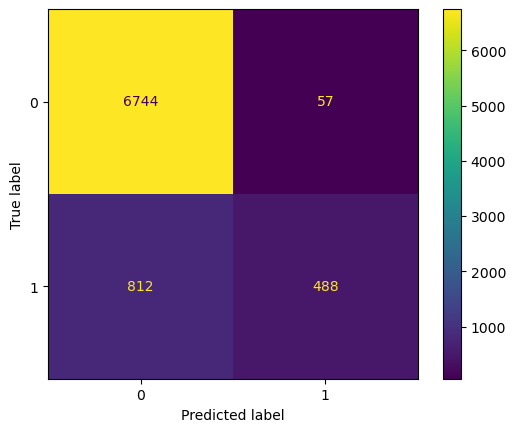

Train Precision Score for KNN(None):  0.8954128440366973
Train Recall Score for KNN(None)  0.37538461538461537
Train F1 Score for KNN(None)  0.5289972899728997
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      6801
           1       0.90      0.38      0.53      1300

    accuracy                           0.89      8101
   macro avg       0.89      0.68      0.73      8101
weighted avg       0.89      0.89      0.87      8101



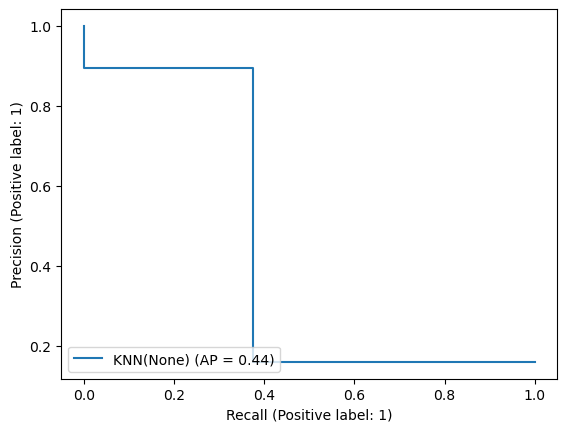

Metrics Regarding Test Data:


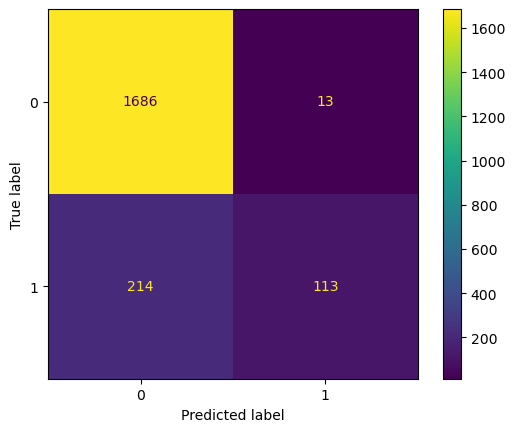

Test Precision Score for KNN(None):  0.8968253968253969
Test Recall Score for KNN(None):  0.345565749235474
Test F1 Score for KNN(None):  0.4988962472406181
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1699
           1       0.90      0.35      0.50       327

    accuracy                           0.89      2026
   macro avg       0.89      0.67      0.72      2026
weighted avg       0.89      0.89      0.87      2026



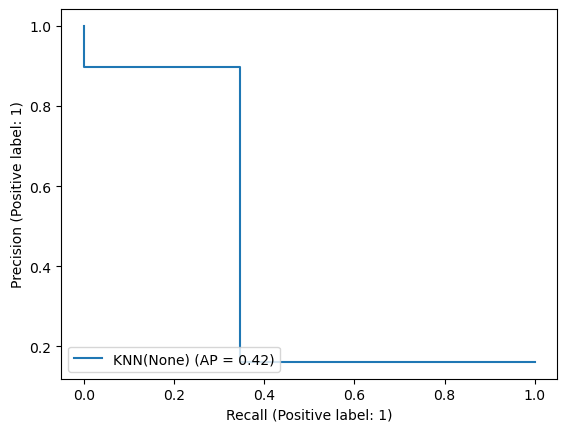

In [95]:
knn_new = knn(n_neighbors=m.ceil((len(pred_std_train))**(1/2)))
algorithm = knn_new.fit(pred_std_train, tar_std_train)
metricDisplay(models[0], sampling[3], algorithm, pred_std_test, tar_std_test, pred_std_train, tar_std_train)

#### Random Over-Sampling

Metrics Regarding Training Data:


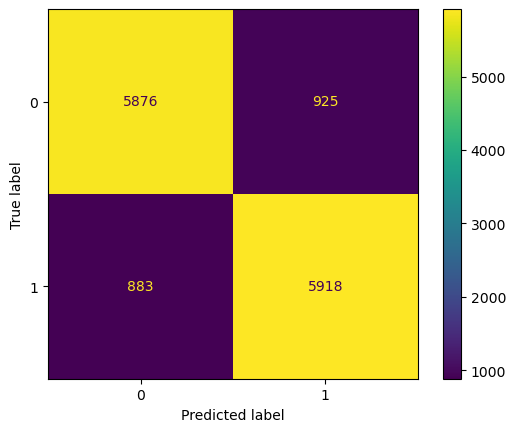

Train Precision Score for KNN(Oversampling):  0.864825368990209
Train Recall Score for KNN(Oversampling)  0.8701661520364652
Train F1 Score for KNN(Oversampling)  0.8674875403107593
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      6801
           1       0.86      0.87      0.87      6801

    accuracy                           0.87     13602
   macro avg       0.87      0.87      0.87     13602
weighted avg       0.87      0.87      0.87     13602



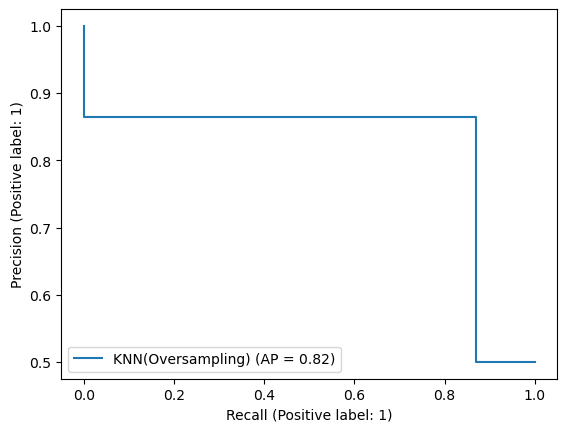

Metrics Regarding Test Data:


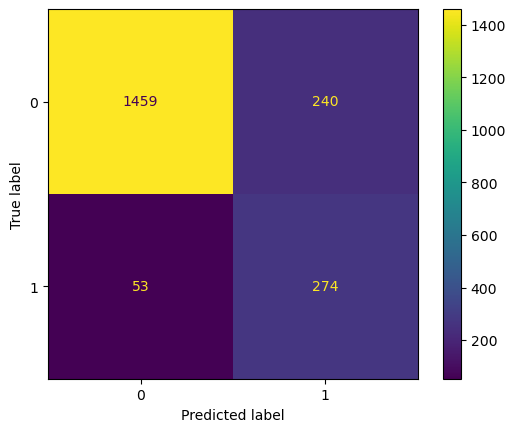

Test Precision Score for KNN(Oversampling):  0.5330739299610895
Test Recall Score for KNN(Oversampling):  0.8379204892966361
Test F1 Score for KNN(Oversampling):  0.6516052318668253
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      1699
           1       0.53      0.84      0.65       327

    accuracy                           0.86      2026
   macro avg       0.75      0.85      0.78      2026
weighted avg       0.90      0.86      0.87      2026



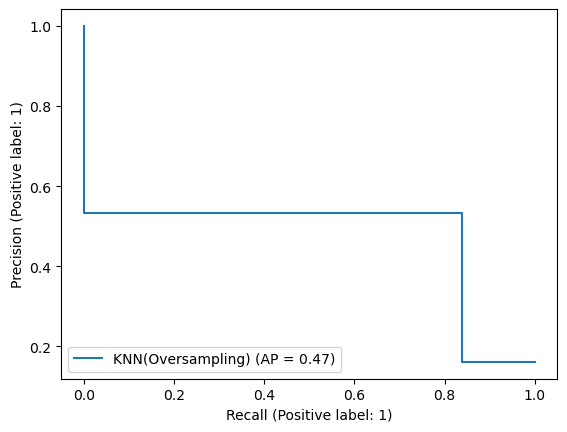

In [96]:
knn_new = knn(n_neighbors=m.ceil((len(X_ros_std))**(1/2)))
algorithm = knn_new.fit(X_ros_std, y_ros_std)
metricDisplay(models[0], sampling[0], algorithm, pred_std_test, tar_std_test, X_ros_std, y_ros_std)

#### SMOTE

Metrics Regarding Training Data:


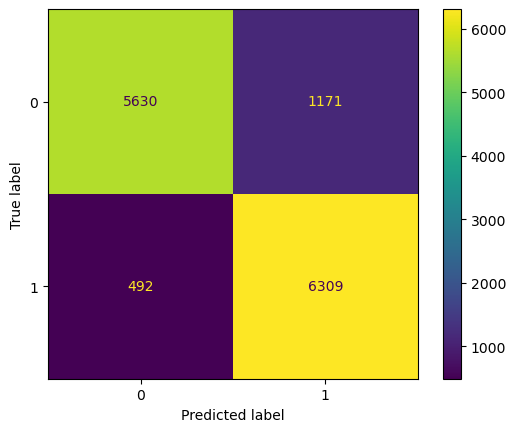

Train Precision Score for KNN(SMOTE):  0.8434491978609626
Train Recall Score for KNN(SMOTE)  0.9276576973974415
Train F1 Score for KNN(SMOTE)  0.8835515720187662
              precision    recall  f1-score   support

           0       0.92      0.83      0.87      6801
           1       0.84      0.93      0.88      6801

    accuracy                           0.88     13602
   macro avg       0.88      0.88      0.88     13602
weighted avg       0.88      0.88      0.88     13602



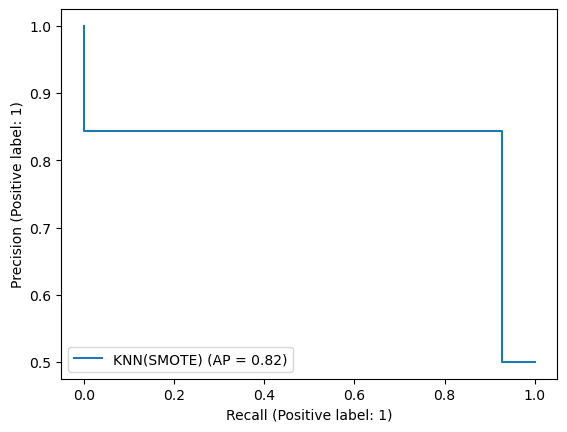

Metrics Regarding Test Data:


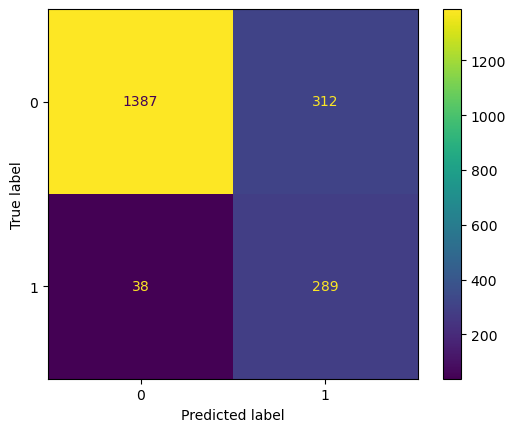

Test Precision Score for KNN(SMOTE):  0.480865224625624
Test Recall Score for KNN(SMOTE):  0.8837920489296636
Test F1 Score for KNN(SMOTE):  0.622844827586207
              precision    recall  f1-score   support

           0       0.97      0.82      0.89      1699
           1       0.48      0.88      0.62       327

    accuracy                           0.83      2026
   macro avg       0.73      0.85      0.76      2026
weighted avg       0.89      0.83      0.85      2026



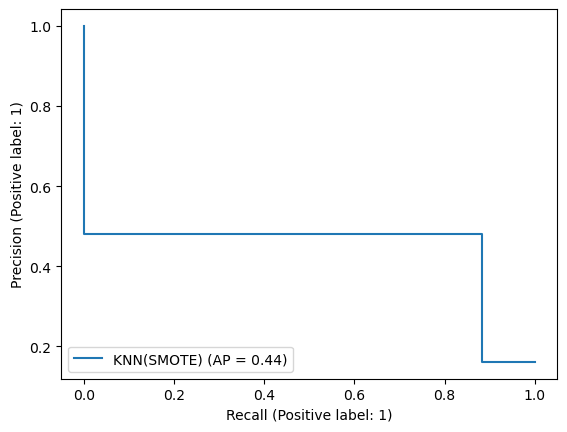

In [97]:
knn_new = knn(n_neighbors=m.ceil((len(X_smote_std))**(1/2)))
algorithm = knn_new.fit(X_smote_std, y_smote_std)
metricDisplay(models[0], sampling[1], algorithm, pred_std_test, tar_std_test, X_smote_std, y_smote_std)

#### Random Under-Sampling

Metrics Regarding Training Data:


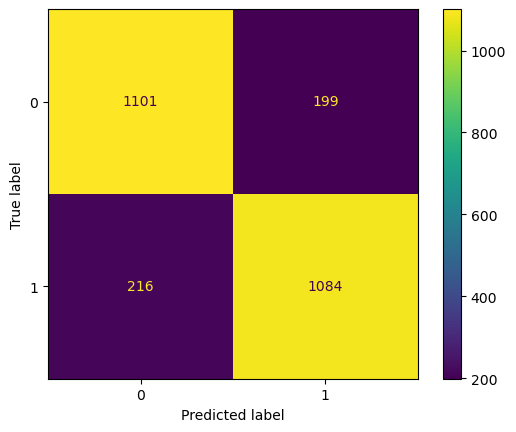

Train Precision Score for KNN(Undersampling):  0.8448947778643804
Train Recall Score for KNN(Undersampling)  0.8338461538461538
Train F1 Score for KNN(Undersampling)  0.8393341076267906
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1300
           1       0.84      0.83      0.84      1300

    accuracy                           0.84      2600
   macro avg       0.84      0.84      0.84      2600
weighted avg       0.84      0.84      0.84      2600



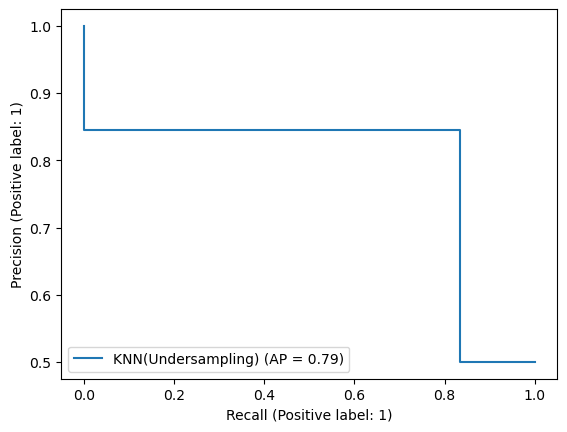

Metrics Regarding Test Data:


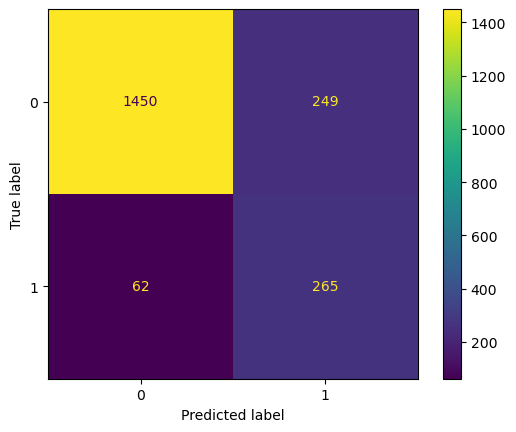

Test Precision Score for KNN(Undersampling):  0.5155642023346303
Test Recall Score for KNN(Undersampling):  0.8103975535168195
Test F1 Score for KNN(Undersampling):  0.6302021403091557
              precision    recall  f1-score   support

           0       0.96      0.85      0.90      1699
           1       0.52      0.81      0.63       327

    accuracy                           0.85      2026
   macro avg       0.74      0.83      0.77      2026
weighted avg       0.89      0.85      0.86      2026



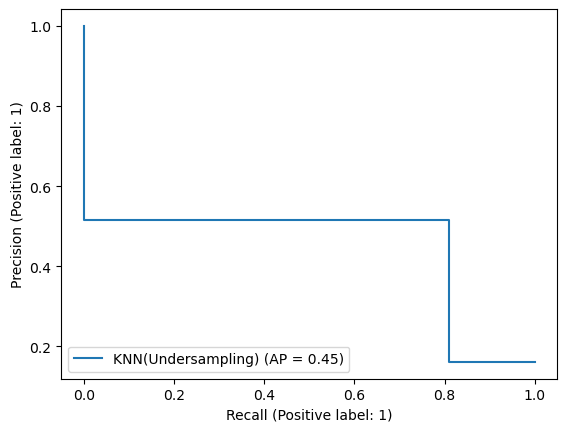

In [98]:
knn_new = knn(n_neighbors=m.ceil((len(X_rus_std))**(1/2)))
algorithm = knn_new.fit(X_rus_std, y_rus_std)
metricDisplay(models[0], sampling[2], algorithm, pred_std_test, tar_std_test, X_rus_std, y_rus_std)

### SGD

#### Base

Metrics Regarding Training Data:


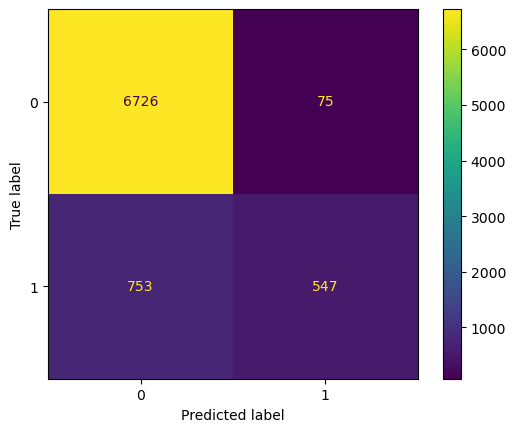

Train Precision Score for SGD(None):  0.8794212218649518
Train Recall Score for SGD(None)  0.4207692307692308
Train F1 Score for SGD(None)  0.5691987513007284
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      6801
           1       0.88      0.42      0.57      1300

    accuracy                           0.90      8101
   macro avg       0.89      0.70      0.76      8101
weighted avg       0.90      0.90      0.88      8101



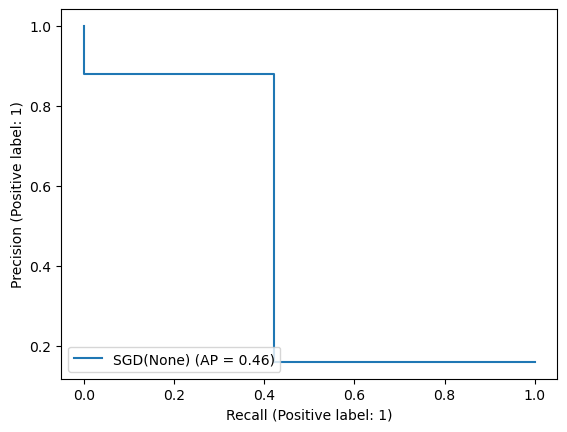

Metrics Regarding Test Data:


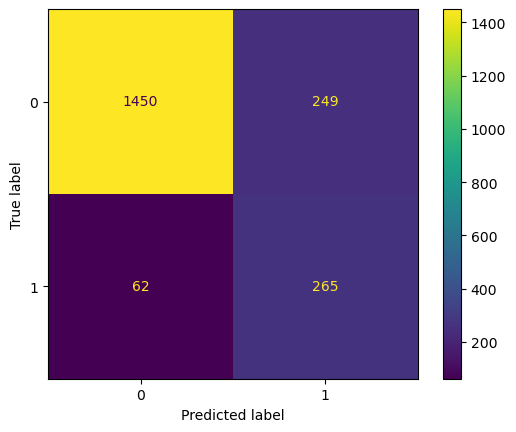

Test Precision Score for SGD(None):  0.5155642023346303
Test Recall Score for SGD(None):  0.8103975535168195
Test F1 Score for SGD(None):  0.6302021403091557
              precision    recall  f1-score   support

           0       0.96      0.85      0.90      1699
           1       0.52      0.81      0.63       327

    accuracy                           0.85      2026
   macro avg       0.74      0.83      0.77      2026
weighted avg       0.89      0.85      0.86      2026



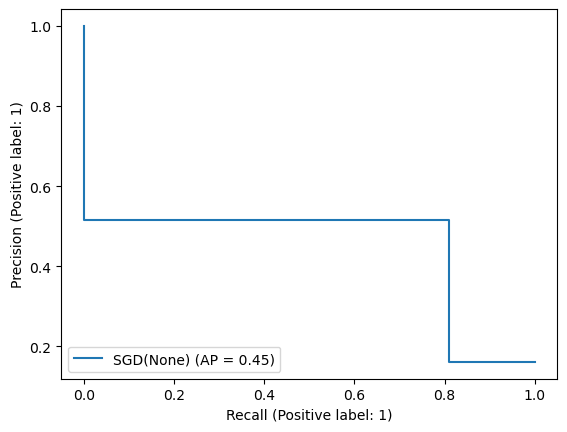

In [99]:
sgd_clf_over = sgd(random_state = 42) 
sgd_clf_over.fit(pred_std_train, tar_std_train)
metricDisplay(models[1], sampling[3], algorithm, pred_std_test, tar_std_test, pred_std_train, tar_std_train)

#### Random Over-Sampling

Metrics Regarding Training Data:


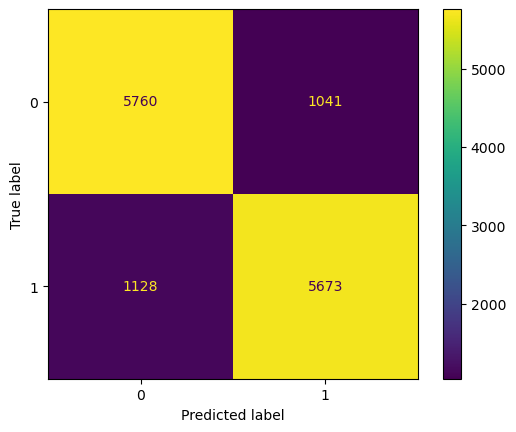

Train Precision Score for SGD(Oversampling):  0.8449508489722967
Train Recall Score for SGD(Oversampling)  0.8341420379355977
Train F1 Score for SGD(Oversampling)  0.839511653718091
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      6801
           1       0.84      0.83      0.84      6801

    accuracy                           0.84     13602
   macro avg       0.84      0.84      0.84     13602
weighted avg       0.84      0.84      0.84     13602



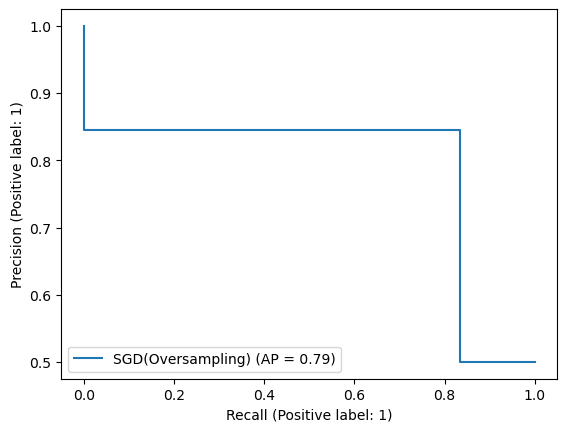

Metrics Regarding Test Data:


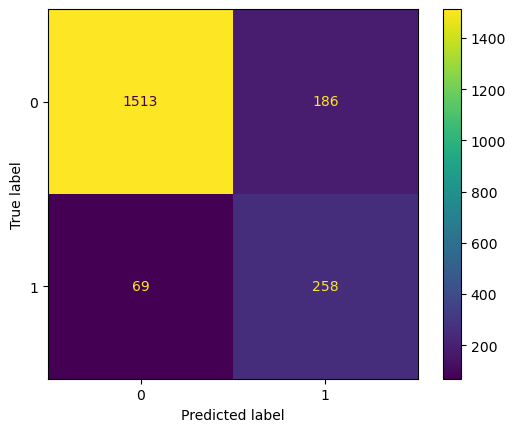

Test Precision Score for SGD(Oversampling):  0.581081081081081
Test Recall Score for SGD(Oversampling):  0.7889908256880734
Test F1 Score for SGD(Oversampling):  0.669260700389105
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      1699
           1       0.58      0.79      0.67       327

    accuracy                           0.87      2026
   macro avg       0.77      0.84      0.80      2026
weighted avg       0.90      0.87      0.88      2026



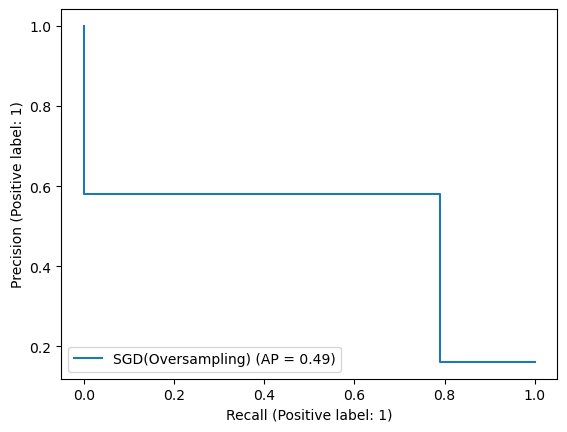

In [100]:
sgd_clf_over = sgd(random_state = 42) 
algorithm = sgd_clf_over.fit(X_ros_std, y_ros_std)
metricDisplay(models[1], sampling[0], algorithm, pred_std_test, tar_std_test, X_ros_std, y_ros_std)

#### SMOTE

Metrics Regarding Training Data:


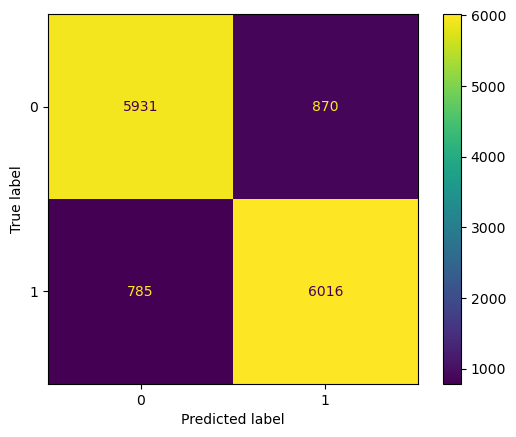

Train Precision Score for SGD(SMOTE):  0.8736566947429567
Train Recall Score for SGD(SMOTE)  0.8845757976768123
Train F1 Score for SGD(SMOTE)  0.8790823409074304
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      6801
           1       0.87      0.88      0.88      6801

    accuracy                           0.88     13602
   macro avg       0.88      0.88      0.88     13602
weighted avg       0.88      0.88      0.88     13602



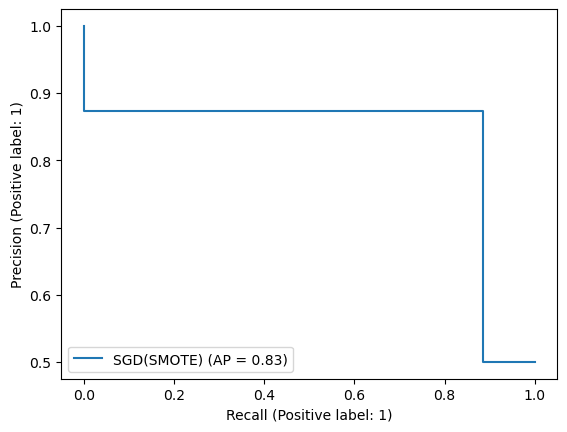

Metrics Regarding Test Data:


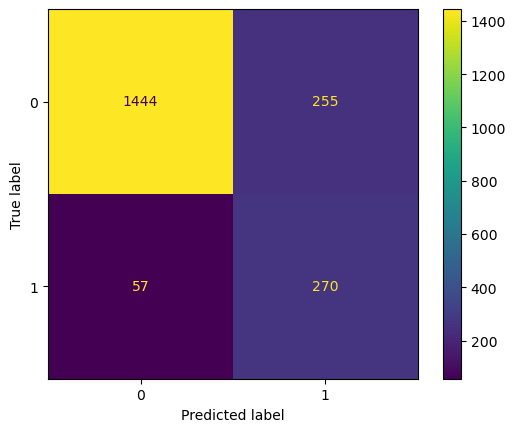

Test Precision Score for SGD(SMOTE):  0.5142857142857142
Test Recall Score for SGD(SMOTE):  0.8256880733944955
Test F1 Score for SGD(SMOTE):  0.6338028169014085
              precision    recall  f1-score   support

           0       0.96      0.85      0.90      1699
           1       0.51      0.83      0.63       327

    accuracy                           0.85      2026
   macro avg       0.74      0.84      0.77      2026
weighted avg       0.89      0.85      0.86      2026



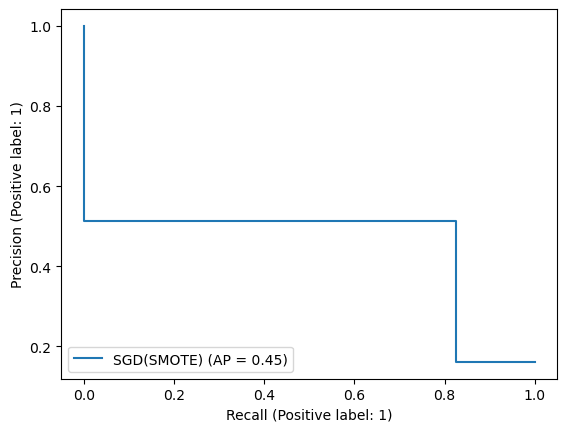

In [101]:
sgd_clf_over = sgd(random_state = 42) 
algorithm = sgd_clf_over.fit(X_smote_std, y_smote_std)
metricDisplay(models[1], sampling[1], algorithm, pred_std_test, tar_std_test, X_smote_std, y_smote_std)

#### Random Under-Sampling

Metrics Regarding Training Data:


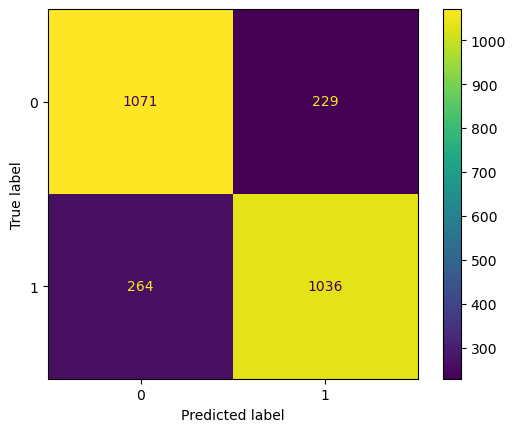

Train Precision Score for SGD(Undersampling):  0.8189723320158103
Train Recall Score for SGD(Undersampling)  0.796923076923077
Train F1 Score for SGD(Undersampling)  0.8077972709551656
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1300
           1       0.82      0.80      0.81      1300

    accuracy                           0.81      2600
   macro avg       0.81      0.81      0.81      2600
weighted avg       0.81      0.81      0.81      2600



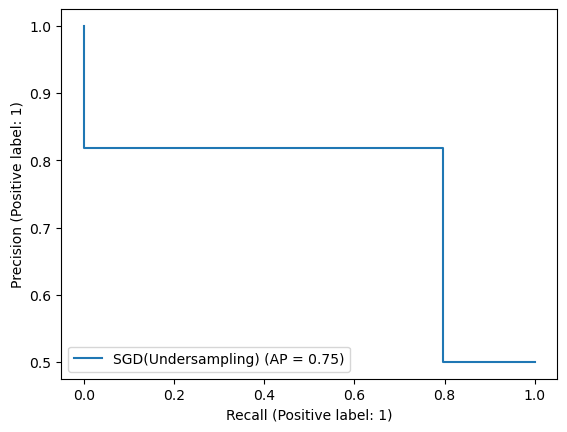

Metrics Regarding Test Data:


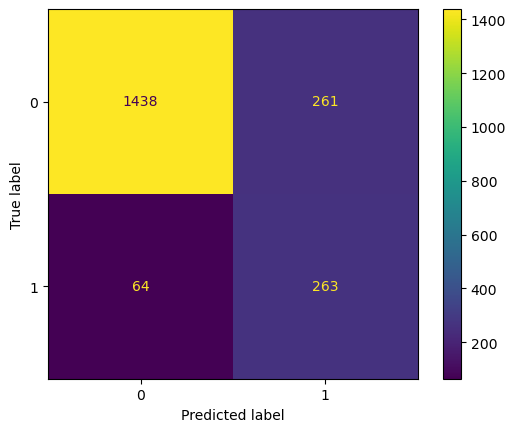

Test Precision Score for SGD(Undersampling):  0.5019083969465649
Test Recall Score for SGD(Undersampling):  0.8042813455657493
Test F1 Score for SGD(Undersampling):  0.618096357226792
              precision    recall  f1-score   support

           0       0.96      0.85      0.90      1699
           1       0.50      0.80      0.62       327

    accuracy                           0.84      2026
   macro avg       0.73      0.83      0.76      2026
weighted avg       0.88      0.84      0.85      2026



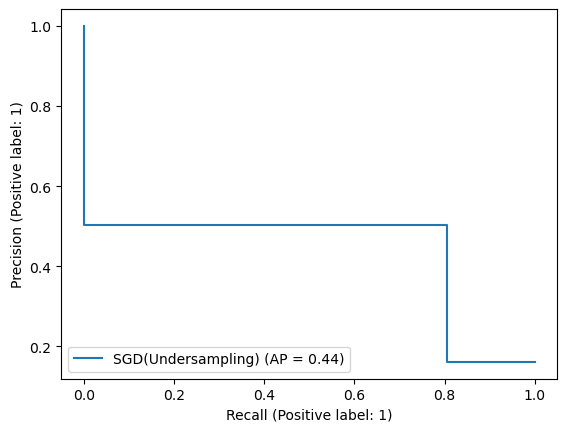

In [102]:
sgd_clf_over = sgd(random_state = 42) 
algorithm = sgd_clf_over.fit(X_rus_std, y_rus_std)
metricDisplay(models[1], sampling[2], algorithm, pred_std_test, tar_std_test, X_rus_std, y_rus_std)

### Decision Tree

## Non standardized, base 

Metrics Regarding Training Data:


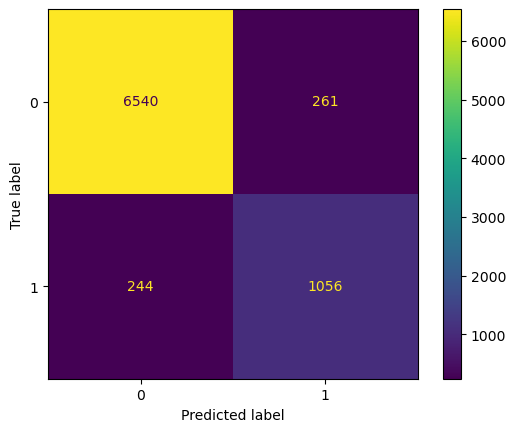

Train Precision Score for Decision Tree(None):  0.8018223234624146
Train Recall Score for Decision Tree(None)  0.8123076923076923
Train F1 Score for Decision Tree(None)  0.8070309514711502
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      6801
           1       0.80      0.81      0.81      1300

    accuracy                           0.94      8101
   macro avg       0.88      0.89      0.88      8101
weighted avg       0.94      0.94      0.94      8101



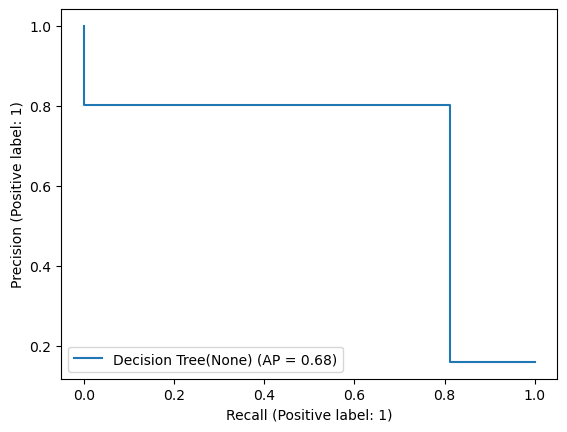

Metrics Regarding Test Data:


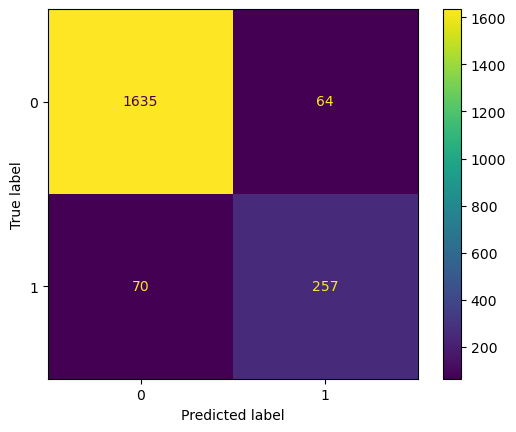

Test Precision Score for Decision Tree(None):  0.8006230529595015
Test Recall Score for Decision Tree(None):  0.7859327217125383
Test F1 Score for Decision Tree(None):  0.79320987654321
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1699
           1       0.80      0.79      0.79       327

    accuracy                           0.93      2026
   macro avg       0.88      0.87      0.88      2026
weighted avg       0.93      0.93      0.93      2026



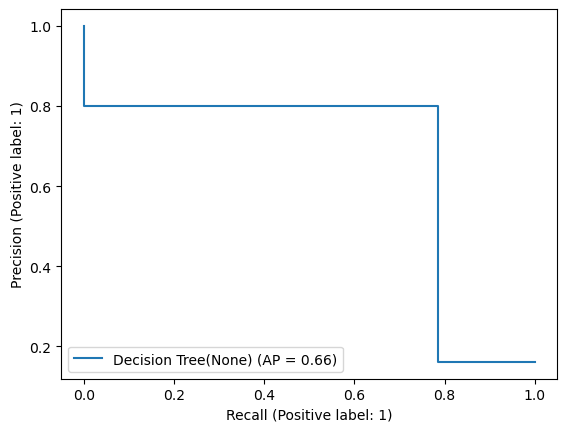

In [103]:
tree_clf_over = DecisionTreeClassifier(random_state=42)
algorithm = tree_clf_over.fit(pred_non_std_train, tar_non_std_train)
metricDisplay(models[2], sampling[3], algorithm, pred_non_std_test, tar_non_std_test, pred_non_std_train, tar_non_std_train, True)

#### Base

Metrics Regarding Training Data:


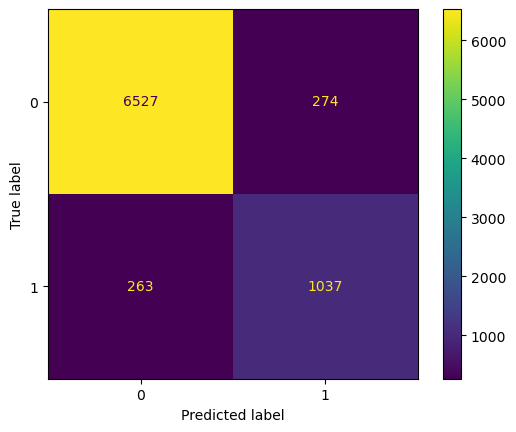

Train Precision Score for Decision Tree(None):  0.7909992372234935
Train Recall Score for Decision Tree(None)  0.7976923076923077
Train F1 Score for Decision Tree(None)  0.7943316736882421
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      6801
           1       0.79      0.80      0.79      1300

    accuracy                           0.93      8101
   macro avg       0.88      0.88      0.88      8101
weighted avg       0.93      0.93      0.93      8101



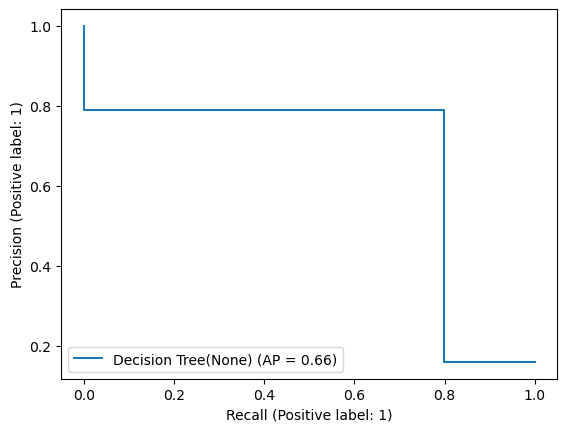

Metrics Regarding Test Data:


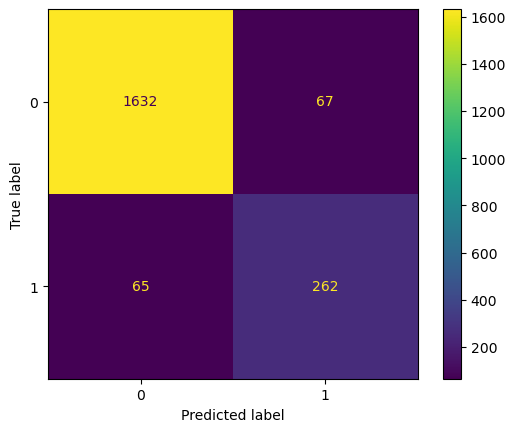

Test Precision Score for Decision Tree(None):  0.7963525835866262
Test Recall Score for Decision Tree(None):  0.8012232415902141
Test F1 Score for Decision Tree(None):  0.7987804878048782
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1699
           1       0.80      0.80      0.80       327

    accuracy                           0.93      2026
   macro avg       0.88      0.88      0.88      2026
weighted avg       0.94      0.93      0.93      2026



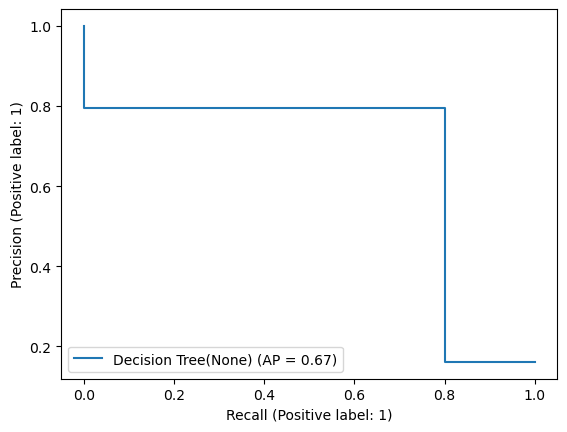

In [104]:
tree_clf_over = DecisionTreeClassifier(random_state=42)
algorithm = tree_clf_over.fit(pred_std_train, tar_std_train)
metricDisplay(models[2], sampling[3], algorithm, pred_std_test, tar_std_test, pred_std_train, tar_std_train)

#### Random Over-Sampling

Metrics Regarding Training Data:


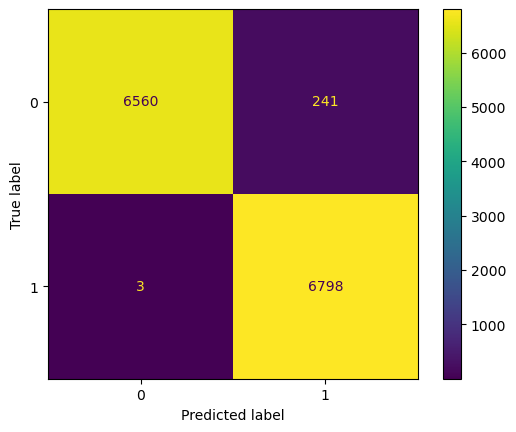

Train Precision Score for Decision Tree(Oversampling):  0.9657621821281432
Train Recall Score for Decision Tree(Oversampling)  0.9995588883987648
Train F1 Score for Decision Tree(Oversampling)  0.9823699421965317
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      6801
           1       0.97      1.00      0.98      6801

    accuracy                           0.98     13602
   macro avg       0.98      0.98      0.98     13602
weighted avg       0.98      0.98      0.98     13602



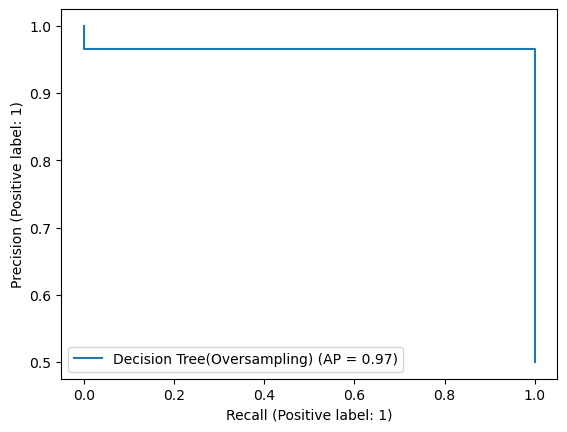

Metrics Regarding Test Data:


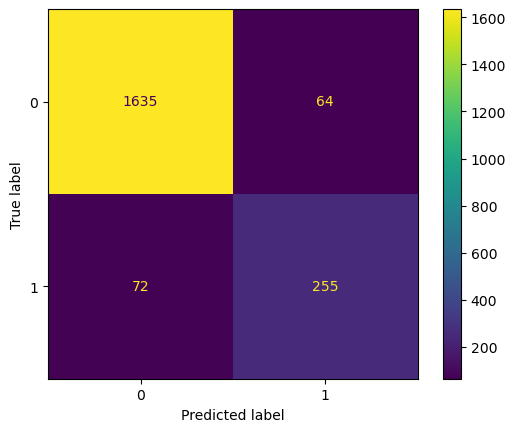

Test Precision Score for Decision Tree(Oversampling):  0.799373040752351
Test Recall Score for Decision Tree(Oversampling):  0.7798165137614679
Test F1 Score for Decision Tree(Oversampling):  0.7894736842105263
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1699
           1       0.80      0.78      0.79       327

    accuracy                           0.93      2026
   macro avg       0.88      0.87      0.87      2026
weighted avg       0.93      0.93      0.93      2026



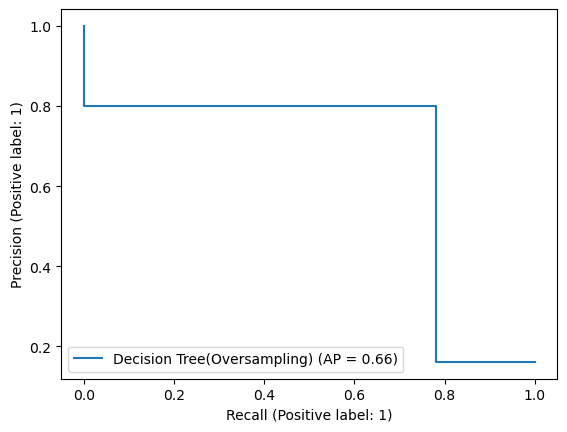

In [105]:
tree_clf_over = DecisionTreeClassifier(random_state=42)
algorithm = tree_clf_over.fit(X_ros_std, y_ros_std)
metricDisplay(models[2], sampling[0], algorithm, pred_std_test, tar_std_test, X_ros_std, y_ros_std)

#### SMOTE

Metrics Regarding Training Data:


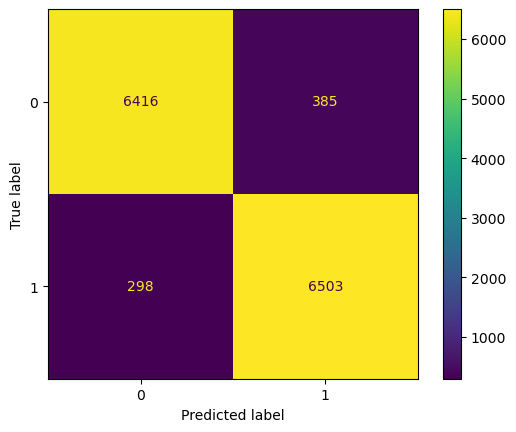

Train Precision Score for Decision Tree(SMOTE):  0.9441056910569106
Train Recall Score for Decision Tree(SMOTE)  0.9561829142773122
Train F1 Score for Decision Tree(SMOTE)  0.9501059244648988
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      6801
           1       0.94      0.96      0.95      6801

    accuracy                           0.95     13602
   macro avg       0.95      0.95      0.95     13602
weighted avg       0.95      0.95      0.95     13602



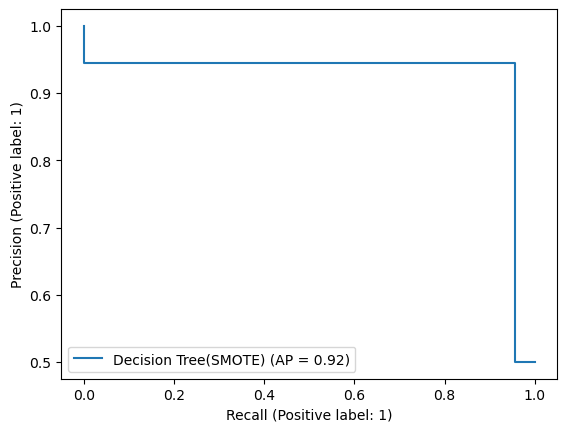

Metrics Regarding Test Data:


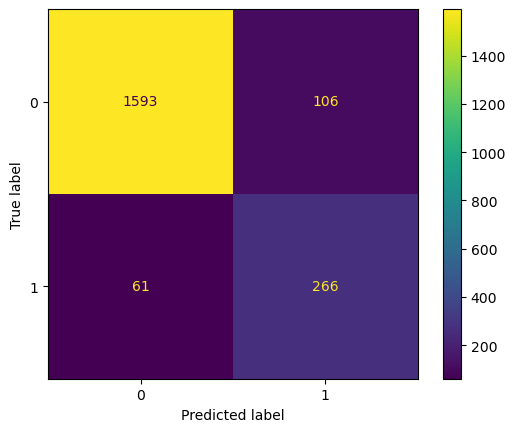

Test Precision Score for Decision Tree(SMOTE):  0.7150537634408602
Test Recall Score for Decision Tree(SMOTE):  0.8134556574923547
Test F1 Score for Decision Tree(SMOTE):  0.7610872675250356
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1699
           1       0.72      0.81      0.76       327

    accuracy                           0.92      2026
   macro avg       0.84      0.88      0.86      2026
weighted avg       0.92      0.92      0.92      2026



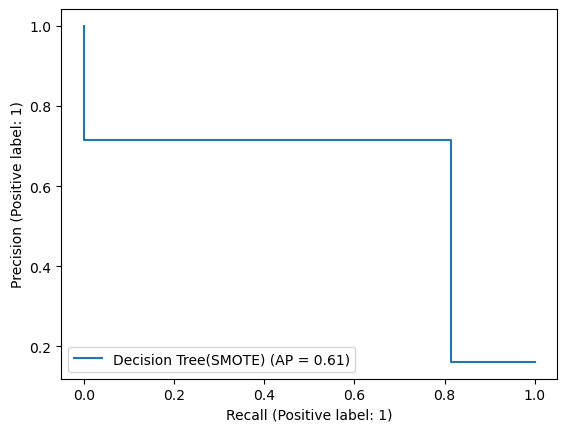

In [106]:
tree_clf_over = DecisionTreeClassifier(random_state=42)
algorithm = tree_clf_over.fit(X_smote_std, y_smote_std)
metricDisplay(models[2], sampling[1], algorithm, pred_std_test, tar_std_test, X_smote_std, y_smote_std)

#### Random Under-Sampling

Metrics Regarding Training Data:


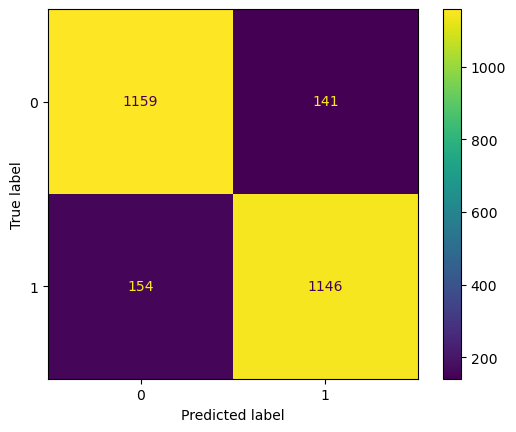

Train Precision Score for Decision Tree(Undersampling):  0.8904428904428905
Train Recall Score for Decision Tree(Undersampling)  0.8815384615384615
Train F1 Score for Decision Tree(Undersampling)  0.8859683030537302
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      1300
           1       0.89      0.88      0.89      1300

    accuracy                           0.89      2600
   macro avg       0.89      0.89      0.89      2600
weighted avg       0.89      0.89      0.89      2600



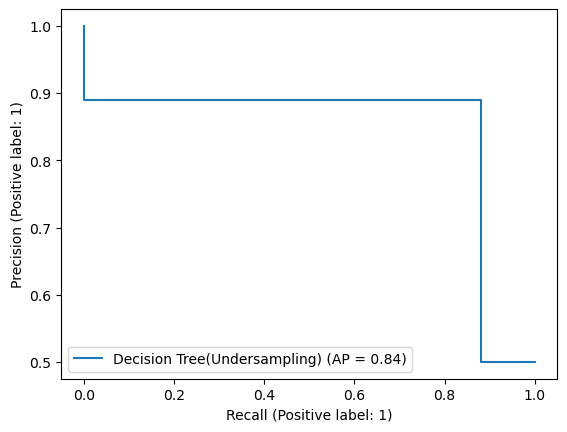

Metrics Regarding Test Data:


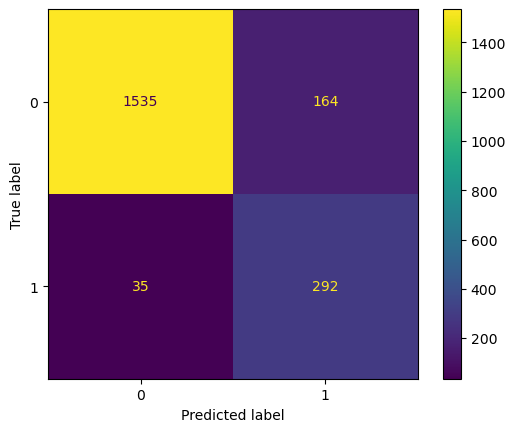

Test Precision Score for Decision Tree(Undersampling):  0.6403508771929824
Test Recall Score for Decision Tree(Undersampling):  0.8929663608562691
Test F1 Score for Decision Tree(Undersampling):  0.7458492975734355
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      1699
           1       0.64      0.89      0.75       327

    accuracy                           0.90      2026
   macro avg       0.81      0.90      0.84      2026
weighted avg       0.92      0.90      0.91      2026



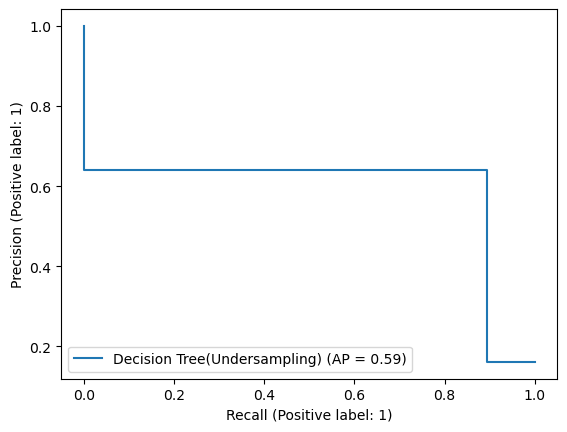

In [107]:
tree_clf_over = DecisionTreeClassifier(random_state=42)
algorithm = tree_clf_over.fit(X_rus_std, y_rus_std)
metricDisplay(models[2], sampling[2], algorithm, pred_std_test, tar_std_test, X_rus_std, y_rus_std)

## Random Forests

#### Base

Metrics Regarding Training Data:


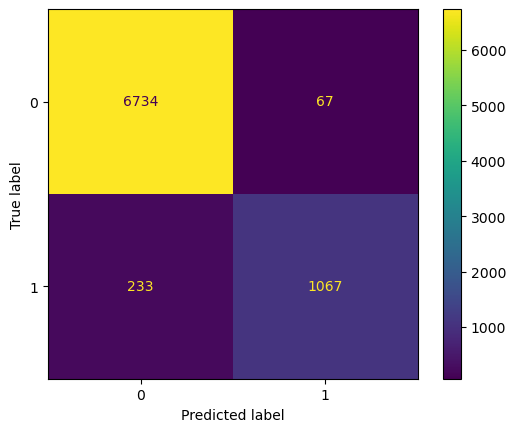

Train Precision Score for Random Forests(None):  0.9409171075837742
Train Recall Score for Random Forests(None)  0.8207692307692308
Train F1 Score for Random Forests(None)  0.876746096959737
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      6801
           1       0.94      0.82      0.88      1300

    accuracy                           0.96      8101
   macro avg       0.95      0.91      0.93      8101
weighted avg       0.96      0.96      0.96      8101



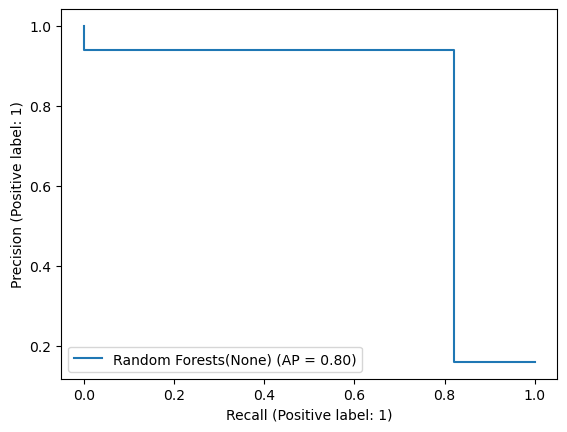

Metrics Regarding Test Data:


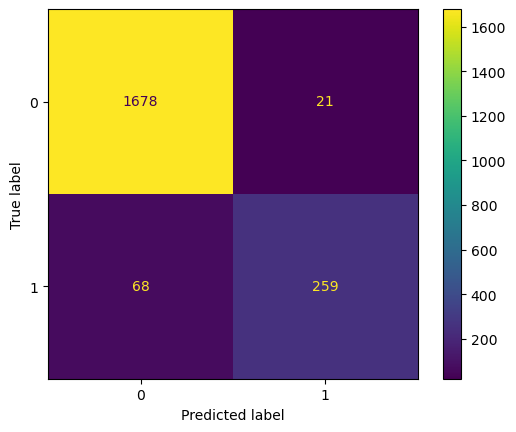

Test Precision Score for Random Forests(None):  0.925
Test Recall Score for Random Forests(None):  0.7920489296636085
Test F1 Score for Random Forests(None):  0.8533772652388798
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1699
           1       0.93      0.79      0.85       327

    accuracy                           0.96      2026
   macro avg       0.94      0.89      0.91      2026
weighted avg       0.96      0.96      0.95      2026



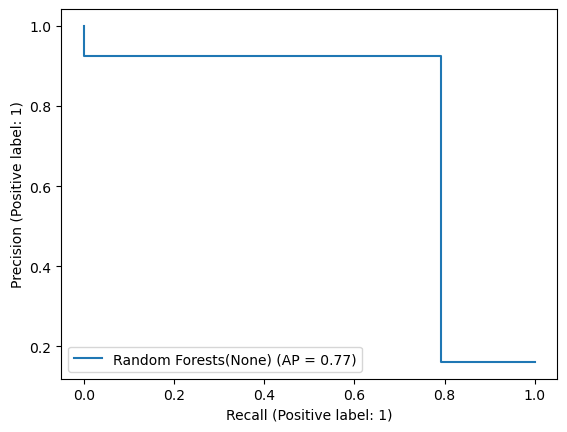

In [108]:
rnd_clf_base = RandomForestClassifier(random_state=42)
algorithm = rnd_clf_base.fit(pred_std_train, tar_std_train)
metricDisplay(models[3], sampling[3], algorithm, pred_std_test, tar_std_test, pred_std_train, tar_std_train)

#### Random Over-Sampling

Metrics Regarding Training Data:


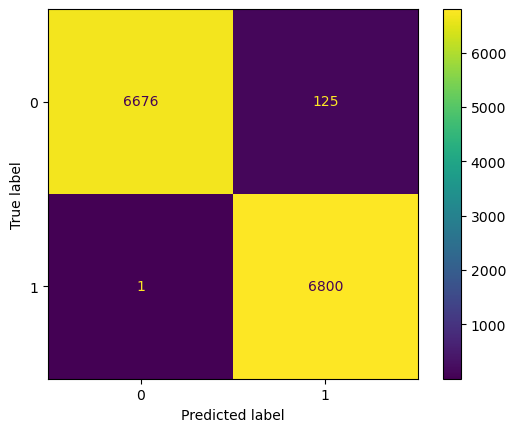

Train Precision Score for Random Forests(Oversampling):  0.9819494584837545
Train Recall Score for Random Forests(Oversampling)  0.9998529627995882
Train F1 Score for Random Forests(Oversampling)  0.9908203409587644
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      6801
           1       0.98      1.00      0.99      6801

    accuracy                           0.99     13602
   macro avg       0.99      0.99      0.99     13602
weighted avg       0.99      0.99      0.99     13602



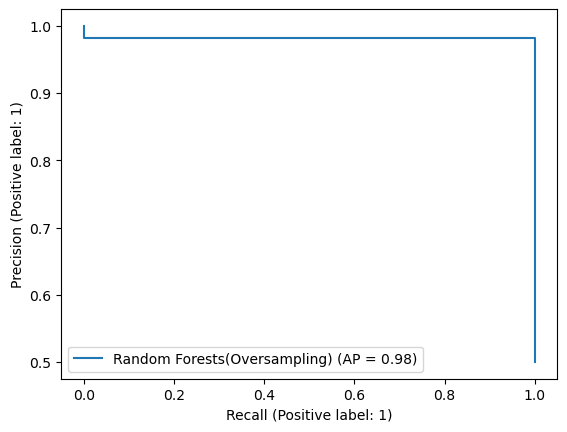

Metrics Regarding Test Data:


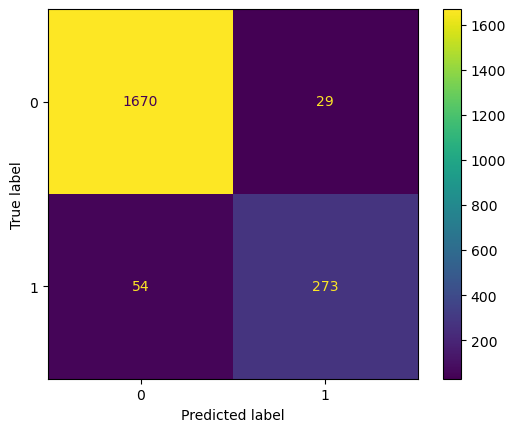

Test Precision Score for Random Forests(Oversampling):  0.9039735099337748
Test Recall Score for Random Forests(Oversampling):  0.8348623853211009
Test F1 Score for Random Forests(Oversampling):  0.8680445151033386
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1699
           1       0.90      0.83      0.87       327

    accuracy                           0.96      2026
   macro avg       0.94      0.91      0.92      2026
weighted avg       0.96      0.96      0.96      2026



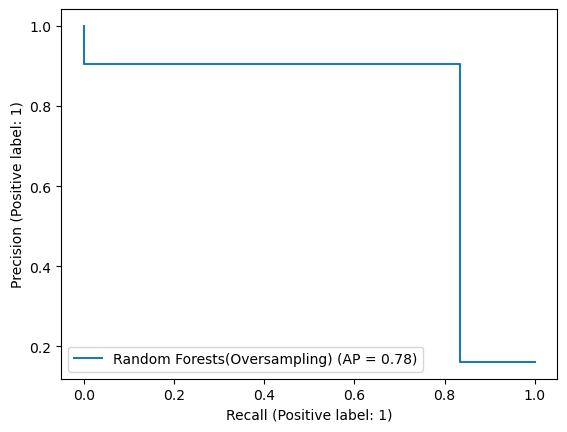

In [109]:
rnd_clf_over = RandomForestClassifier(random_state=42)
rnd_clf_over_fit = algorithm = rnd_clf_over.fit(X_ros_std, y_ros_std)
metricDisplay(models[3], sampling[0], algorithm, pred_std_test, tar_std_test, X_ros_std, y_ros_std)

#### SMOTE

Metrics Regarding Training Data:


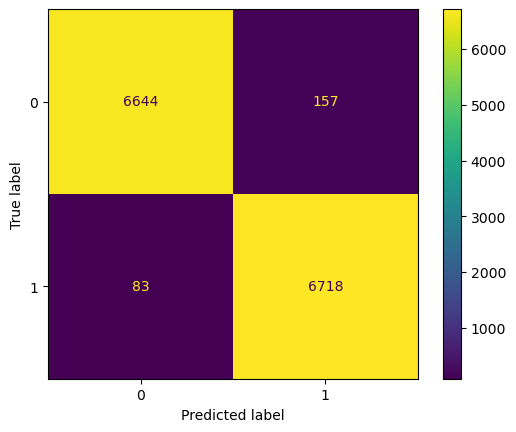

Train Precision Score for Random Forests(SMOTE):  0.9771636363636363
Train Recall Score for Random Forests(SMOTE)  0.9877959123658285
Train F1 Score for Random Forests(SMOTE)  0.9824510090669787
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      6801
           1       0.98      0.99      0.98      6801

    accuracy                           0.98     13602
   macro avg       0.98      0.98      0.98     13602
weighted avg       0.98      0.98      0.98     13602



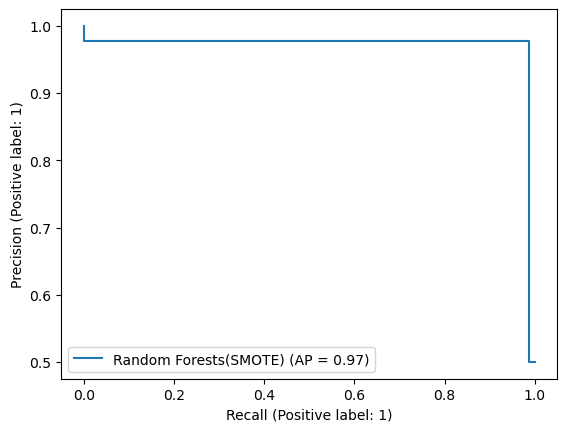

Metrics Regarding Test Data:


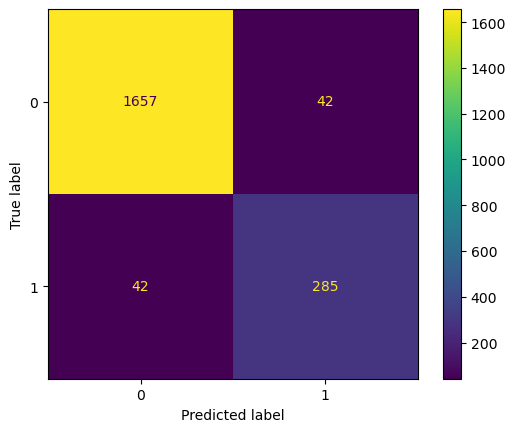

Test Precision Score for Random Forests(SMOTE):  0.8715596330275229
Test Recall Score for Random Forests(SMOTE):  0.8715596330275229
Test F1 Score for Random Forests(SMOTE):  0.8715596330275229
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1699
           1       0.87      0.87      0.87       327

    accuracy                           0.96      2026
   macro avg       0.92      0.92      0.92      2026
weighted avg       0.96      0.96      0.96      2026



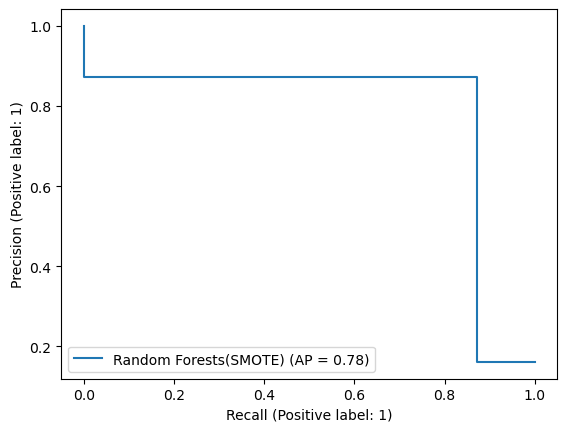

In [110]:
rnd_clf_smote = RandomForestClassifier(random_state=42)
rnd_clf_smote_fit = algorithm = rnd_clf_smote.fit(X_smote_std, y_smote_std)
metricDisplay(models[3], sampling[1], algorithm, pred_std_test, tar_std_test, X_smote_std, y_smote_std)

#### Random Under-Sampling

Metrics Regarding Training Data:


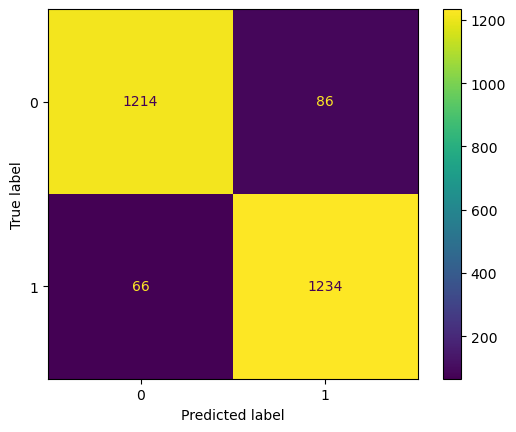

Train Precision Score for Random Forests(Undersampling):  0.9348484848484848
Train Recall Score for Random Forests(Undersampling)  0.9492307692307692
Train F1 Score for Random Forests(Undersampling)  0.9419847328244275
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1300
           1       0.93      0.95      0.94      1300

    accuracy                           0.94      2600
   macro avg       0.94      0.94      0.94      2600
weighted avg       0.94      0.94      0.94      2600



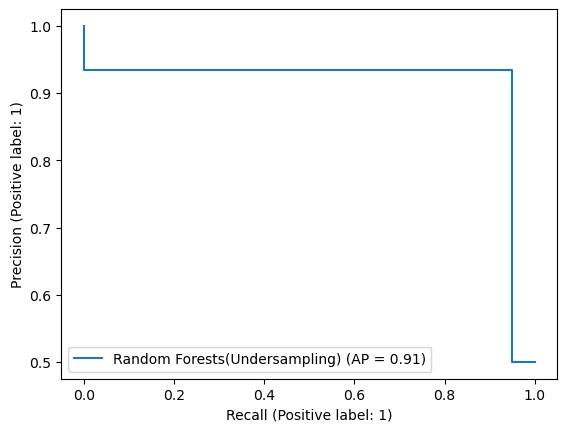

Metrics Regarding Test Data:


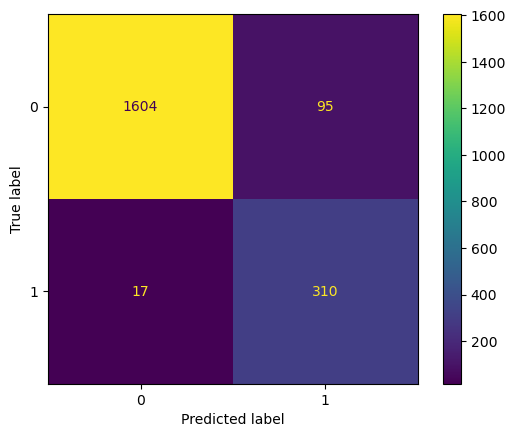

Test Precision Score for Random Forests(Undersampling):  0.7654320987654321
Test Recall Score for Random Forests(Undersampling):  0.9480122324159022
Test F1 Score for Random Forests(Undersampling):  0.8469945355191256
              precision    recall  f1-score   support

           0       0.99      0.94      0.97      1699
           1       0.77      0.95      0.85       327

    accuracy                           0.94      2026
   macro avg       0.88      0.95      0.91      2026
weighted avg       0.95      0.94      0.95      2026



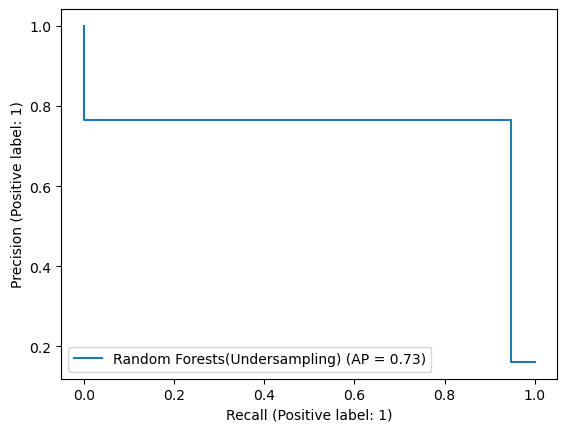

In [111]:
rnd_clf_under = RandomForestClassifier(random_state=42)
rnd_clf_under_fit = algorithm = rnd_clf_under.fit(X_rus_std, y_rus_std)
metricDisplay(models[3], sampling[2], algorithm, pred_std_test, tar_std_test, X_rus_std, y_rus_std)

In general, we see that Random Forests is one of the best classifiers there is on this sort of dataset. This is likely due to the fact it's the only ensemble method for the most part, and it's likely that it's performance comes from that. Also, while the wait for training wasn't all that long, it still wasn't instant.

### SVM

#### Base

Metrics Regarding Training Data:


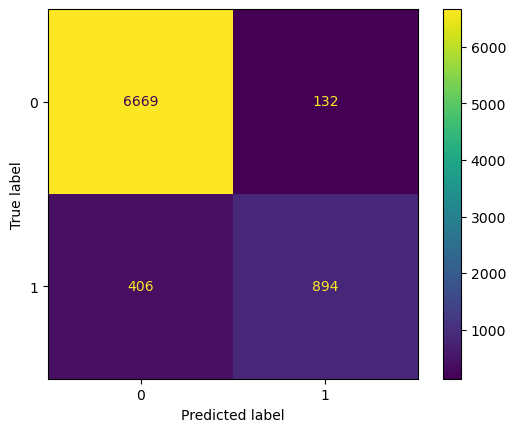

Train Precision Score for SVM(None):  0.8713450292397661
Train Recall Score for SVM(None)  0.6876923076923077
Train F1 Score for SVM(None)  0.7687016337059329
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      6801
           1       0.87      0.69      0.77      1300

    accuracy                           0.93      8101
   macro avg       0.91      0.83      0.86      8101
weighted avg       0.93      0.93      0.93      8101



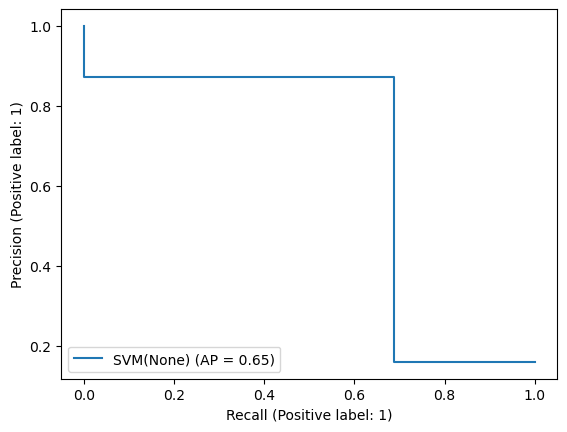

Metrics Regarding Test Data:


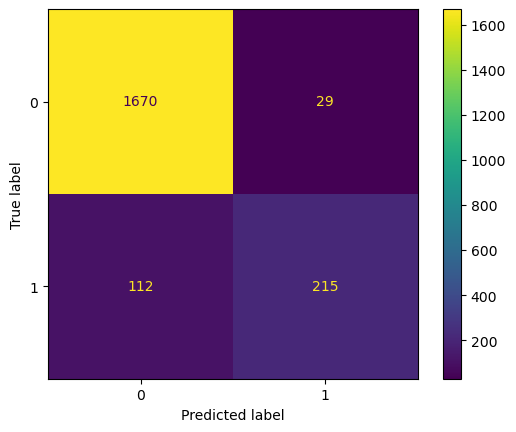

Test Precision Score for SVM(None):  0.8811475409836066
Test Recall Score for SVM(None):  0.6574923547400612
Test F1 Score for SVM(None):  0.7530647985989493
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1699
           1       0.88      0.66      0.75       327

    accuracy                           0.93      2026
   macro avg       0.91      0.82      0.86      2026
weighted avg       0.93      0.93      0.93      2026



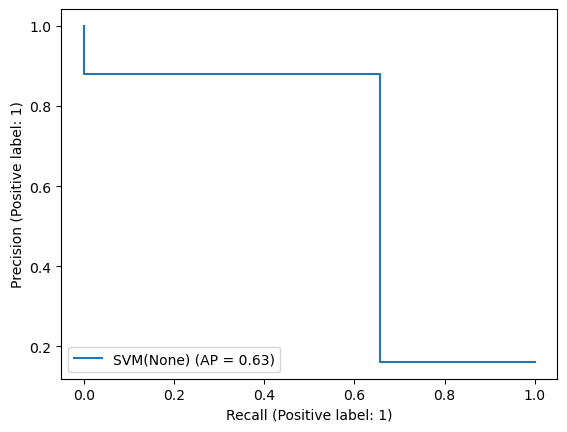

In [112]:
svm_clf_none = svm.SVC(gamma='scale', probability=True)
algorithm = svm_clf_none.fit(pred_std_train, tar_std_train)
metricDisplay(models[4], sampling[3], algorithm, pred_std_test, tar_std_test, pred_std_train, tar_std_train)

#### Random Over-Sampling

Metrics Regarding Training Data:


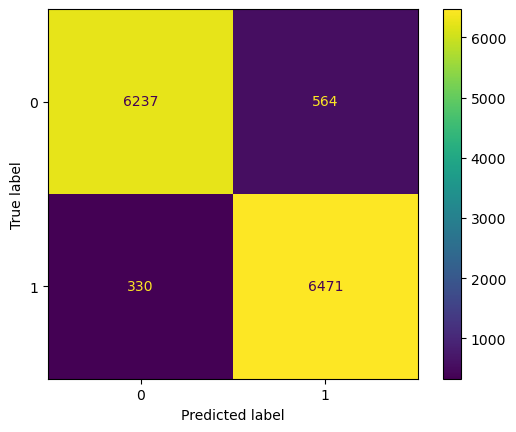

Train Precision Score for SVM(Oversampling):  0.9198294243070363
Train Recall Score for SVM(Oversampling)  0.9514777238641376
Train F1 Score for SVM(Oversampling)  0.9353859496964442
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      6801
           1       0.92      0.95      0.94      6801

    accuracy                           0.93     13602
   macro avg       0.93      0.93      0.93     13602
weighted avg       0.93      0.93      0.93     13602



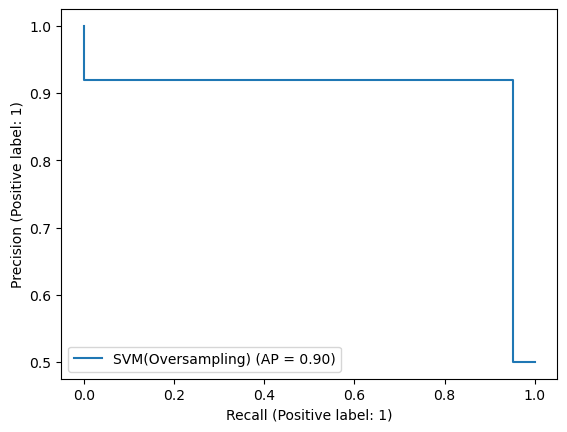

Metrics Regarding Test Data:


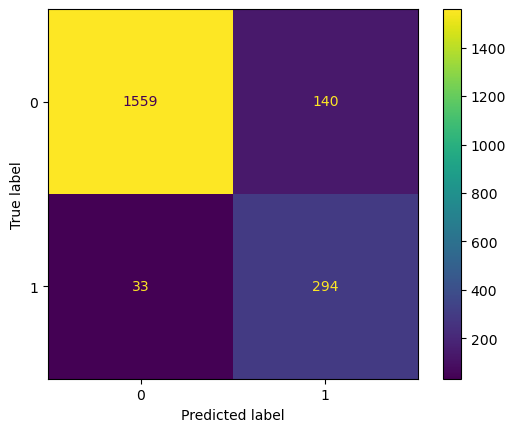

Test Precision Score for SVM(Oversampling):  0.6774193548387096
Test Recall Score for SVM(Oversampling):  0.8990825688073395
Test F1 Score for SVM(Oversampling):  0.7726675427069645
              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1699
           1       0.68      0.90      0.77       327

    accuracy                           0.91      2026
   macro avg       0.83      0.91      0.86      2026
weighted avg       0.93      0.91      0.92      2026



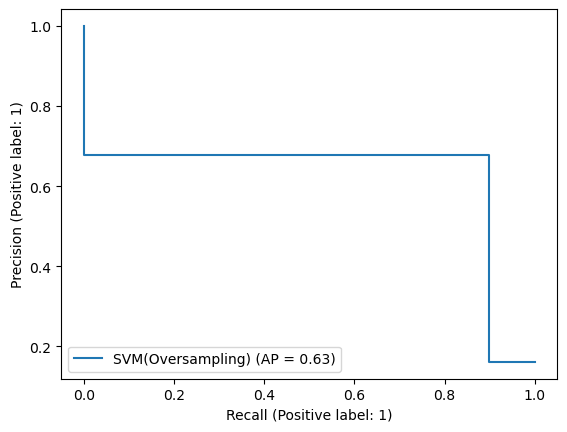

In [113]:
svm_clf_over = svm.SVC(gamma='scale', probability=True)
svm_clf_over_fit= algorithm = svm_clf_over.fit(X_ros_std, y_ros_std)
metricDisplay(models[4], sampling[0], algorithm, pred_std_test, tar_std_test, X_ros_std, y_ros_std)

#### SMOTE

Metrics Regarding Training Data:


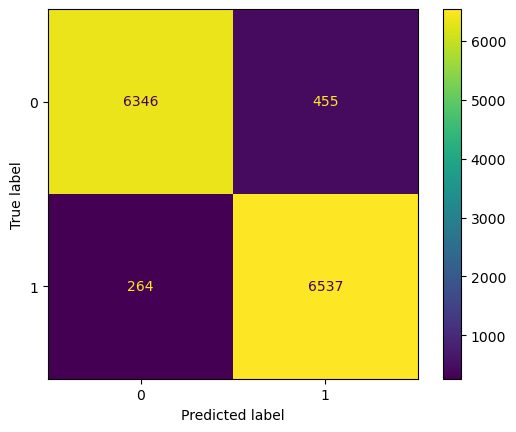

Train Precision Score for SVM(SMOTE):  0.9349256292906178
Train Recall Score for SVM(SMOTE)  0.9611821790913101
Train F1 Score for SVM(SMOTE)  0.9478721090408179
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      6801
           1       0.93      0.96      0.95      6801

    accuracy                           0.95     13602
   macro avg       0.95      0.95      0.95     13602
weighted avg       0.95      0.95      0.95     13602



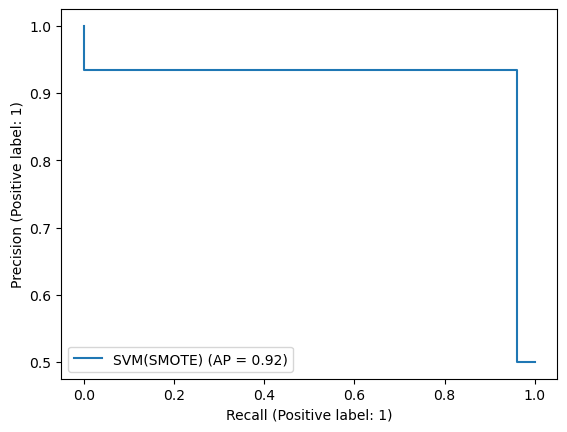

Metrics Regarding Test Data:


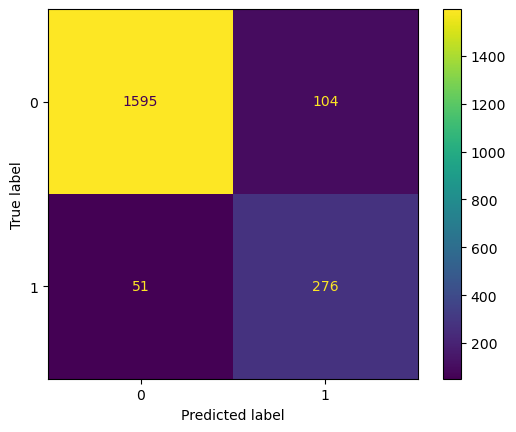

Test Precision Score for SVM(SMOTE):  0.7263157894736842
Test Recall Score for SVM(SMOTE):  0.8440366972477065
Test F1 Score for SVM(SMOTE):  0.7807637906647809
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1699
           1       0.73      0.84      0.78       327

    accuracy                           0.92      2026
   macro avg       0.85      0.89      0.87      2026
weighted avg       0.93      0.92      0.93      2026



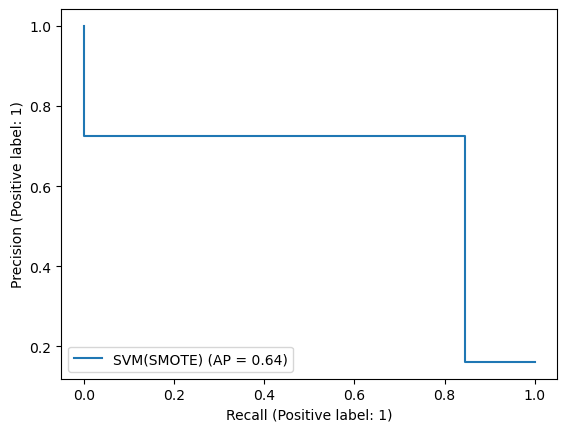

In [114]:
svm_clf_smote = svm.SVC(gamma='scale', probability=True)
svm_clf_smote_fit = algorithm = svm_clf_smote.fit(X_smote_std, y_smote_std)
metricDisplay(models[4], sampling[1], algorithm, pred_std_test, tar_std_test, X_smote_std, y_smote_std)

#### Random Under-Sampling

Metrics Regarding Training Data:


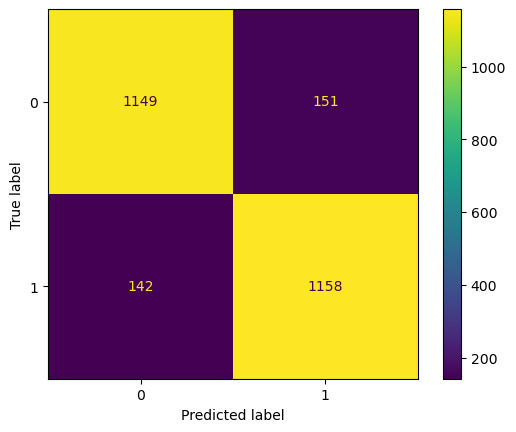

Train Precision Score for SVM(Undersampling):  0.8846447669977082
Train Recall Score for SVM(Undersampling)  0.8907692307692308
Train F1 Score for SVM(Undersampling)  0.8876964354158682
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      1300
           1       0.88      0.89      0.89      1300

    accuracy                           0.89      2600
   macro avg       0.89      0.89      0.89      2600
weighted avg       0.89      0.89      0.89      2600



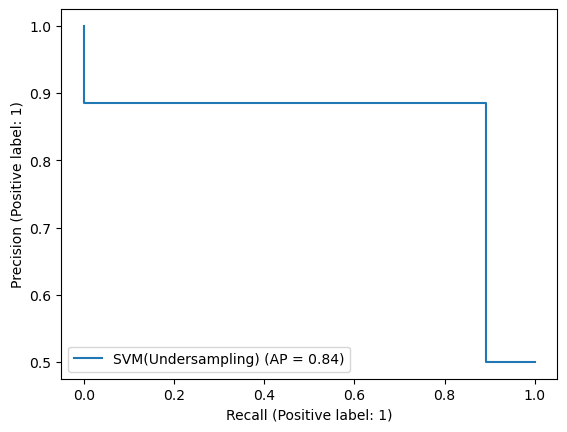

Metrics Regarding Test Data:


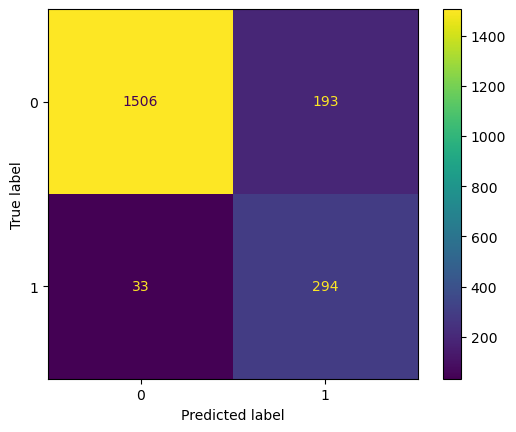

Test Precision Score for SVM(Undersampling):  0.6036960985626283
Test Recall Score for SVM(Undersampling):  0.8990825688073395
Test F1 Score for SVM(Undersampling):  0.7223587223587223
              precision    recall  f1-score   support

           0       0.98      0.89      0.93      1699
           1       0.60      0.90      0.72       327

    accuracy                           0.89      2026
   macro avg       0.79      0.89      0.83      2026
weighted avg       0.92      0.89      0.90      2026



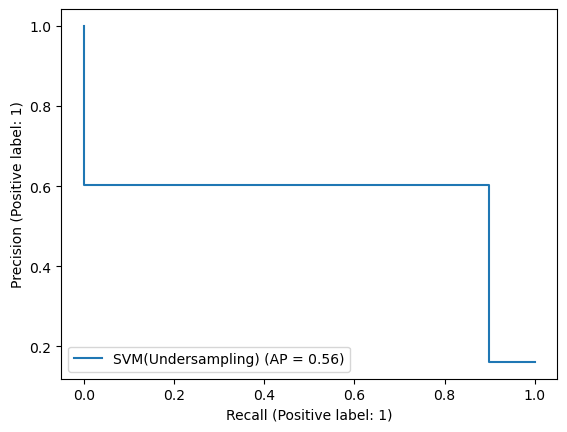

In [115]:
svm_clf_under = svm.SVC(gamma='scale', probability=True)
svm_clf_under_fit = algorithm = svm_clf_under.fit(X_rus_std, y_rus_std)
metricDisplay(models[4], sampling[2], algorithm, pred_std_test, tar_std_test, X_rus_std, y_rus_std)

As seen above, SVM, while good in typically 3/4 out of all categories, still doesn't beat Random Forest, and, is painfully slow, especially in SMOTE(due to the sample size being ~5000/5000 rather than 1000/1000). Still, Oversampling and Undersampling are tied with having the 2nd to best recall.

### Soft Voting Ensemble: Best Recall of all samplers

This model uses three of the best models so far in terms of recall. This is an experiment to see if this will improve overall recall.  

Metrics Regarding Training Data:


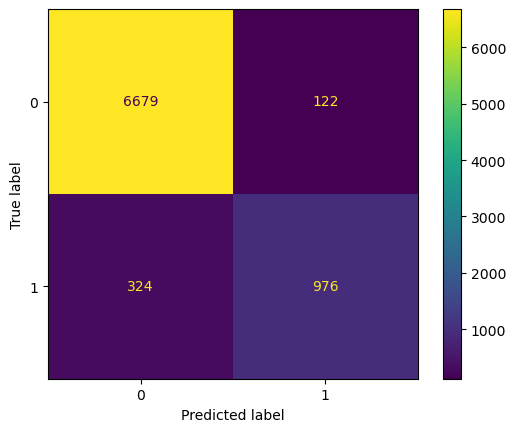

Train Precision Score for Soft Voting(Multiple):  0.8888888888888888
Train Recall Score for Soft Voting(Multiple)  0.7507692307692307
Train F1 Score for Soft Voting(Multiple)  0.8140116763969973
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      6801
           1       0.89      0.75      0.81      1300

    accuracy                           0.94      8101
   macro avg       0.92      0.87      0.89      8101
weighted avg       0.94      0.94      0.94      8101



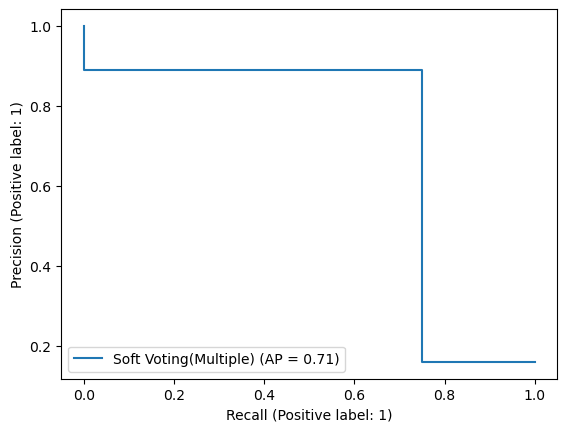

Metrics Regarding Test Data:


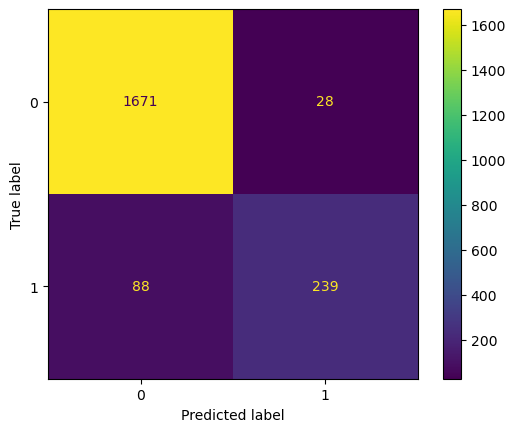

Test Precision Score for Soft Voting(Multiple):  0.8951310861423221
Test Recall Score for Soft Voting(Multiple):  0.7308868501529052
Test F1 Score for Soft Voting(Multiple):  0.8047138047138048
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1699
           1       0.90      0.73      0.80       327

    accuracy                           0.94      2026
   macro avg       0.92      0.86      0.89      2026
weighted avg       0.94      0.94      0.94      2026



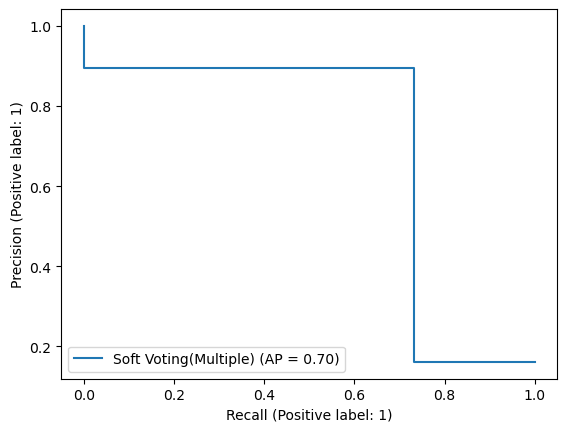

In [116]:


voting_clf_best_of_all = VotingClassifier(
    estimators=[('SVM over sampled', svm_clf_over_fit), ('SVM under sampled', svm_clf_over_fit), ('Random forest under sampled', rnd_clf_under_fit)],
    voting='soft') # Soft voting
algorithm = voting_clf_best_of_all.fit(pred_std_train, tar_std_train)
metricDisplay(models[5], sampling[4], algorithm, pred_std_test, tar_std_test, pred_std_train, tar_std_train, True)

### Soft Voting Ensemble: Best Overall stats of all samplers

Metrics Regarding Training Data:


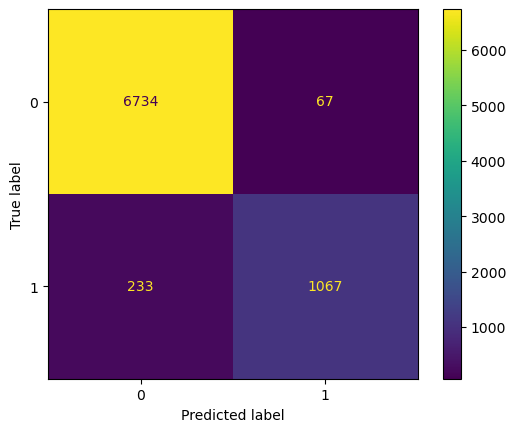

Train Precision Score for Soft Voting(Multiple):  0.9409171075837742
Train Recall Score for Soft Voting(Multiple)  0.8207692307692308
Train F1 Score for Soft Voting(Multiple)  0.876746096959737
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      6801
           1       0.94      0.82      0.88      1300

    accuracy                           0.96      8101
   macro avg       0.95      0.91      0.93      8101
weighted avg       0.96      0.96      0.96      8101



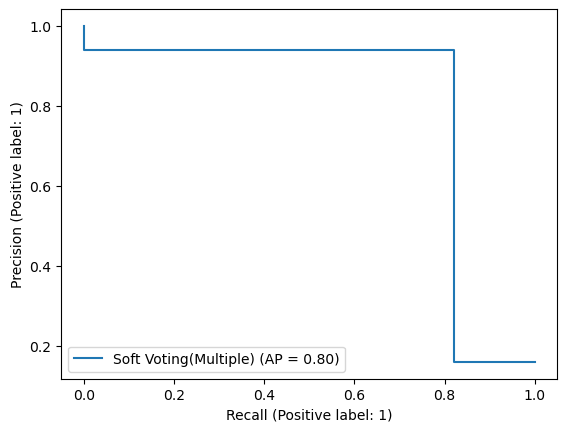

Metrics Regarding Test Data:


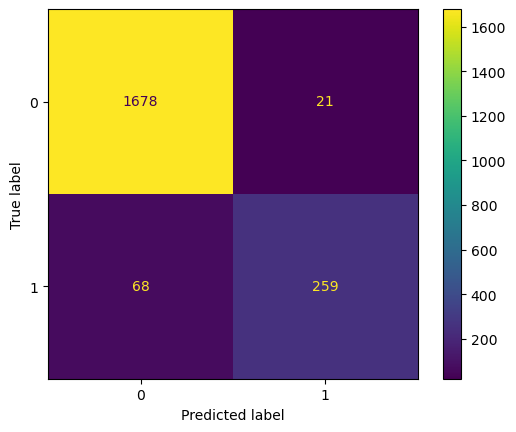

Test Precision Score for Soft Voting(Multiple):  0.925
Test Recall Score for Soft Voting(Multiple):  0.7920489296636085
Test F1 Score for Soft Voting(Multiple):  0.8533772652388798
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1699
           1       0.93      0.79      0.85       327

    accuracy                           0.96      2026
   macro avg       0.94      0.89      0.91      2026
weighted avg       0.96      0.96      0.95      2026



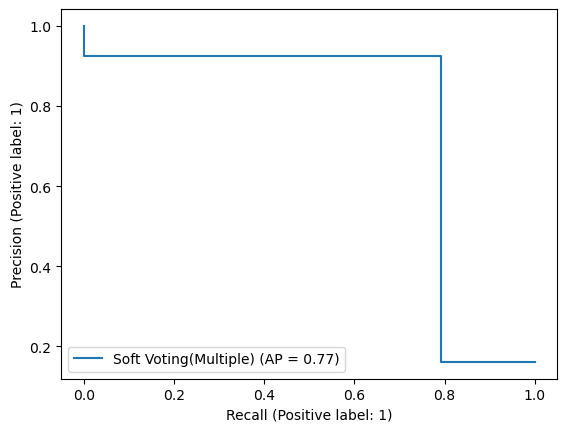

In [117]:
voting_clf_best_of_all = VotingClassifier(
    estimators=[('Random Forest Oversampled', rnd_clf_over_fit), ('Random Forest SMOTE', rnd_clf_smote_fit), ('Random forest under sampled', rnd_clf_under_fit)],
    voting='soft') # Soft voting
algorithm = voting_clf_best_of_all.fit(pred_std_train, tar_std_train)
metricDisplay(models[5], sampling[4], algorithm, pred_std_test, tar_std_test, pred_std_train, tar_std_train, True)

## Feature Importance

### Now that we have successfully been able to predict customer churn with a high recall, can we tell what features are important?

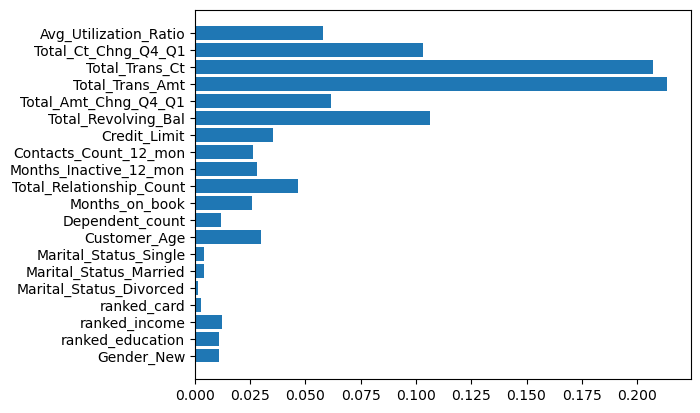

In [118]:
plt.barh(pred_std_train.columns, rnd_clf_under.feature_importances_)
plt.show()

As we can see, in our best model, undersampled Random Forest, there are variables that matter much more. In particular, we'll cut off variables at roughly the value of 0.050. This will give us the columns we'll see below.

In [119]:
predictors_reduced = predictors_std[['Credit_Limit', 'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 'Contacts_Count_12_mon', 'Total_Relationship_Count', 'Avg_Utilization_Ratio']].copy()
reduced_predictors_train, reduced_predictors_test, reduced_target_train, reduced_target_test = train_test_split(predictors_reduced, target_std, test_size = 0.2,  random_state = 42)
reduced_predictors_undersampled, reduced_target_undersampled = rus.fit_resample(reduced_predictors_train, reduced_target_train)


Now let's see how the models stack up against each other. 

Metrics Regarding Training Data:


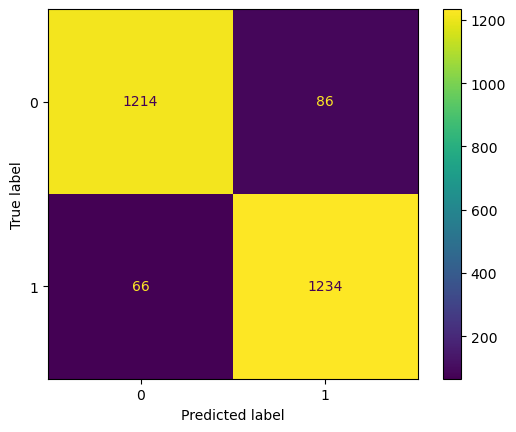

Train Precision Score for Random Forests(Undersampling):  0.9348484848484848
Train Recall Score for Random Forests(Undersampling)  0.9492307692307692
Train F1 Score for Random Forests(Undersampling)  0.9419847328244275
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1300
           1       0.93      0.95      0.94      1300

    accuracy                           0.94      2600
   macro avg       0.94      0.94      0.94      2600
weighted avg       0.94      0.94      0.94      2600



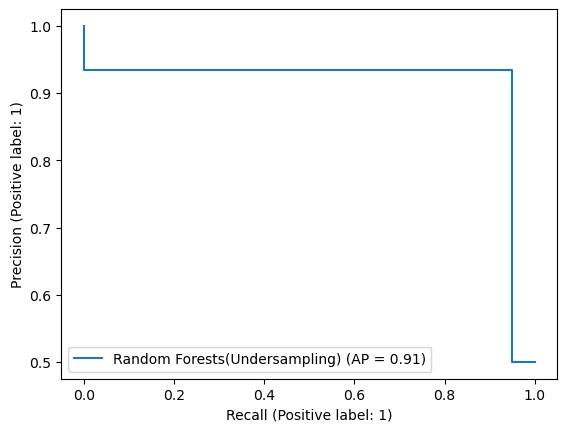

Metrics Regarding Test Data:


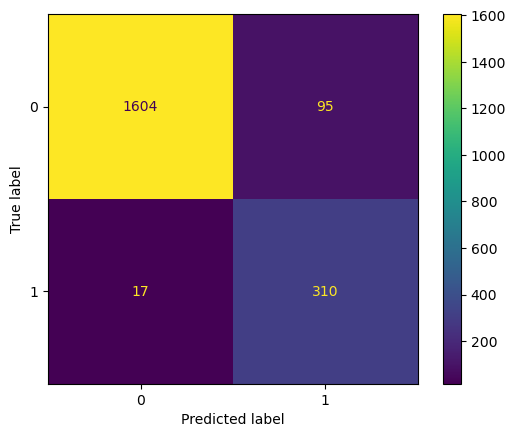

Test Precision Score for Random Forests(Undersampling):  0.7654320987654321
Test Recall Score for Random Forests(Undersampling):  0.9480122324159022
Test F1 Score for Random Forests(Undersampling):  0.8469945355191256
              precision    recall  f1-score   support

           0       0.99      0.94      0.97      1699
           1       0.77      0.95      0.85       327

    accuracy                           0.94      2026
   macro avg       0.88      0.95      0.91      2026
weighted avg       0.95      0.94      0.95      2026



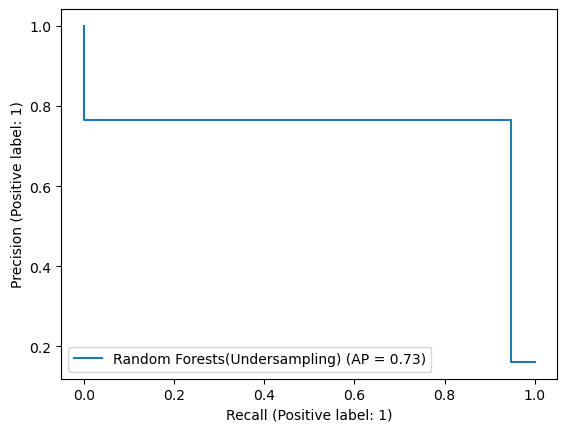

Metrics Regarding Training Data:


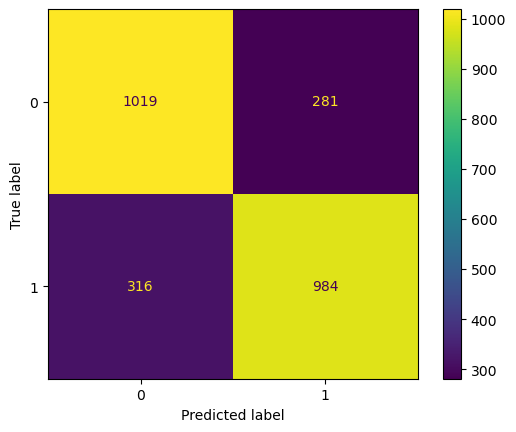

Train Precision Score for Random Forests(Undersampling):  0.7778656126482213
Train Recall Score for Random Forests(Undersampling)  0.7569230769230769
Train F1 Score for Random Forests(Undersampling)  0.7672514619883041
              precision    recall  f1-score   support

           0       0.76      0.78      0.77      1300
           1       0.78      0.76      0.77      1300

    accuracy                           0.77      2600
   macro avg       0.77      0.77      0.77      2600
weighted avg       0.77      0.77      0.77      2600



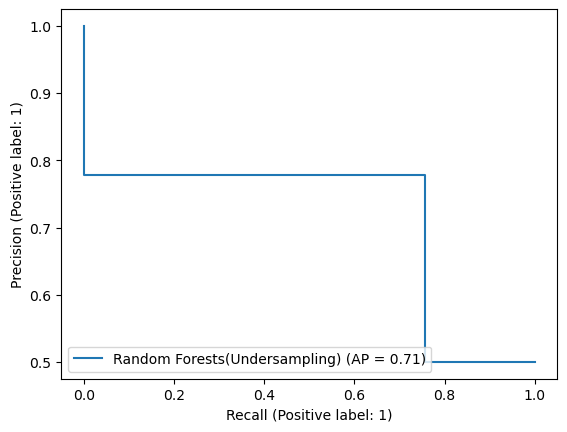

Metrics Regarding Test Data:


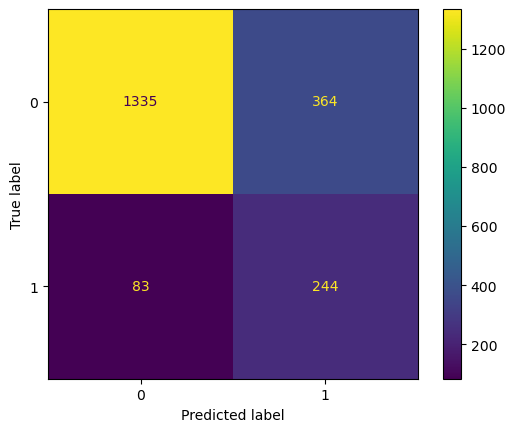

Test Precision Score for Random Forests(Undersampling):  0.40131578947368424
Test Recall Score for Random Forests(Undersampling):  0.746177370030581
Test F1 Score for Random Forests(Undersampling):  0.5219251336898396
              precision    recall  f1-score   support

           0       0.94      0.79      0.86      1699
           1       0.40      0.75      0.52       327

    accuracy                           0.78      2026
   macro avg       0.67      0.77      0.69      2026
weighted avg       0.85      0.78      0.80      2026



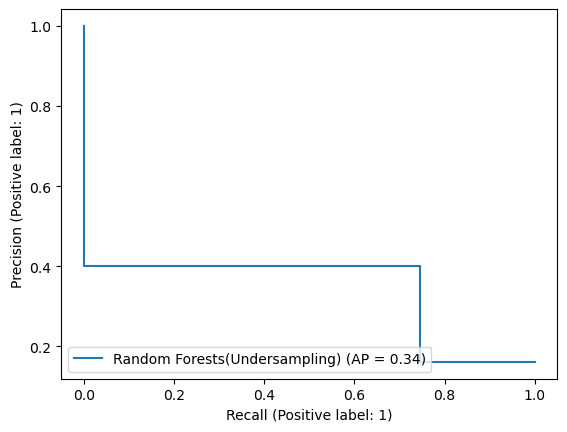

In [120]:
best_algorithm = rnd_clf_under_fit
#don't add to metrices since it's a duplicate.
metricDisplay(models[3], sampling[2], best_algorithm, pred_std_test, tar_std_test, X_rus_std, y_rus_std, True, True)
reduced_algorithm = rnd_clf_under.fit(reduced_predictors_undersampled, reduced_target_undersampled)
metricDisplay(models[3], sampling[2], reduced_algorithm, reduced_predictors_test, reduced_target_test, 
              reduced_predictors_undersampled, reduced_target_undersampled, True)




As seen as above, while our results weren't great, frankly, a lot of them were terrible, we still kept an accuracy of 78% and a recall of 75%, which is nearly 80% of our best metrics. Granted, our precision fell to insanely low levels, and our PR curve fell beyond 50% of it's original value. 

# Evaluation of Overall Metrics 

In [121]:
metrics_df_train

,Model,Sampler,label_0_precision,label_0_recall,label_0_f1_score,label_1_precision,label_1_recall,label_1_f1_score,accuracy
0,KNN,None,0.892536,0.991619,0.939472,0.895413,0.375385,0.528997,0.892729
1,KNN,Oversampling,0.869359,0.863991,0.866667,0.864825,0.870166,0.867488,0.867078
2,KNN,SMOTE,0.919634,0.827819,0.871315,0.843449,0.927658,0.883552,0.877739
3,KNN,Undersampling,0.835991,0.846923,0.841421,0.844895,0.833846,0.839334,0.840385
4,SGD,None,0.899318,0.988972,0.942017,0.879421,0.420769,0.569199,0.897790
5,SGD,Oversampling,0.836237,0.846934,0.841552,0.844951,0.834142,0.839512,0.840538
6,SGD,SMOTE,0.883115,0.872078,0.877562,0.873657,0.884576,0.879082,0.878327
7,SGD,Undersampling,0.802247,0.823846,0.812903,0.818972,0.796923,0.807797,0.810385
8,Decision Tree,None,0.964033,0.961623,0.962827,0.801822,0.812308,0.807031,0.937662
9,Decision Tree,None,0.961267,0.959712,0.960489,0.790999,0.797692,0.794332,0.933712


Please note that the Undersampled Random Forest at the end isn't the original, but the Random Forest with reduced predictors being trained using undersampling. Additionally, the first Soft Voting model is an ensemble between the models with the best recall, and the second is an ensemble with the models that had the overall highest metrics(precision, recall, f1-score, etc..). 
Additionally, there is one Decision Tree which is non-standardized, hence there are two Decision Trees with the Sampler "None". Almost all the classifiers mentioned in this paragraph weren't considered in calculating the averages, as they are relatively isolated in comparison to the scope of the project.

In [122]:
metrics_df_test

,Model,Sampler,label_0_precision,label_0_recall,label_0_f1_score,label_1_precision,label_1_recall,label_1_f1_score,accuracy
0,KNN,None,0.887368,0.992348,0.936927,0.896825,0.345566,0.498896,0.887957
1,KNN,Oversampling,0.964947,0.858740,0.908751,0.533074,0.837920,0.651605,0.855380
2,KNN,SMOTE,0.973333,0.816363,0.887964,0.480865,0.883792,0.622845,0.827246
3,KNN,Undersampling,0.958995,0.853443,0.903145,0.515564,0.810398,0.630202,0.846496
4,SGD,None,0.958995,0.853443,0.903145,0.515564,0.810398,0.630202,0.846496
5,SGD,Oversampling,0.956384,0.890524,0.922280,0.581081,0.788991,0.669261,0.874136
6,SGD,SMOTE,0.962025,0.849912,0.902500,0.514286,0.825688,0.633803,0.846002
7,SGD,Undersampling,0.957390,0.846380,0.898469,0.501908,0.804281,0.618096,0.839585
8,Decision Tree,None,0.958944,0.962331,0.960635,0.800623,0.785933,0.793210,0.933860
9,Decision Tree,None,0.961697,0.960565,0.961131,0.796353,0.801223,0.798780,0.934847


In [123]:
Get_Avg_of_Classifiers_Print_Train()

,Classifier,label_0_precision,label_0_recall,label_0_f1_score,label_1_precision,label_1_recall,label_1_f1_score,accuracy
0,KNN,0.879380,0.882588,0.879719,0.862146,0.751764,0.779843,0.869483
1,SGD,0.855229,0.882958,0.868508,0.854250,0.734103,0.773898,0.856760
2,Decision Tree,0.949784,0.939801,0.944699,0.897828,0.908743,0.903194,0.938025
3,Random Forests,0.975627,0.970633,0.973052,0.958720,0.939412,0.948001,0.969400
4,SVM,0.935608,0.928652,0.931914,0.902686,0.872780,0.884914,0.925578


In [124]:
Get_Avg_of_Classifiers_Print_Test()

,Classifier,label_0_precision,label_0_recall,label_0_f1_score,label_1_precision,label_1_recall,label_1_f1_score,accuracy
0,KNN,0.946161,0.880224,0.909197,0.606582,0.719419,0.600887,0.854269
1,SGD,0.958699,0.860065,0.906599,0.528210,0.807339,0.637841,0.851555
2,Decision Tree,0.965086,0.940995,0.952630,0.737783,0.821865,0.773798,0.921767
3,Random Forests,0.973631,0.972484,0.972866,0.866491,0.861621,0.859994,0.954590
4,SVM,0.965998,0.931430,0.947698,0.722145,0.824924,0.757214,0.914240


In [125]:
Get_Avg_of_Samplers_Print_Train()

,Sampler,label_0_precision,label_0_recall,label_0_f1_score,label_1_precision,label_1_recall,label_1_f1_score,accuracy
0,Oversampling,0.930948,0.914836,0.922747,0.915463,0.931040,0.923115,0.922938
1,SMOTE,0.941217,0.910660,0.925397,0.914660,0.943479,0.928613,0.927070
2,Undersampling,0.871879,0.876000,0.873886,0.874761,0.870462,0.872556,0.873231
3,None,0.932458,0.982208,0.956283,0.875619,0.620462,0.707595,0.924158


In [127]:
Get_Avg_of_Samplers_Print_Test()

,sampler,label_0_precision,label_0_recall,label_0_f1_score,label_1_precision,label_1_recall,label_1_f1_score,accuracy
0,Oversampling,0.965420,0.922425,0.942857,0.698984,0.828135,0.750210,0.907206
1,SMOTE,0.968555,0.903590,0.933920,0.661616,0.847706,0.734012,0.894571
2,Undersampling,0.972432,0.886757,0.927442,0.605390,0.870948,0.712700,0.884205
3,None,0.941253,0.955386,0.946973,0.802978,0.681346,0.706864,0.911155
